# Welcome to a Ribolog Tutorial

## Part 1: Loading Data and QC

In [1]:
suppressWarnings(library('Ribolog'))

Registered S3 method overwritten by 'gdata':
  method         from     
  reorder.factor DescTools



### Load pre-provided annotations

Ribolog can automatically load the annotations and fasta files of the following organisms:
- Arabidopsis
- Fly
- Human
- Maize
- Mouse
- Rat
- Worm (C Elegans)
- Yeast
- Zebrafish

If you are working with an organism that is not in this list, please see the 'Load your own annotation' section.

In [2]:
# outputs <- Ribolog::load_annotation_and_cdna('human')

In [3]:
# annotation <- outputs[['annotation']]
# cdna_fasta <- outputs[['cdna_fasta']]

### Load your own annotation (Optional)

<b> Run the python script on your downloaded fasta file from Ensembl Biomart </b>

- To download a formatted fasta reference file for Humans, click [here.](https://drive.google.com/file/d/1r9W2Ll3qMPIHMr0vy_Ixr641_7OJTBL3/view?usp=sharing)
- To download a formatted fasta reference file for Mouse, click [here.](https://drive.google.com/file/d/1Kk5dhdIXWK-GO2pdAPJvX9PeXQGSA4gr/view?usp=sharing)
- The command below will run on the mart_export.txt file and create 3 more txt files (cDNA_longest_CDS.txt, annotation.txt and mapper.txt) within the same directory.

In [4]:
# system('python3 Biomart_cDNA_fasta_to_rW_annotation_and_reheadered_longest_CDS_cDNA_fasta_v2.py ~/Downloads/mart_export_human.txt cDNA_longest_CDS.txt annotation.txt mapper.txt', intern=TRUE)

In [5]:
# system('ls -v *.txt', intern=TRUE) # All text files available to us in this directory now

In [6]:
annotation <- Ribolog::read_annotation('annotation.txt')

### Check the imported annotation table

In [7]:
head(annotation)

transcript      l_tr l_utr5 l_cds l_utr3
1 ENST00000003302 4669  69    3234  1366  
2 ENST00000001008 3715 170    1380  2165  
3 ENST00000004531 7560  48    2097  5415  
4 ENST00000002829 3607 289    2358   960  
5 ENST00000004103 1033  75     708   250  
6 ENST00000004982 1460  21     483   956

# Convert the bam files to a reads_list object

In [8]:
list.files('~/Downloads/bam_files/rpf') # All bam files

[1] "CN34_r1_rpf.bam" "CN34_r2_rpf.bam" "LM1a_r1_rpf.bam" "LM1a_r2_rpf.bam"
[5] "LM2_r1_rpf.bam"  "LM2_r2_rpf.bam"  "MDA_r1_rpf.bam"  "MDA_r2_rpf.bam"

Run riboWlatz to estimate the most likely ribosomal p-site offsets for each read length group. Combine this information with the reads_list object produced by bamtolist_rW to create a reads_psite_list object. Each data frame in this list corresponds to one sample and contains the distance of the reads p-sites from the start and stop codons. It also shows whether each p-site falls in the 5’ UTR, CDs or 3’ UTR region.

### Notes:
- Here, we suppress package overlap warnings since they are not relevant.
- Read through the output and make sure that Ribolog approves the result of each output
- The average expected time taken for the bam to list converstion is <b> 25 seconds per bam file </b> although it make vary based on the number of reads.

In [9]:
reads_list <- Ribolog::bamtolist_rW(bamfolder='~/Downloads/bam_files/rpf', annotation=annotation)

reading CN34_r1_rpf.bam
Good! Number of indel below indel_threshold for all reads. No reads removed.
reads: 4.82 M
0.31 M  (6.52 %) reads removed: reference transcript IDs not found in annotation table.
Cool! All reads mapping on positive strand. No reads removed.
reading CN34_r2_rpf.bam
Good! Number of indel below indel_threshold for all reads. No reads removed.
reads: 4.28 M
0.28 M  (6.49 %) reads removed: reference transcript IDs not found in annotation table.
Cool! All reads mapping on positive strand. No reads removed.
reading LM1a_r1_rpf.bam
Good! Number of indel below indel_threshold for all reads. No reads removed.
reads: 2.04 M
0.14 M  (7.09 %) reads removed: reference transcript IDs not found in annotation table.
Cool! All reads mapping on positive strand. No reads removed.
reading LM1a_r2_rpf.bam
Good! Number of indel below indel_threshold for all reads. No reads removed.
reads: 1.85 M
0.13 M  (7.05 %) reads removed: reference transcript IDs not found in annotation table.
Co

### Notes:
- Read through the contents of reads list and make sure to match all the input bam files

In [10]:
names(reads_list)

[1] "CN34_r1_rpf" "CN34_r2_rpf" "LM1a_r1_rpf" "LM1a_r2_rpf" "LM2_r1_rpf" 
[6] "LM2_r2_rpf"  "MDA_r1_rpf"  "MDA_r2_rpf"

In [11]:
head(reads_list$CN34_r1_rpf)

transcript      end5 end3 length cds_start cds_stop
1 ENST00000001146 150  169  20     205       1743    
2 ENST00000001146 423  450  28     205       1743    
3 ENST00000001146 457  478  22     205       1743    
4 ENST00000001146 484  511  28     205       1743    
5 ENST00000001146 493  513  21     205       1743    
6 ENST00000001146 499  527  29     205       1743

# Create p-site offset and a reads_psite_list object

### Notes:
1. The function below will process each bam file and create the p-site offsets
2. The average time taken for p-site offset creation is 6-7 seconds per bam file.

In [12]:
psite_offset <- Ribolog::psite_rW(reads_list)

processing CN34_r1_rpf
best offset: 15 nts from the 3' end
processing CN34_r2_rpf
best offset: 16 nts from the 3' end
processing LM1a_r1_rpf
best offset: 15 nts from the 3' end
processing LM1a_r2_rpf
best offset: 15 nts from the 3' end
processing LM2_r1_rpf
best offset: 15 nts from the 3' end
processing LM2_r2_rpf
best offset: 15 nts from the 3' end
processing MDA_r1_rpf
best offset: 15 nts from the 3' end
processing MDA_r2_rpf
best offset: 15 nts from the 3' end


### Notes:
1. The function below will process each p-site offset and create the reads_psite_list.
2. The average time taken for p-site offset creation is 5-6 seconds per bam file.

In [13]:
reads_psite_list <- Ribolog::psite_info_rW(reads_list, psite_offset) # Will process all bam files

processing CN34_r1_rpf
1. adding p-site position
2. adding transcript region
processing CN34_r2_rpf
1. adding p-site position
2. adding transcript region
processing LM1a_r1_rpf
1. adding p-site position
2. adding transcript region
processing LM1a_r2_rpf
1. adding p-site position
2. adding transcript region
processing LM2_r1_rpf
1. adding p-site position
2. adding transcript region
processing LM2_r2_rpf
1. adding p-site position
2. adding transcript region
processing MDA_r1_rpf
1. adding p-site position
2. adding transcript region
processing MDA_r2_rpf
1. adding p-site position
2. adding transcript region


In [14]:
head(reads_psite_list$CN34_r1_rpf) # Looking at the first bam file's processed data

transcript      end5 psite end3 length cds_start cds_stop psite_from_start
1 ENST00000001146 150  160   169  20     205       1743     -45             
2 ENST00000001146 423  435   450  28     205       1743     230             
3 ENST00000001146 457  466   478  22     205       1743     261             
4 ENST00000001146 484  496   511  28     205       1743     291             
5 ENST00000001146 493  502   513  21     205       1743     297             
6 ENST00000001146 499  513   527  29     205       1743     308             
  psite_from_stop psite_region
1 -1583           5utr        
2 -1308           cds         
3 -1277           cds         
4 -1247           cds         
5 -1241           cds         
6 -1230           cds

# QC.1: Plot read length distribution

The reads_psite_list object produced by psite_info_rW is the key input used by the CELP method. Before proceeding to CELP correction, it is recommended to print out some QC plots, browse patterns and decide what read lengths will be included for further analysis. Chosen read lengths must be relatively abundant across samples and show proper periodicity in the CDS region. The code for several useful plot types and two example plots are included here.

### By default, the functions prints the visualisations inline for each bam file

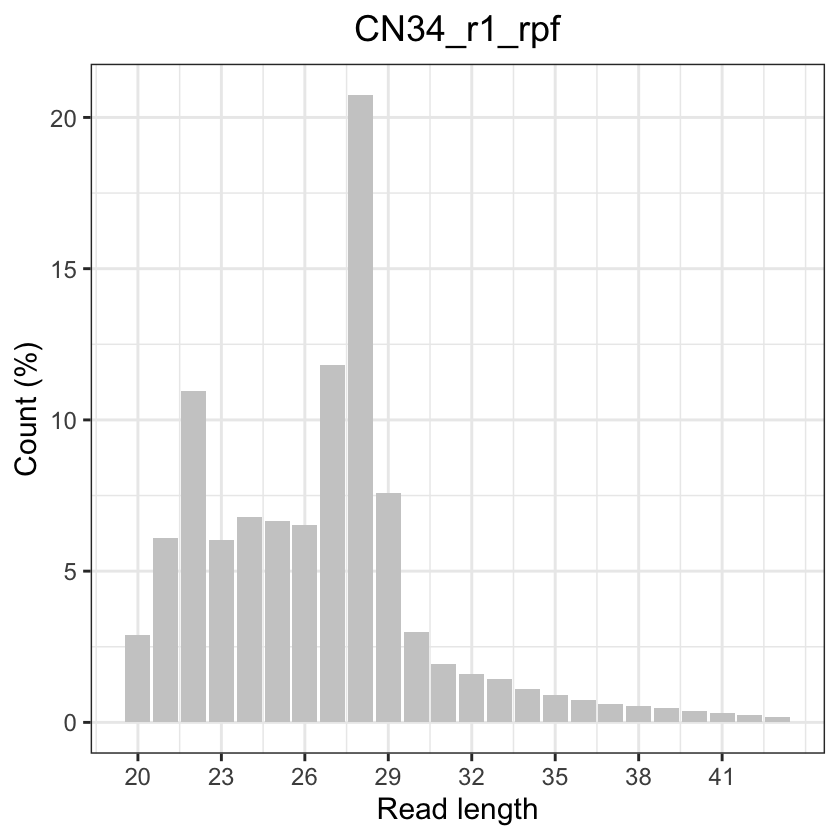

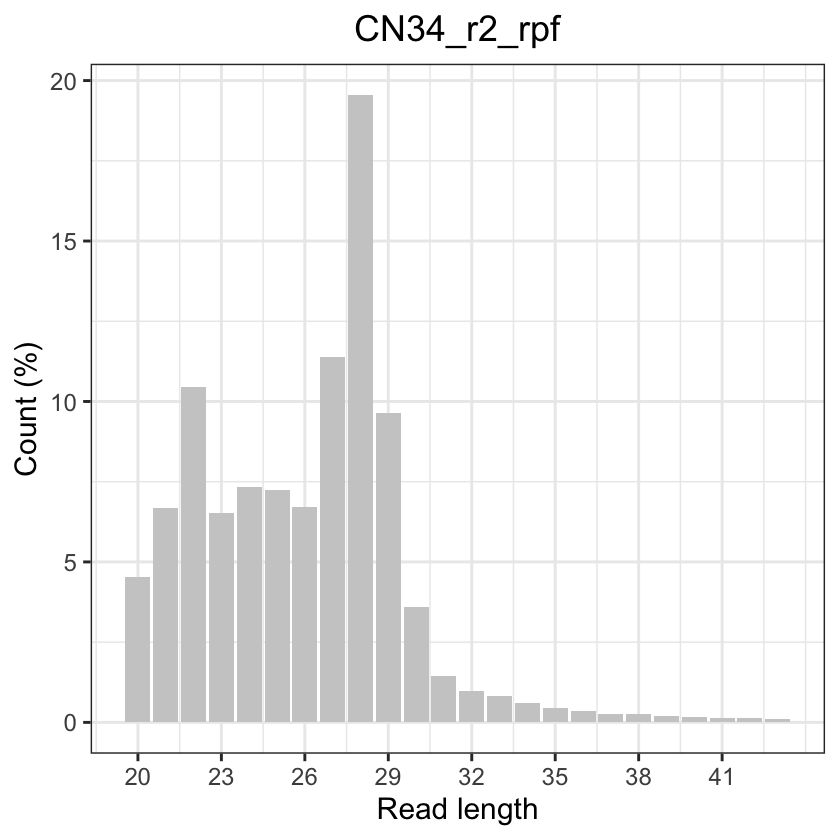

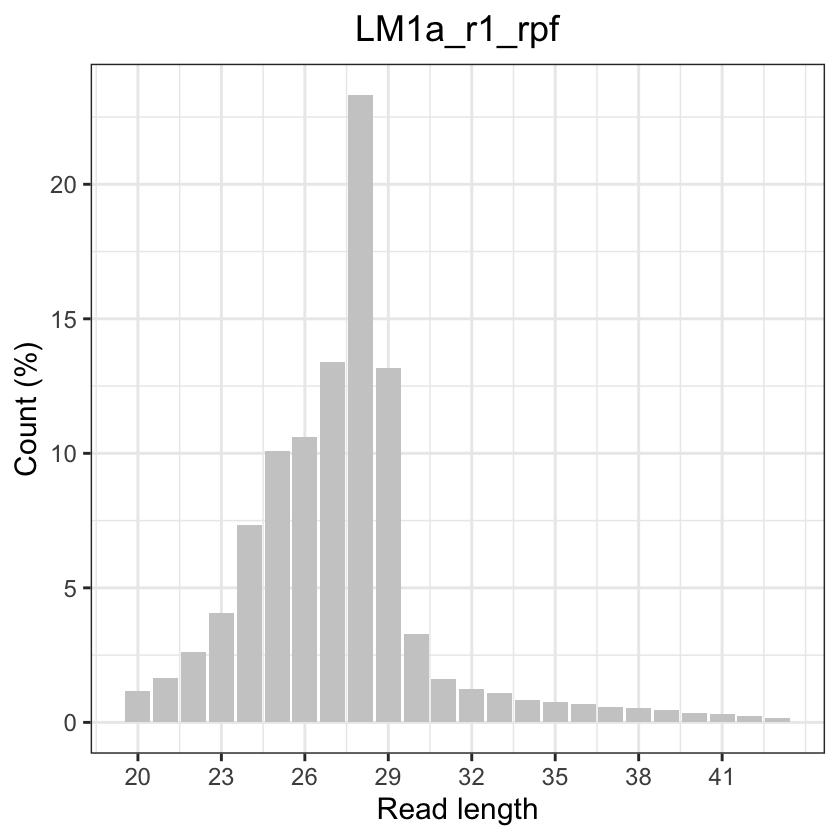

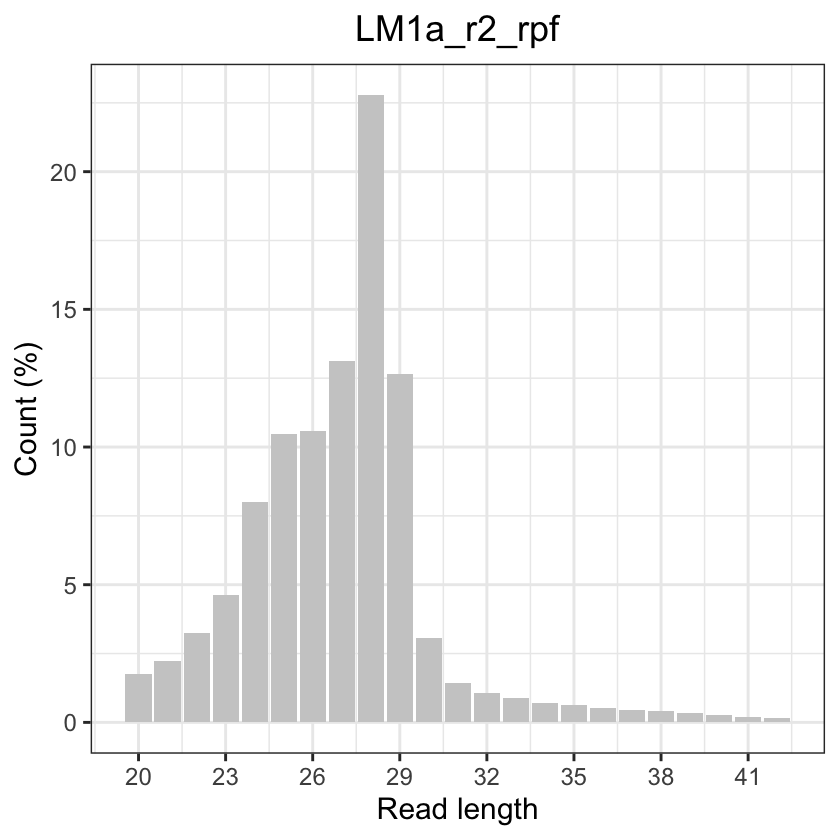

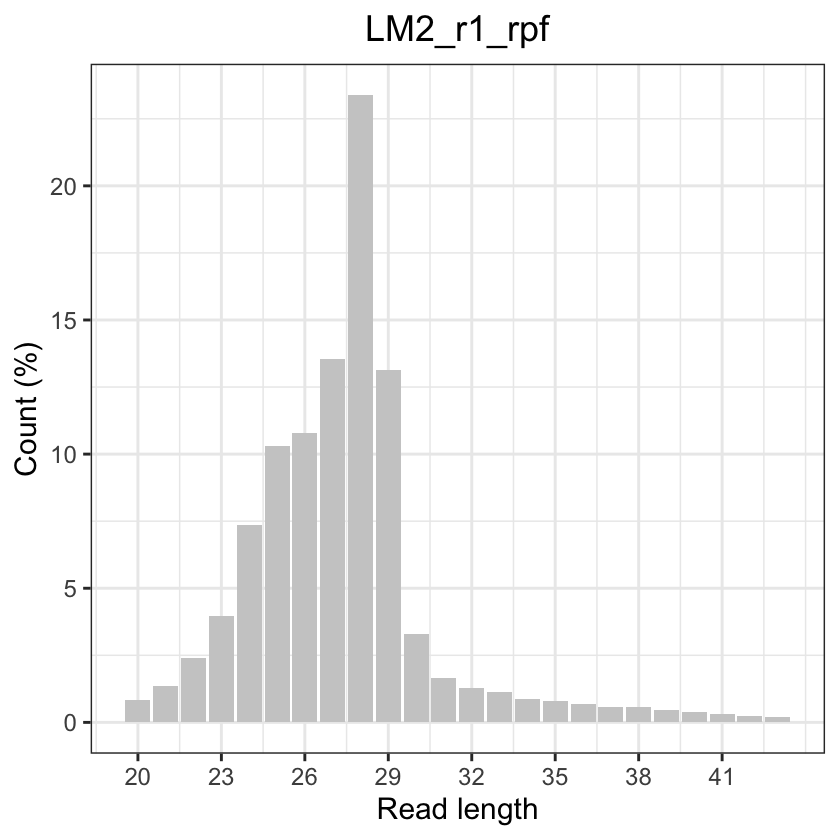

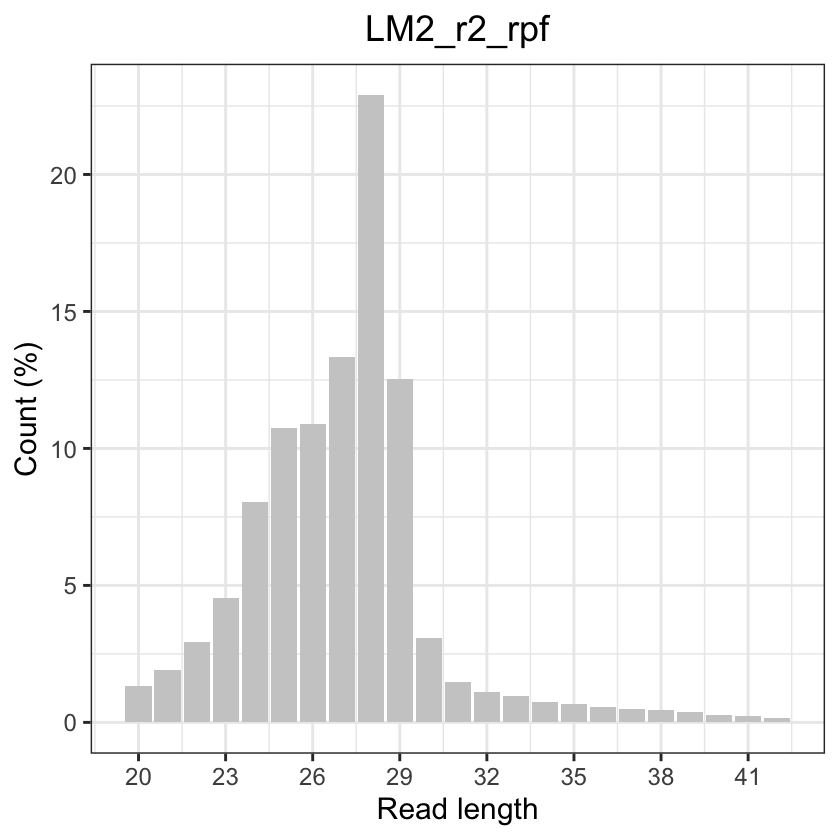

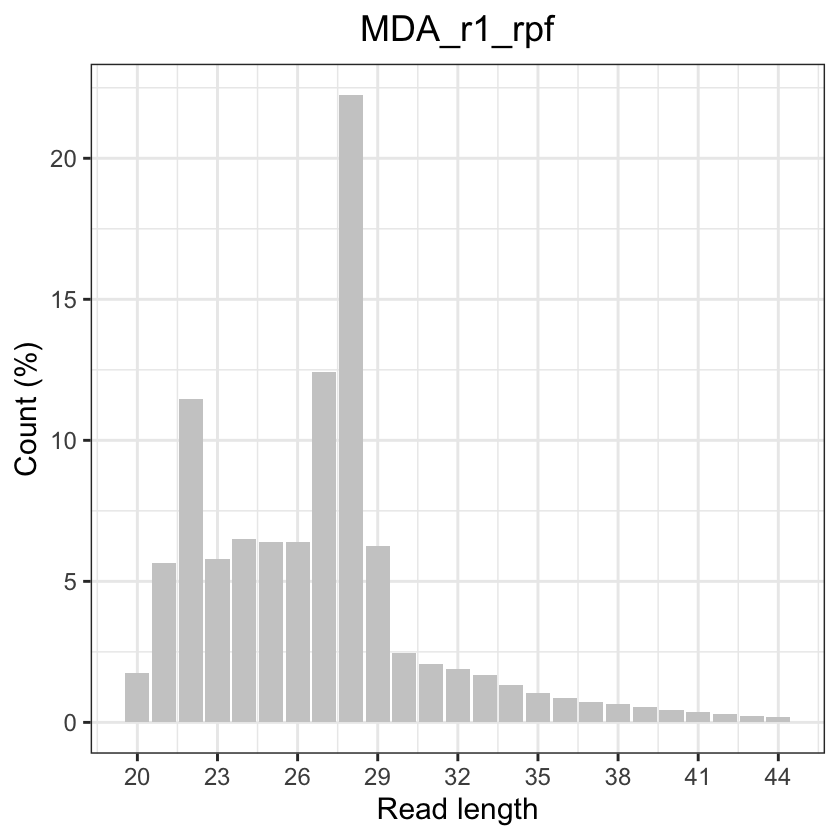

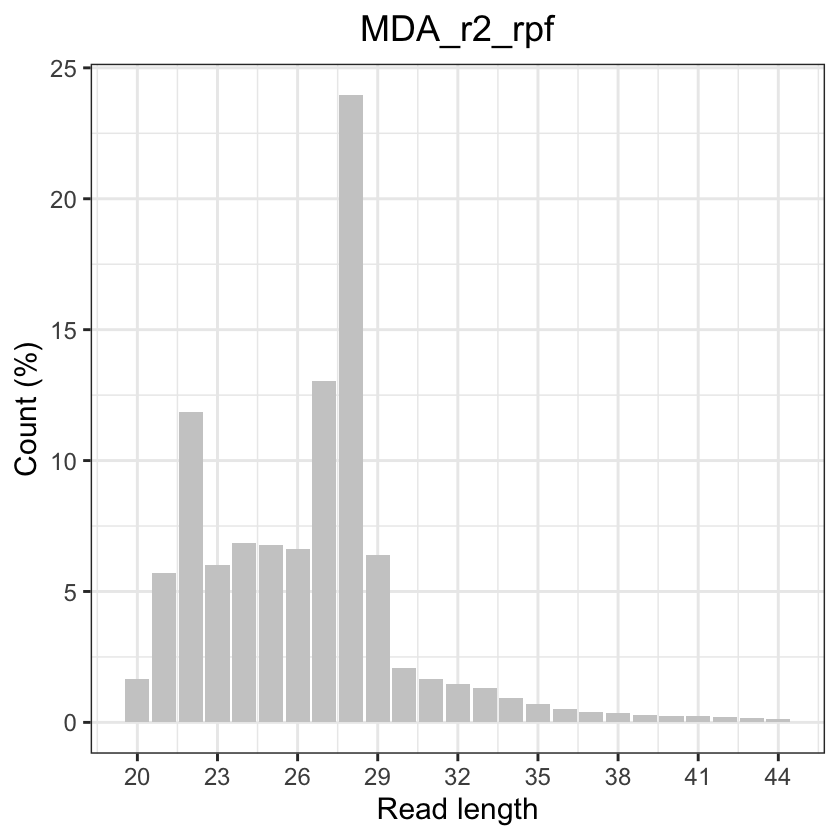

In [15]:
suppressWarnings(Ribolog::print_read_ldist(reads_list))

### You can also export the visualisations to a PDF by specifying a output PDF name.

In [16]:
suppressWarnings(Ribolog::print_read_ldist(reads_list, outfile='reads_length_distribution.pdf'))

[1] "PDF (reads_length_distribution.pdf) created and saved"

# QC.2: Heatmap of reads end

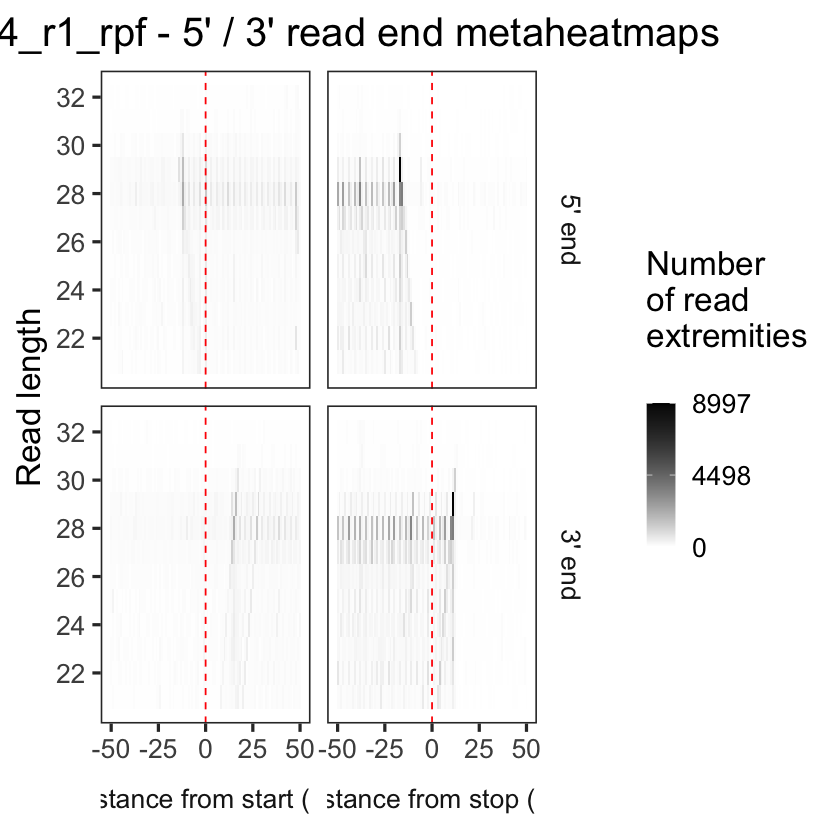

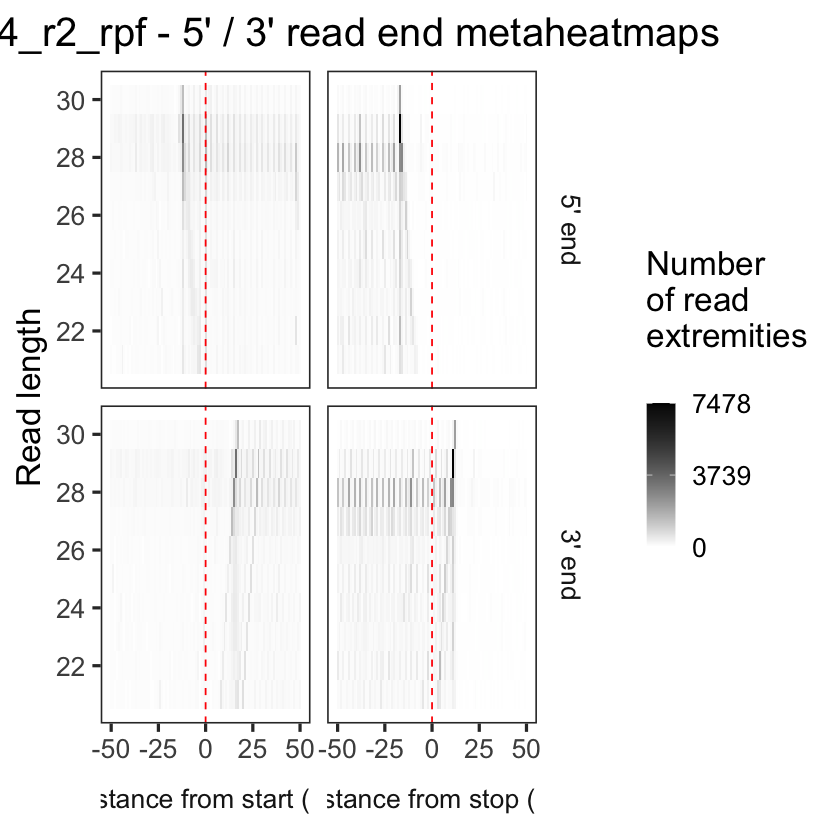

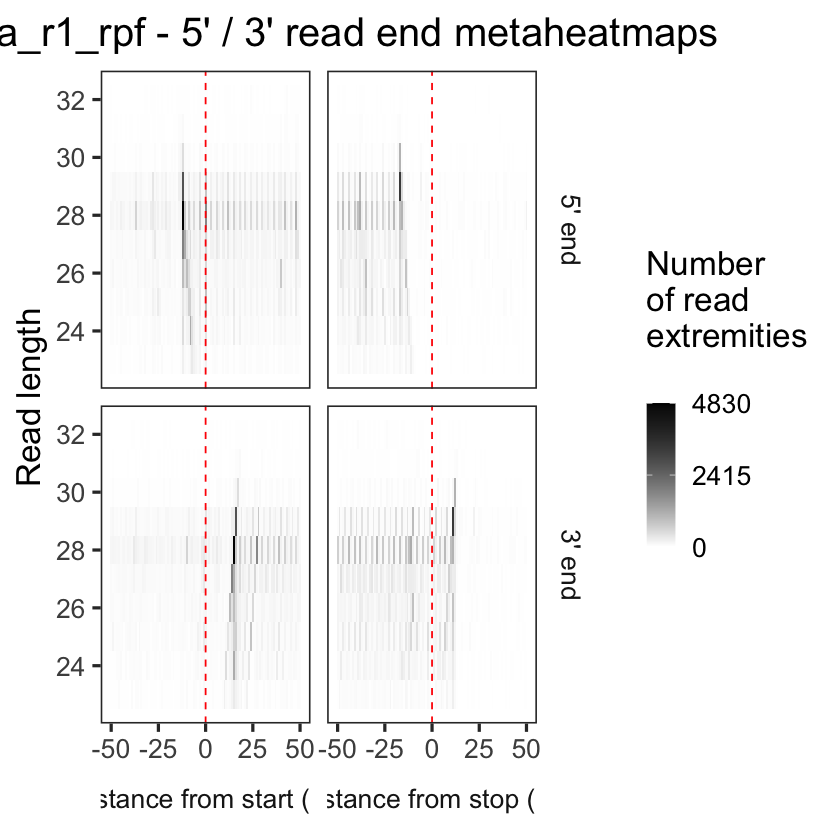

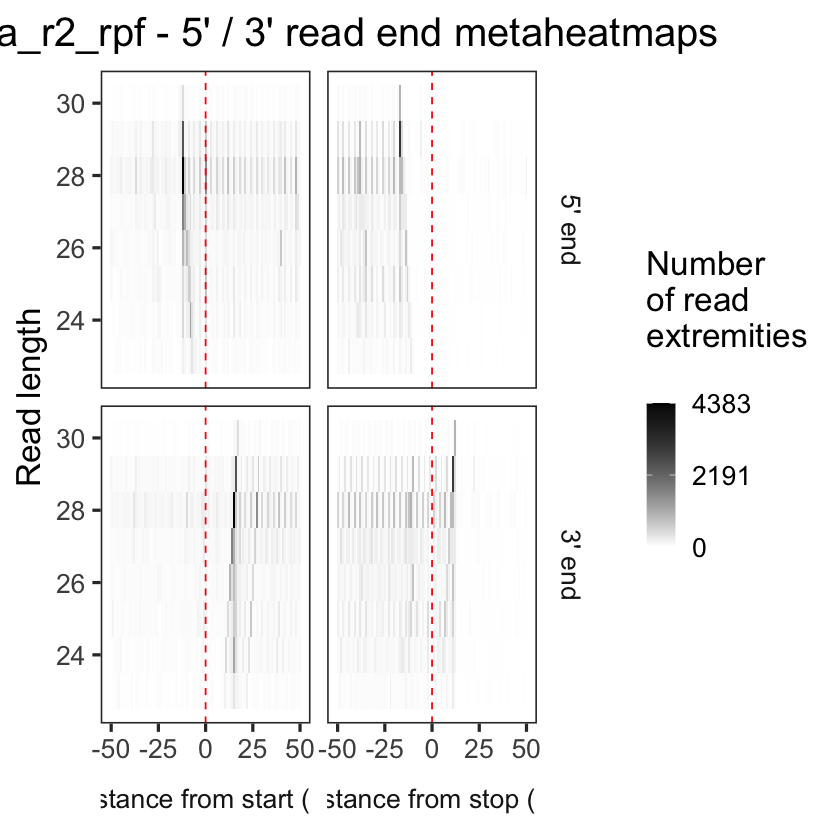

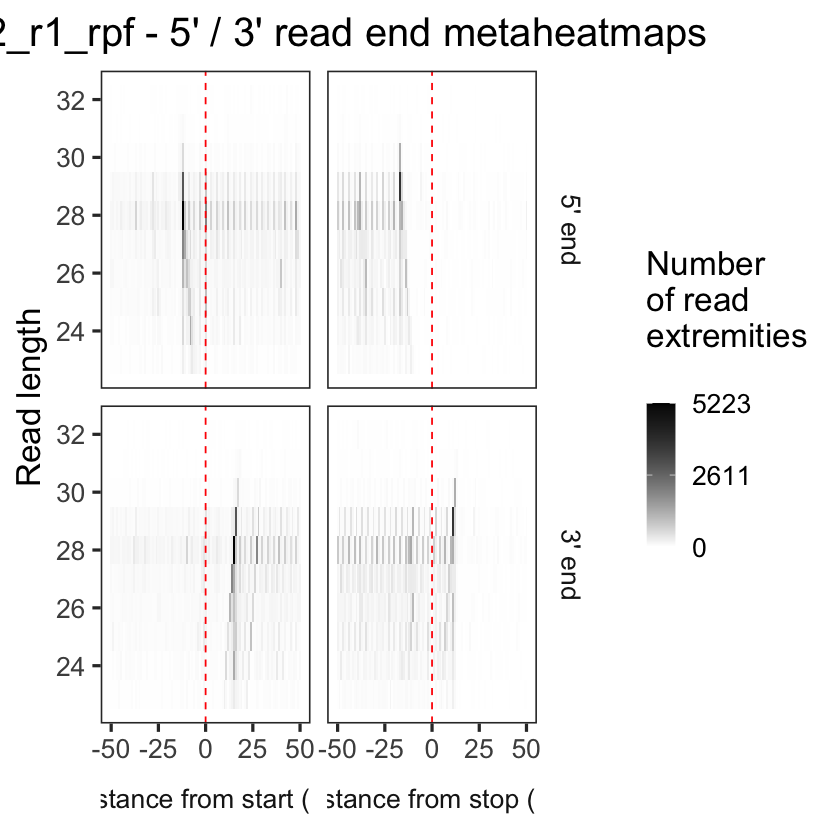

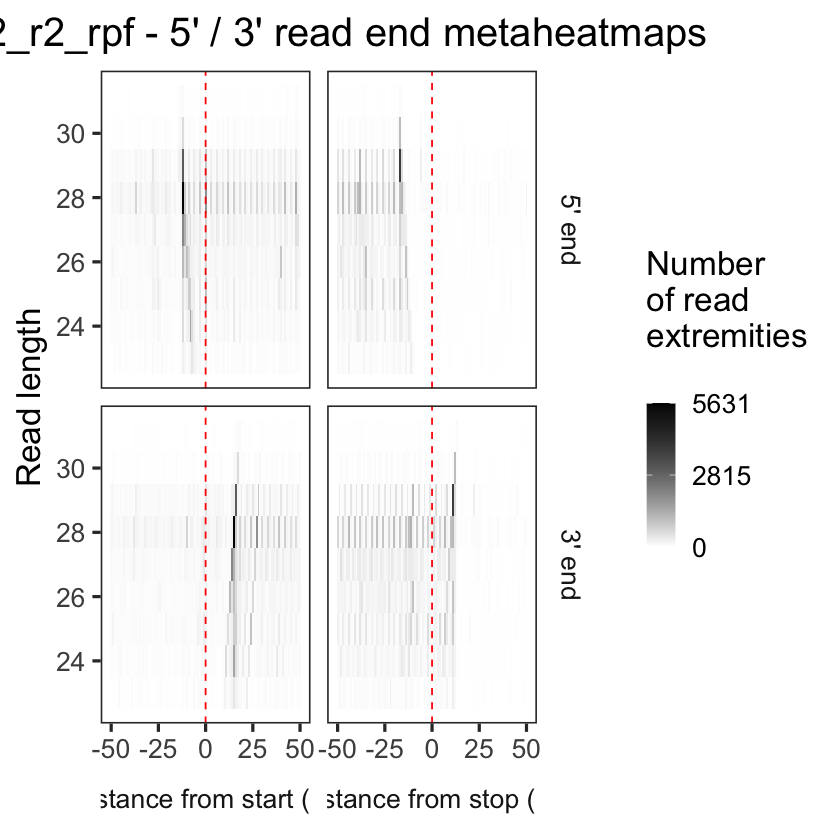

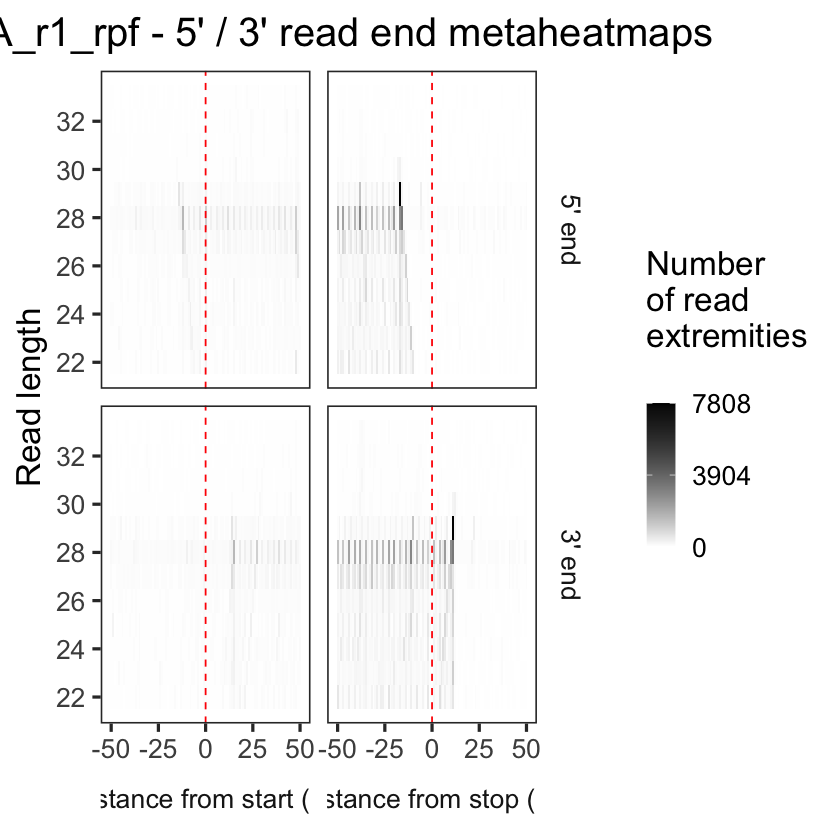

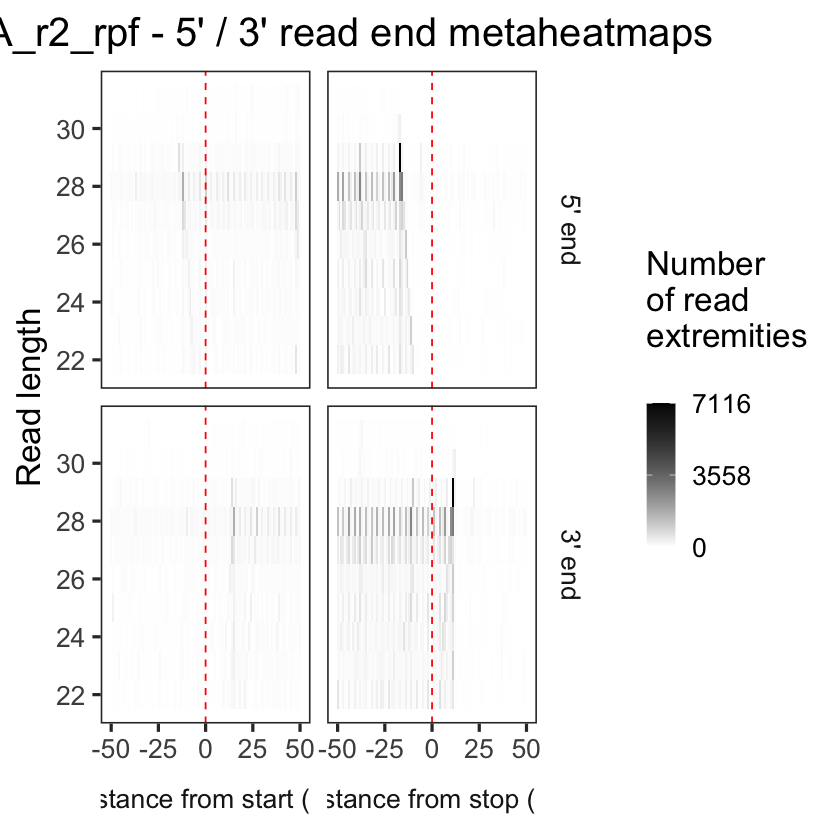

In [17]:
suppressWarnings(Ribolog::print_read_end_heatmap(reads_list, annotation))

 - Save the output in a PDF instead

In [18]:
suppressWarnings(Ribolog::print_read_end_heatmap(reads_list, annotation, outfile='read_end_heatmaps.pdf'))

[1] "PDF (read_end_heatmaps.pdf) created and saved"

# QC.3: Visualising Ribosome Occupancy Profile

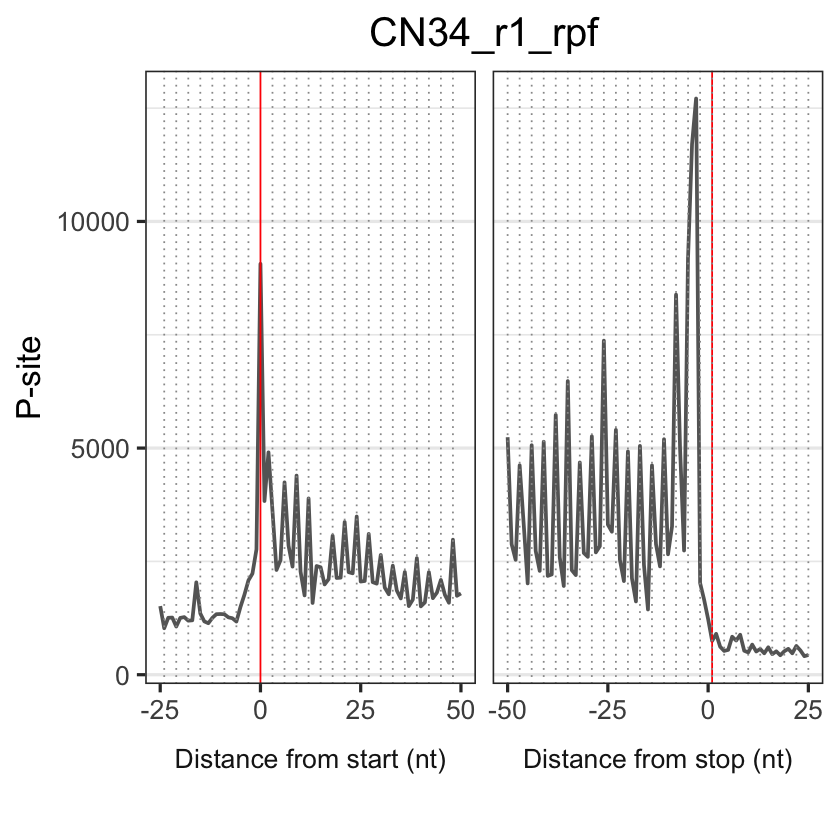

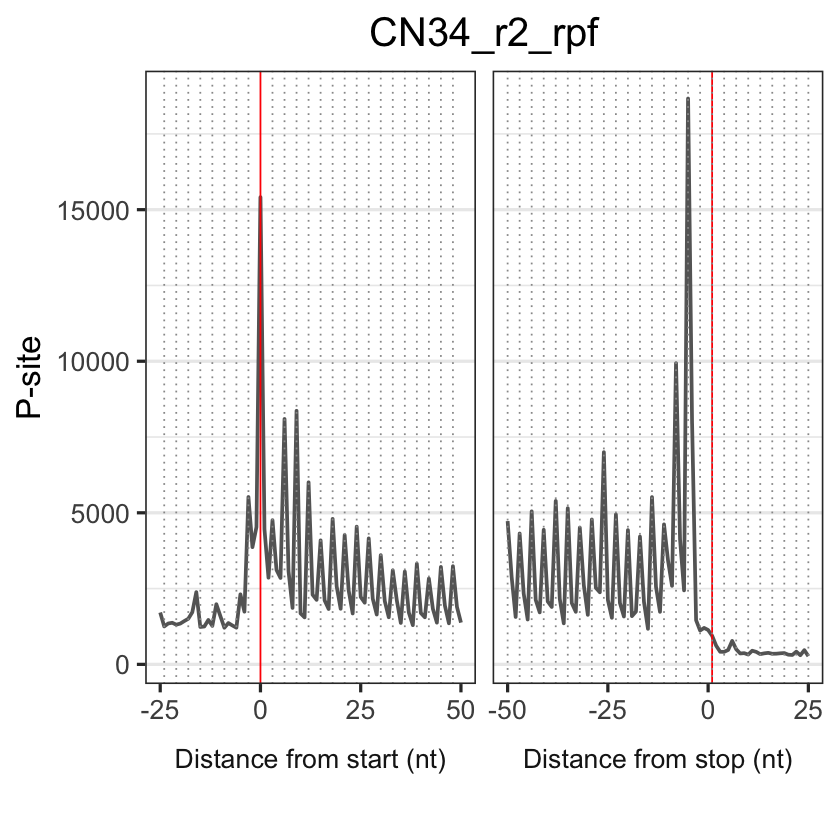

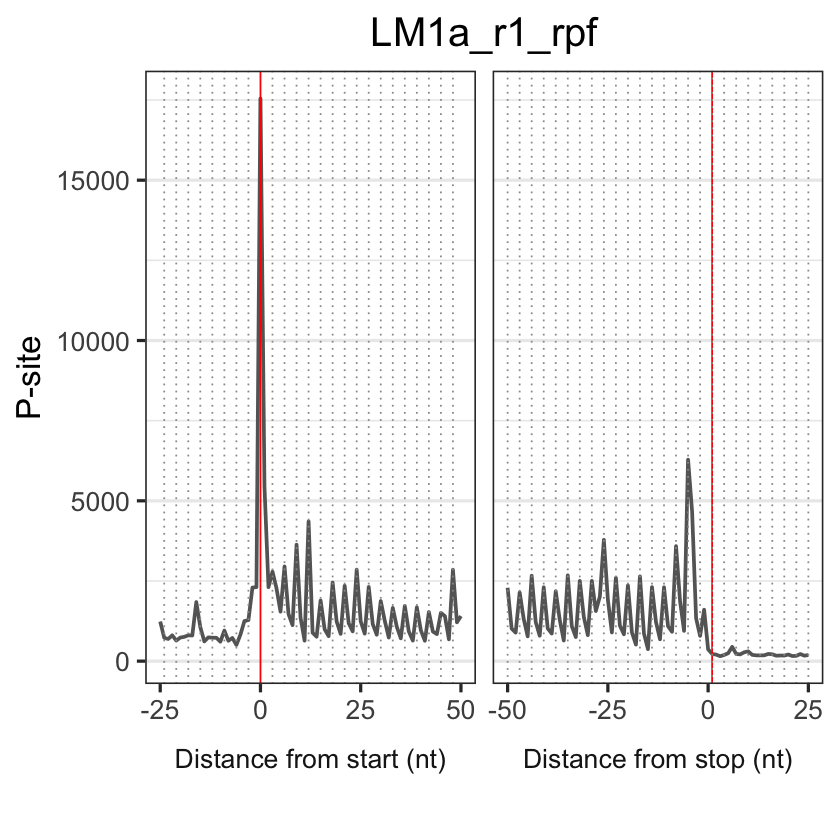

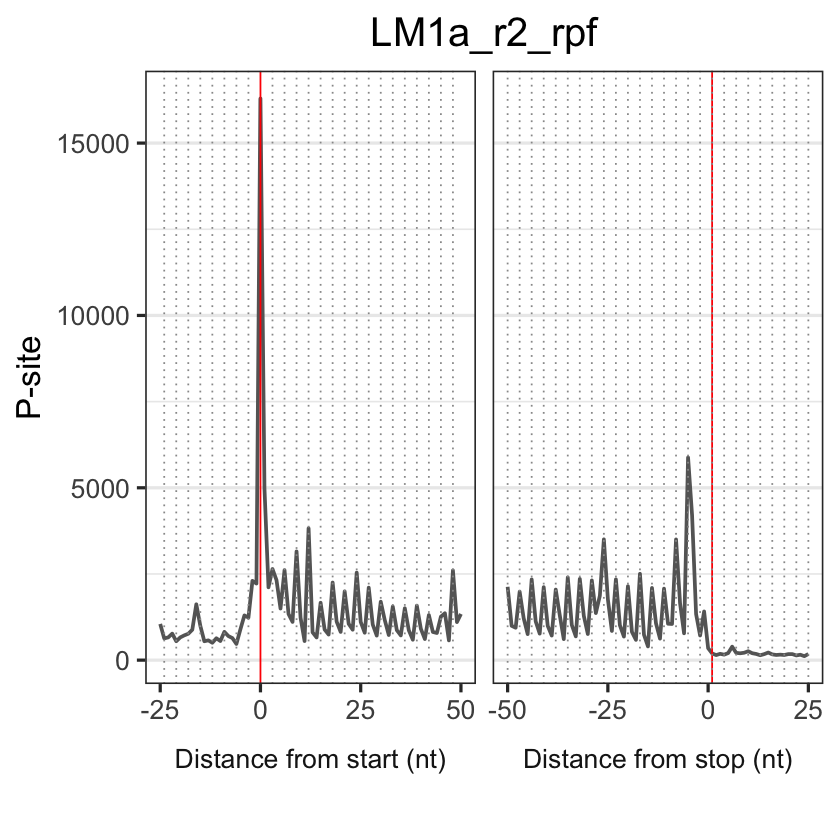

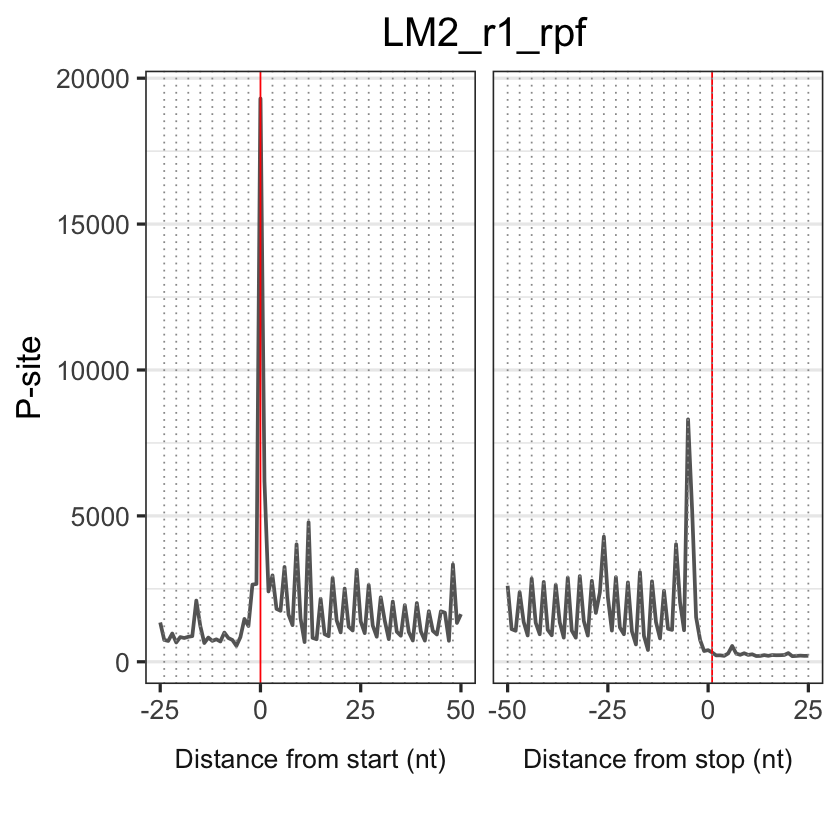

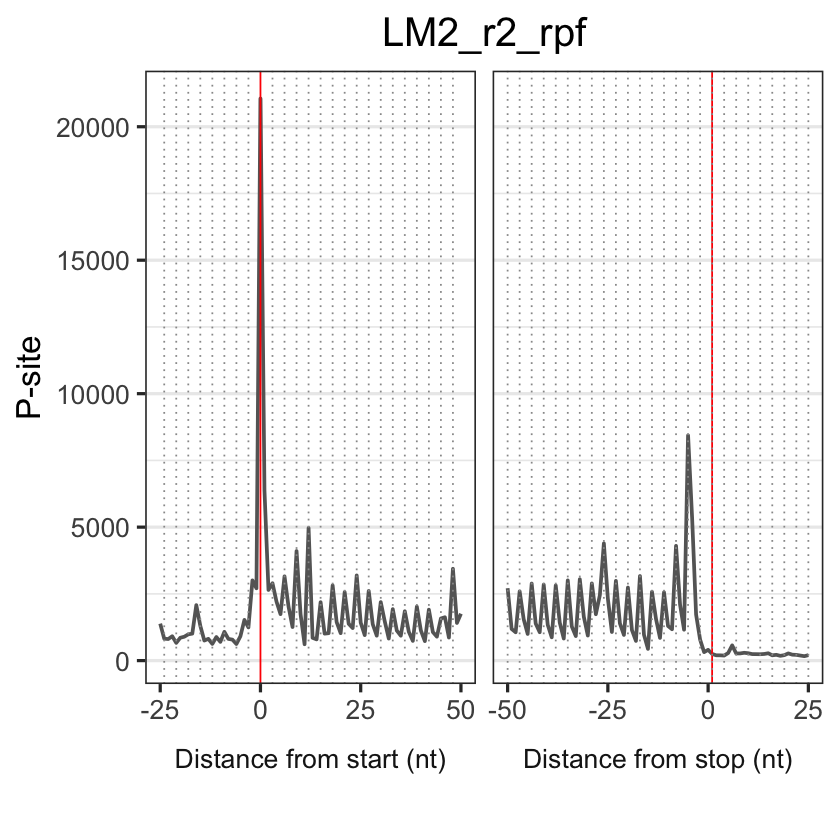

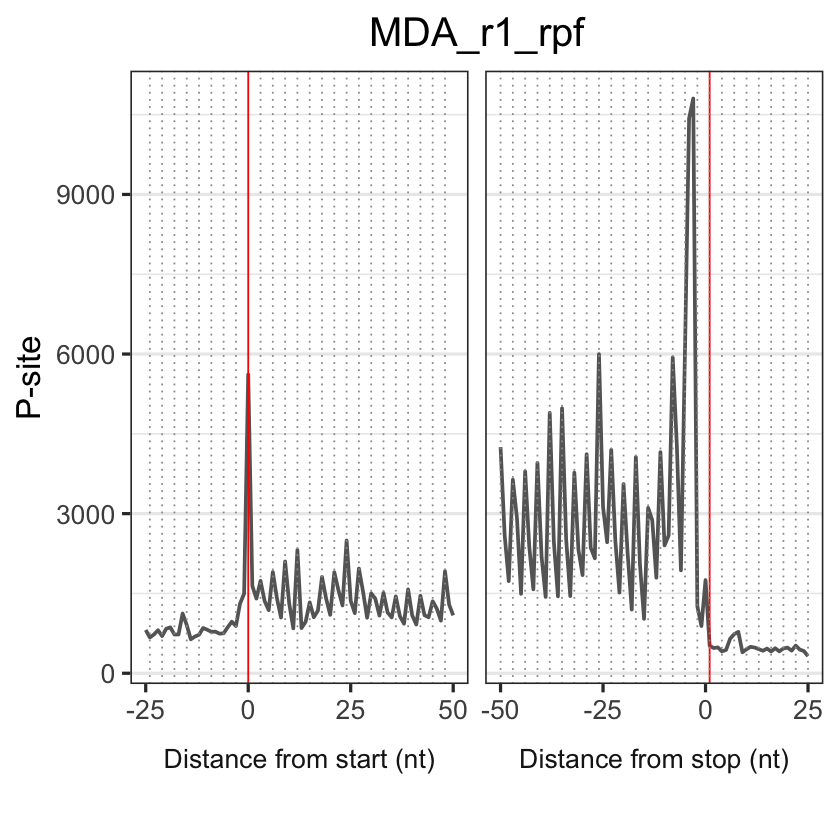

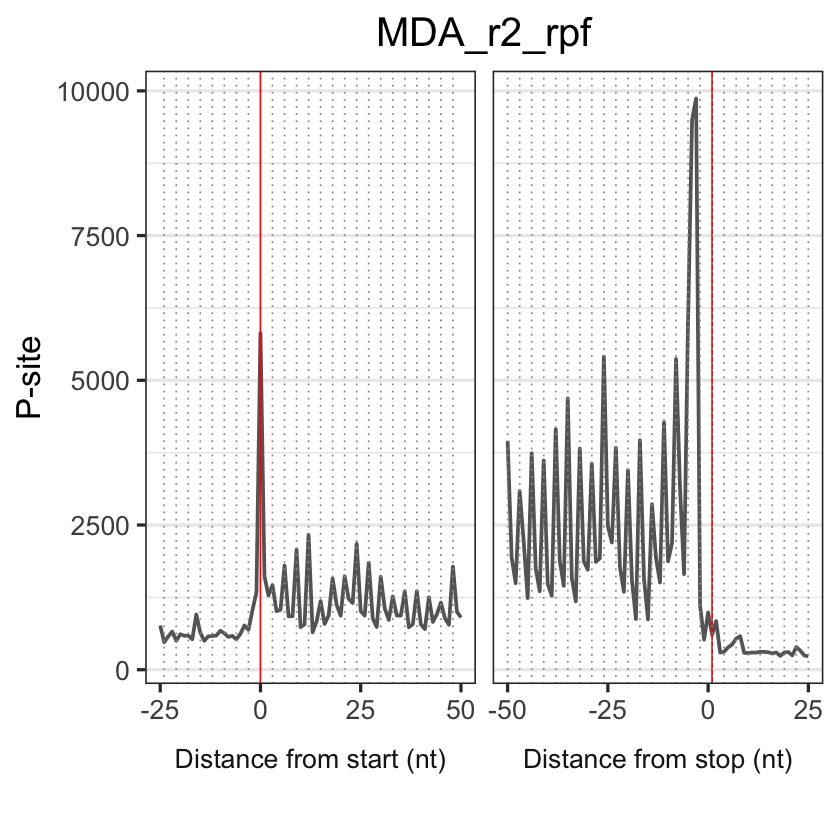

In [19]:
suppressWarnings(Ribolog::print_rop(reads_psite_list, annotation))

- Save the output as a PDF instead

In [20]:
suppressWarnings(Ribolog::print_rop(reads_psite_list, annotation, outfile= 'ribosome_occupancy_profiles.pdf'))

[1] "PDF (ribosome_occupancy_profiles.pdf) created and saved"

# QC.4: Visualising Periodicity by Region

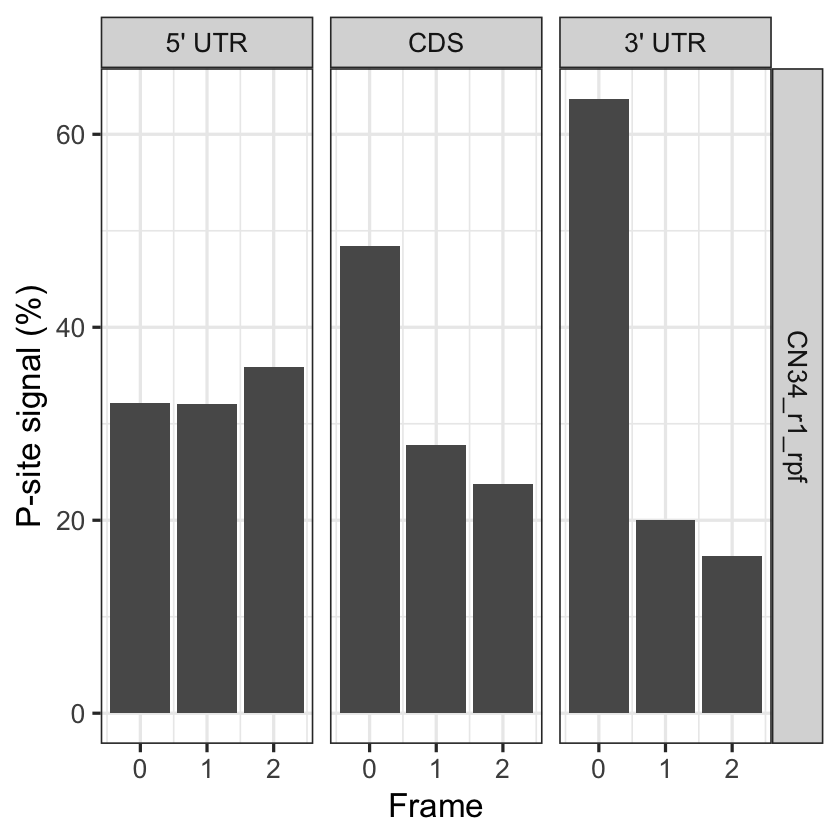

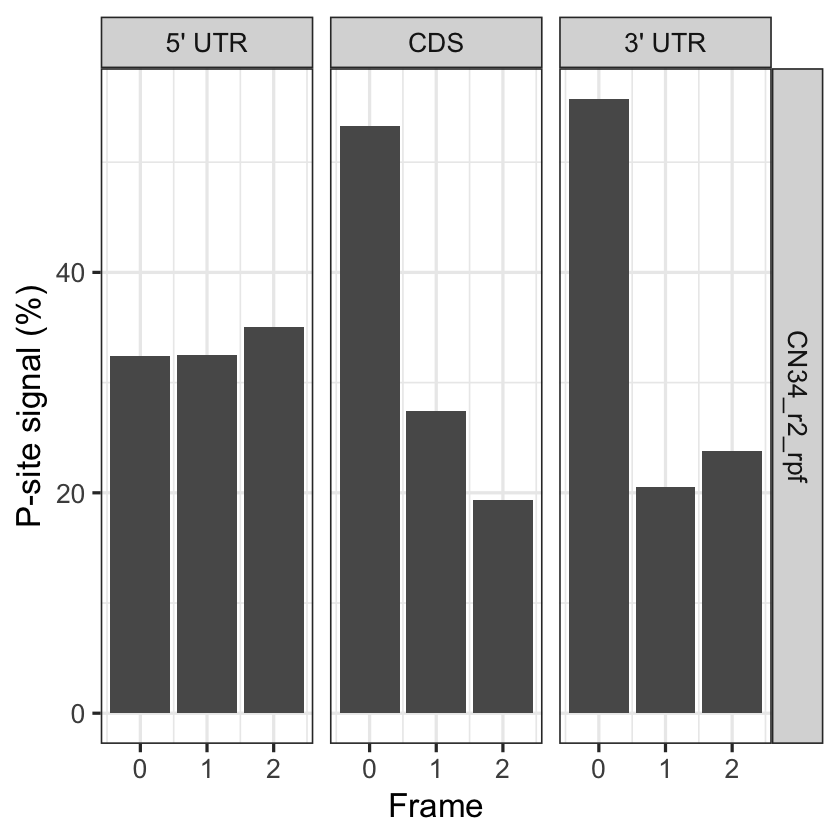

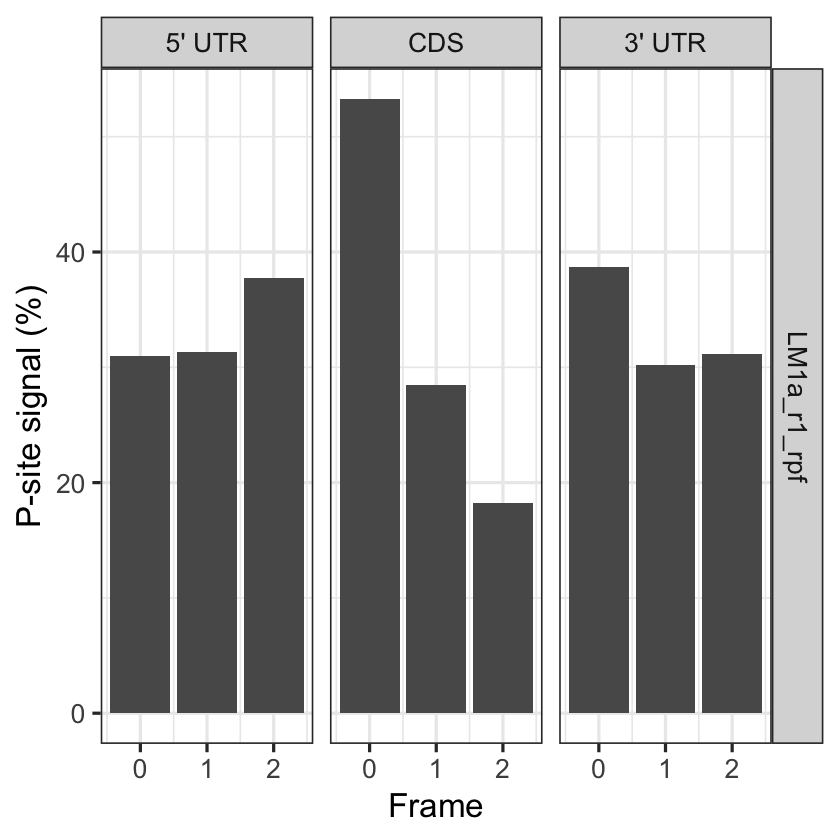

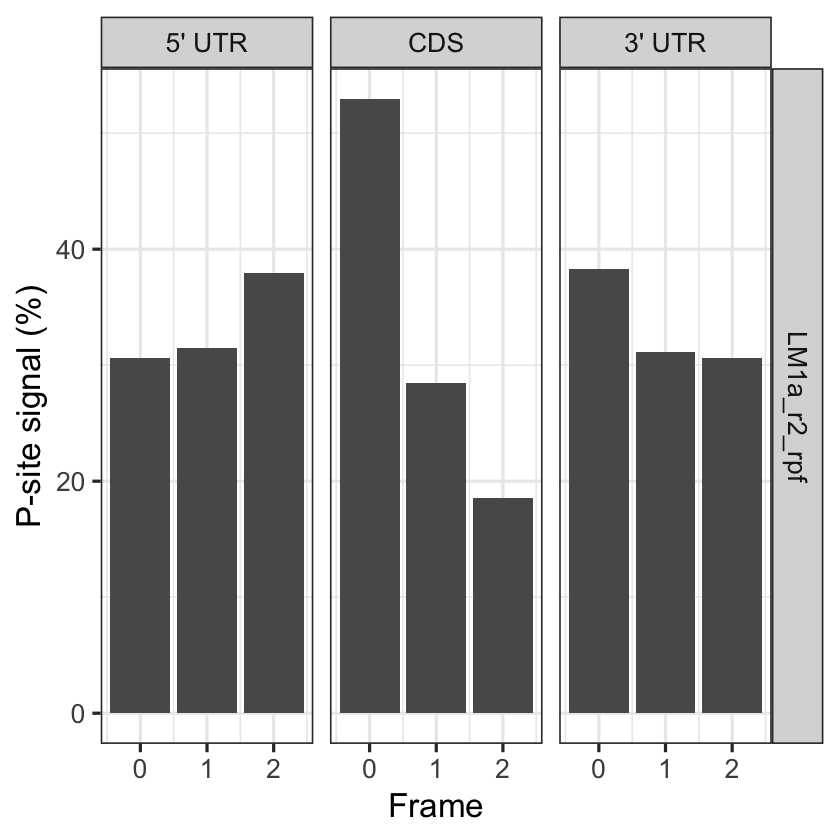

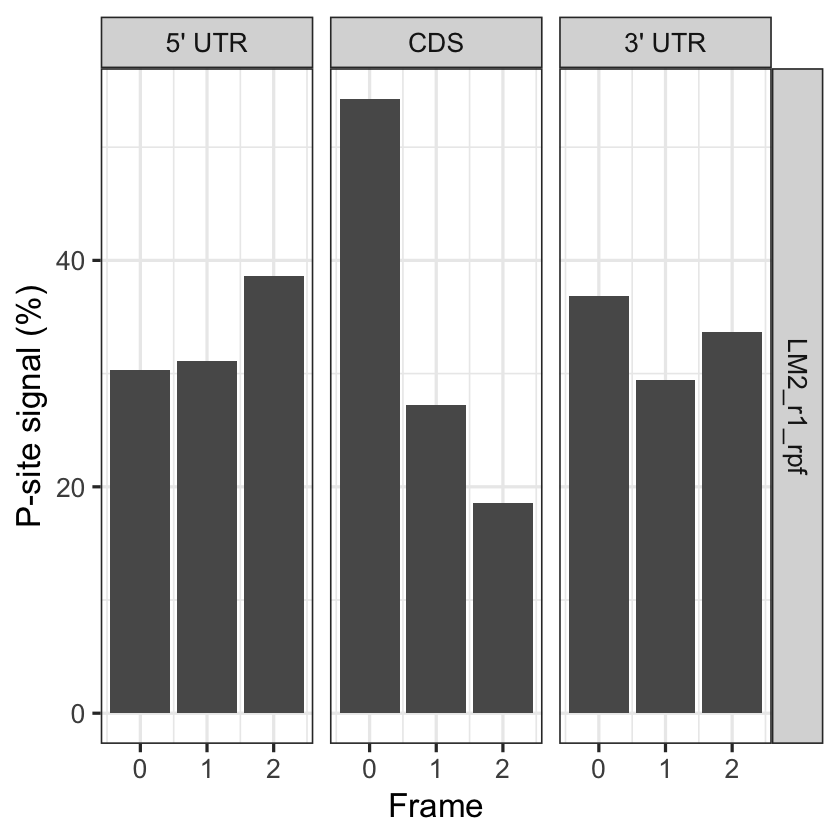

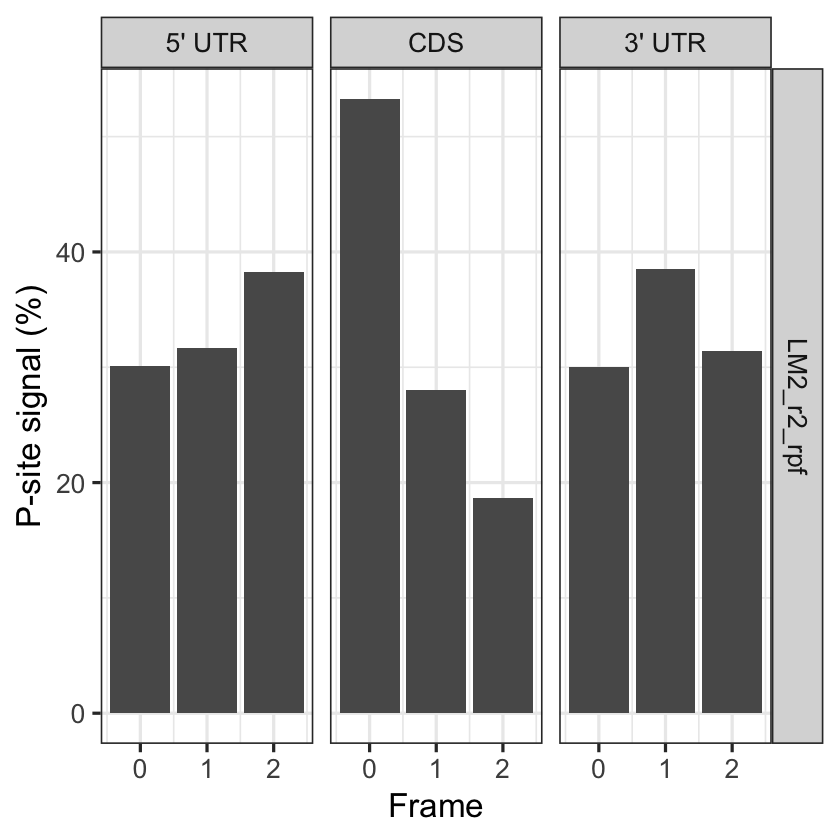

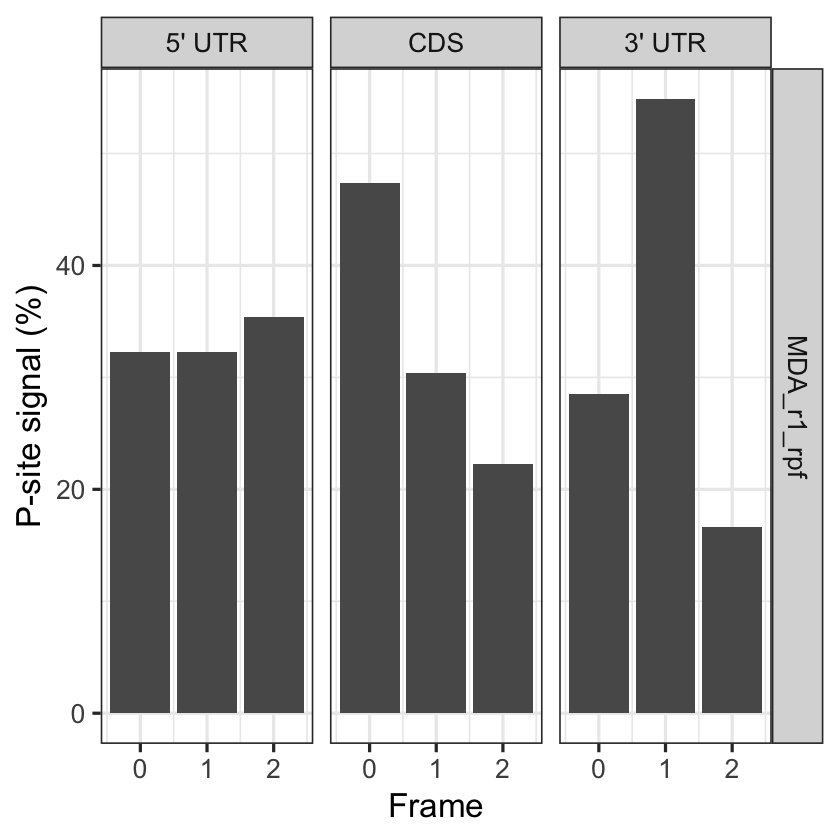

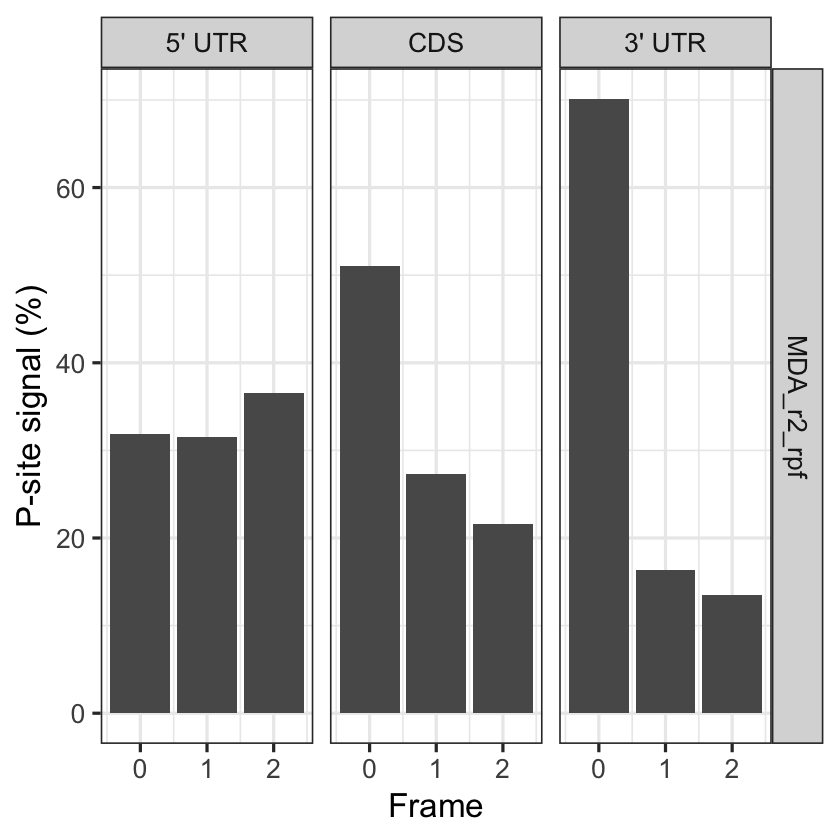

In [21]:
suppressWarnings(Ribolog::print_period_region(reads_psite_list))

- Save the same output as a PDF

In [22]:
suppressWarnings(Ribolog::print_period_region(reads_psite_list, outfile = 'periodicity_by_region.pdf'))

[1] "PDF (periodicity_by_region.pdf) created and saved"

# QC.5: Visualising Periodicity Length by Region

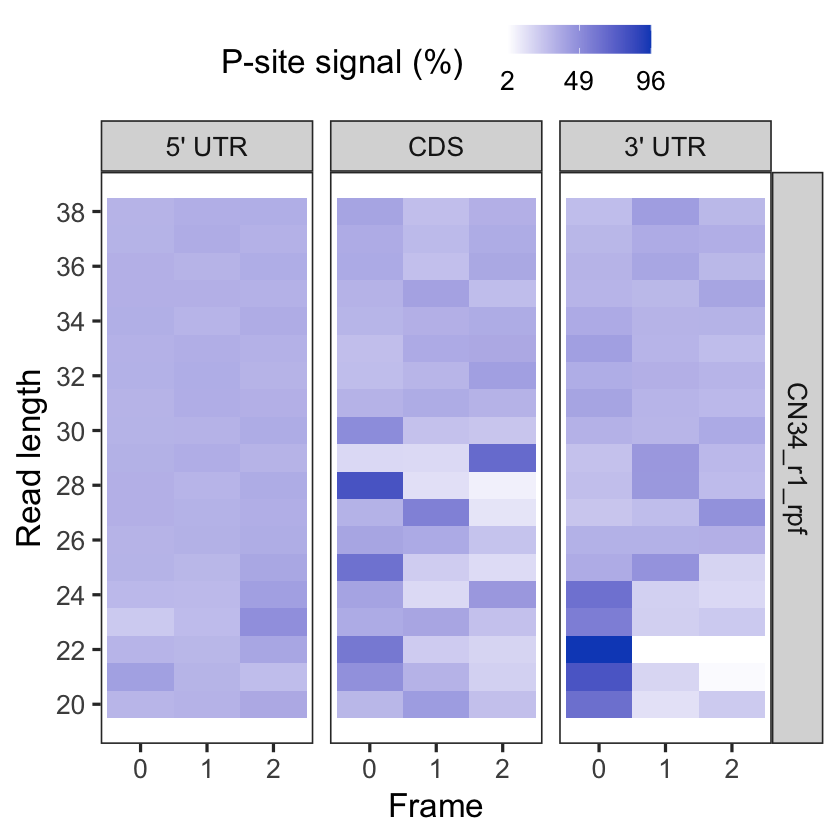

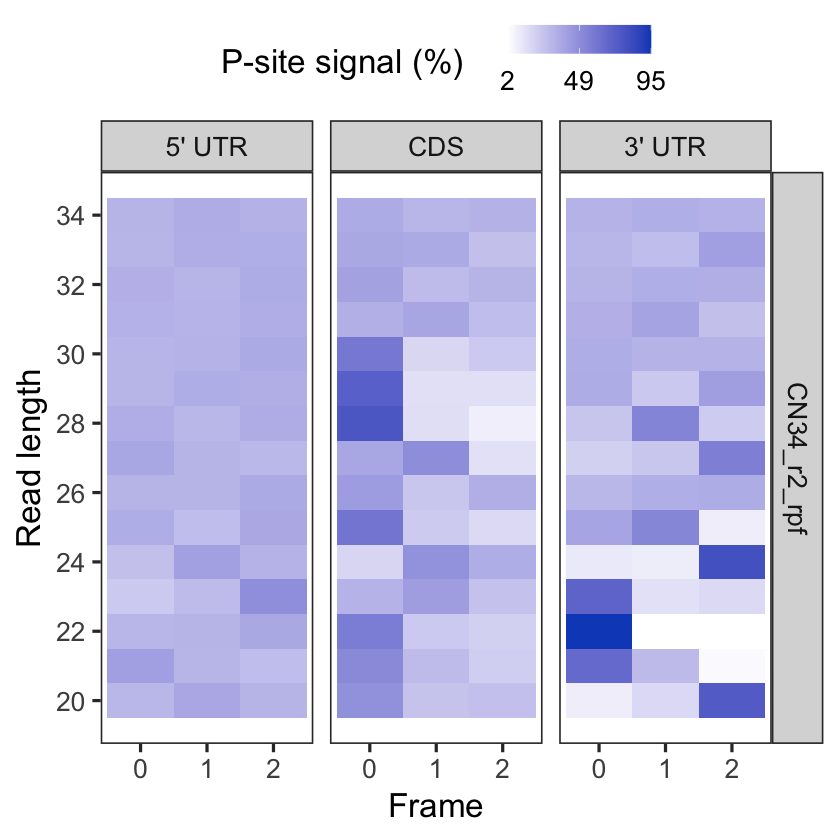

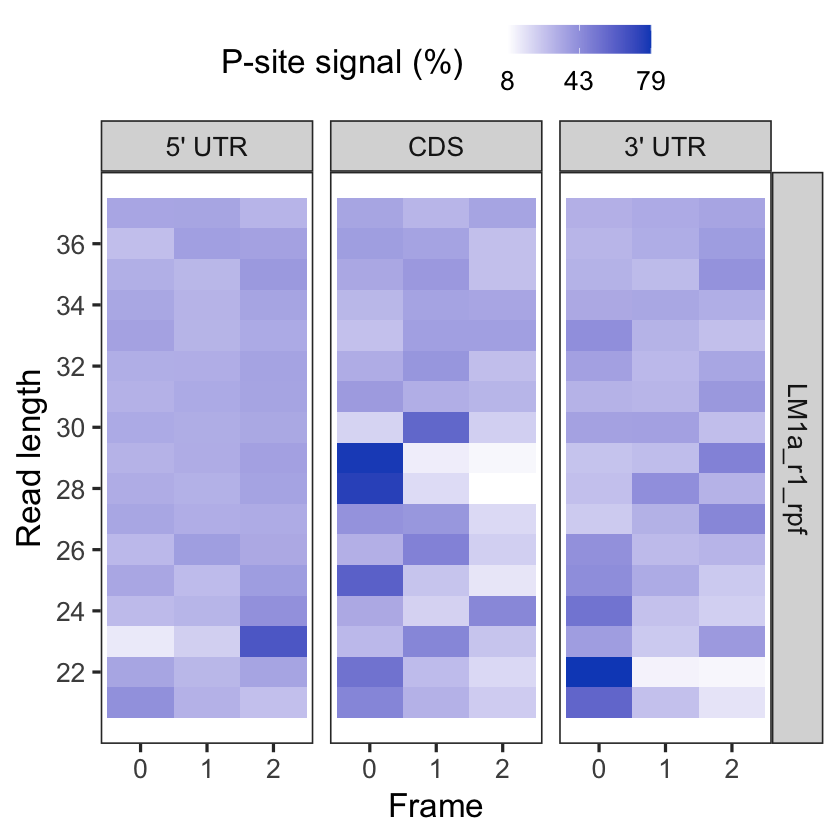

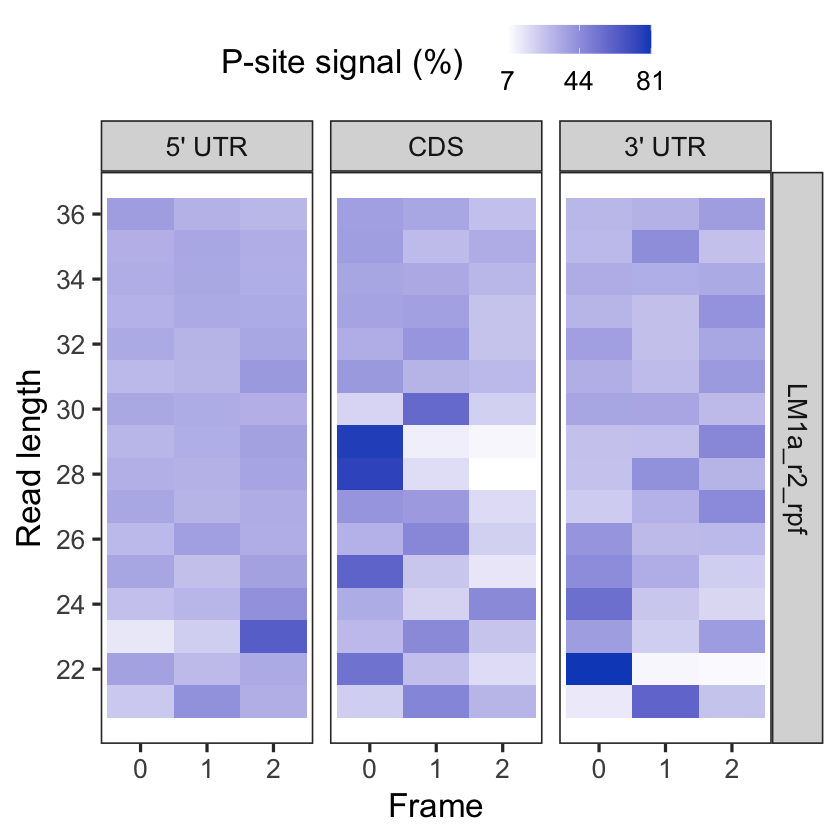

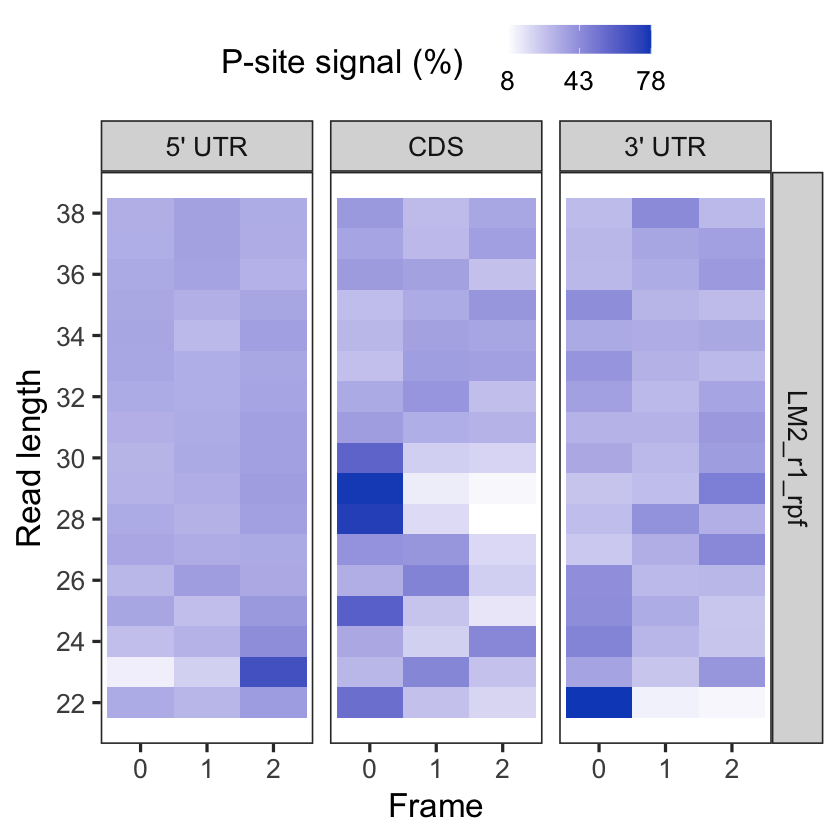

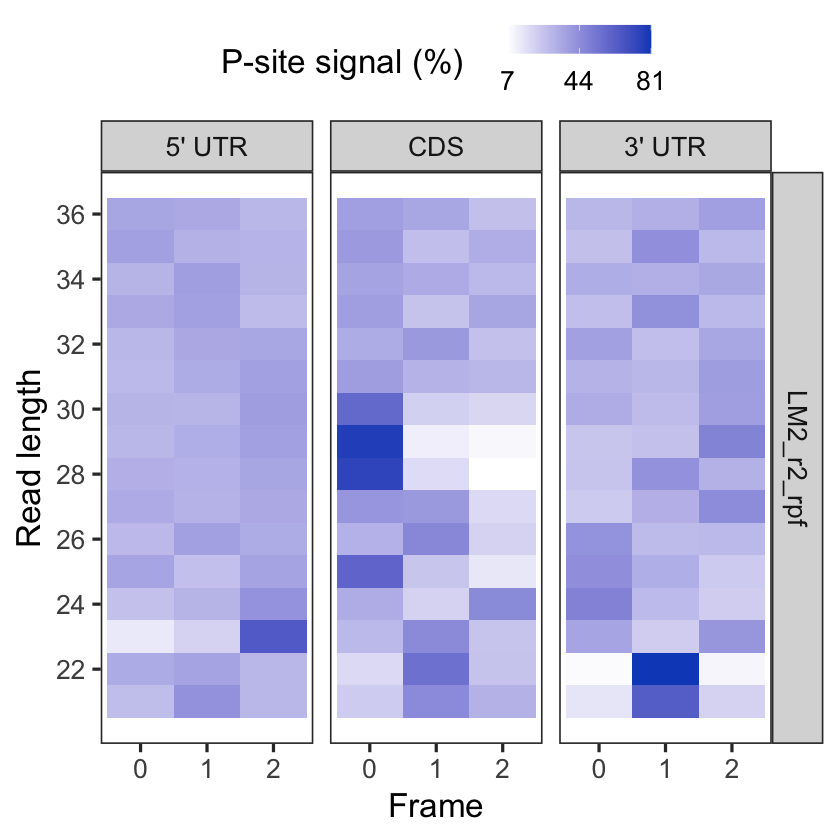

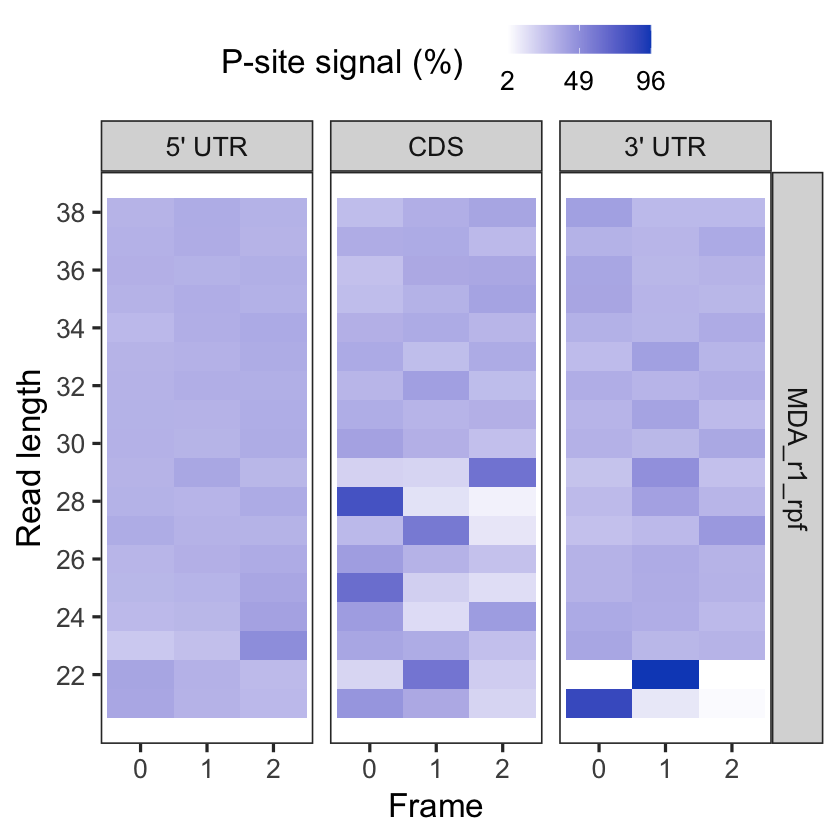

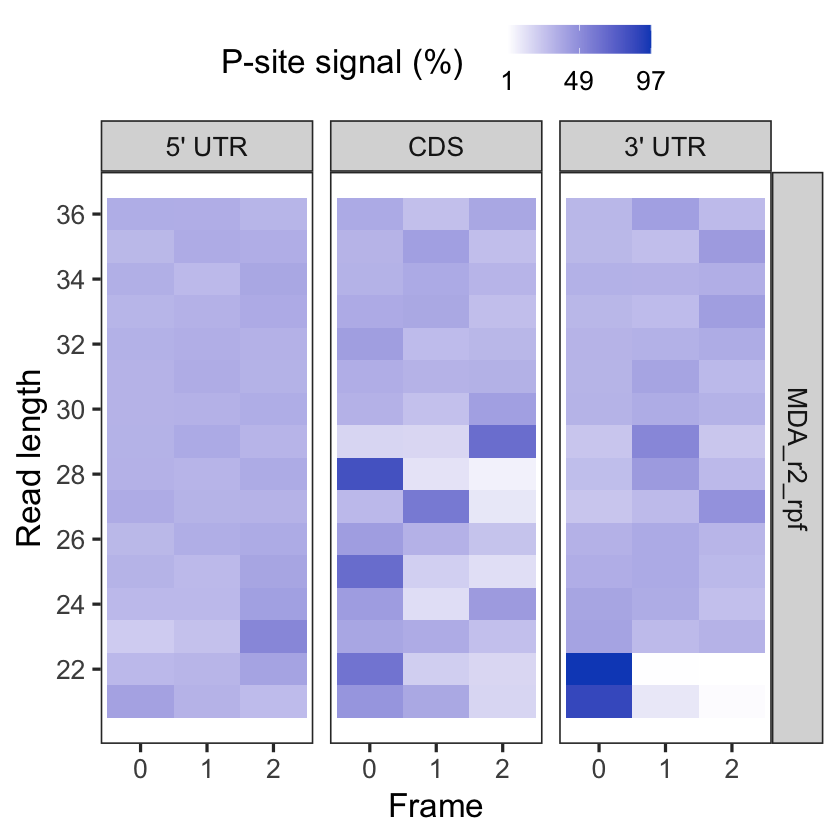

In [23]:
suppressWarnings(Ribolog::print_period_region_length(reads_psite_list))

- Save the output as a PDF

In [24]:
suppressWarnings(Ribolog::print_period_region_length(reads_psite_list, outfile='periodicity_by_length_region2.pdf'))

[1] "PDF (periodicity_by_length_region2.pdf) created and saved"

## Part 2: Codon Read Counts and CELP

The psite_to_codon_count function aggregates read p-site data to obtain codon read counts. It generates a tr_codon_read_count object which is a list of lists with the following structure: tr_codon_read_count$<sample.name>$<transcript.ID> data.frame: [1] codon_number [2] codon_type [3] aa_type [4] observed_count.

In [25]:
# Decide your range of the length of the reads that you want to move forward with. 
# We choose 24-32
l_range <- c(24, 32)

In [26]:
# Load your CDS fasta file generated from the python script
cDNA_longest_CDS <- 'cDNA_longest_CDS.txt'
# fasta_file <- cdna_fastas

- The average run time for the processing of codon counts is 320 seconds (~5.5 mins) for 4 bam files.

<b> NOTE: </b> You can specify the actual cdna_fasta object or specify a path to the fasta file. The function will process it accordingly.

In [27]:
tr_codon_read_count <-  Ribolog::psite_to_codon_count(reads_psite_list, 
                                                     length_range = l_range, 
                                                     annotation, 
                                                     fasta_file = 'cDNA_longest_CDS.txt')

In [28]:
head(tr_codon_read_count$CN34_r1_rpf$ENST00000000233, n = 10)

codon_number codon_type aa_type observed_count
1   1           ATG        M       0             
2   2           GGC        G       0             
3   3           CTC        L       0             
4   4           ACC        T       0             
5   5           GTG        V       0             
6   6           TCC        S       0             
7   7           GCG        A       0             
8   8           CTC        L       0             
9   9           TTT        F       0             
10 10           TCG        S       0

### Calculate CELP Bias

- This is the main step in the CELP procedure. The CELP_bias function computes codon-level bias coefficients and bias-corrected read counts.

- The procedure starts with running a loess curve on codon read counts along the transcript to borrow information from neighboring codons mitigating the uncertainty of p-site offset assignment and experimental stochasticity. Loess span parameter is calculated from the user-defined codon_radius (default=5) and CDS length. Then, bias coefficient is calculated for each codon by integrating information on the excess of loess-predicted read counts at that codon comapred to the transcript’s background across samples. Finally, loess predicted count is divided by the bias coefficient to calculate the bias-corrected count. This function can be used in several modes (see function documentation for explanation of arguments). For example, the “direct” fitting method for loess takes longer but does not run into kd-tree-related memory issues. “Gini-moderated” correction ensures that the power of correction is proportional to the original level of heterogenity in read distribution along the transcript.

- Codons with large bias coefficients are those with a consistent excess of reads across samples compared to the transcript background (reproducible peaks). They indicate translational stalling.

- The CELP_bias function returns a list composed of two lists: [1] bias coefficients, and [2] bias-corrected read counts. The bias coefficient list has the following structure: list $<transcript.ID> data.frame: [1] codon_number [2] codon_type [3] aa_type [4] bias_coefficient. 

- The bias-corrected read count list has the following structure: list$<sample.name>$<transcript.ID> data.frame: [1] codon_number [2] codon_type [3] aa_type [4] observed_count [5] bias_coefficient [6] corrected_count.

- The CELP_bias function computes codon-level bias coefficients and bias-corrected read counts.
- This step takes about ~4.5 mins/bam files.

In [29]:
tr_codon_bias_coeff_loess_corrected_count <- Ribolog::CELP_bias(tr_codon_read_count)

In [30]:
print((tr_codon_bias_coeff_loess_corrected_count$tr_codon_read_count_loess_corrected$CN34_r1_rpf$ENST00000000233)[
    c(30:49), ])

   codon_number codon_type aa_type observed_count bias_coefficient
30           30        AAG       K              0        1.0000000
31           31        ACC       T              0        1.0000000
32           32        ACA       T              0        1.0000000
33           33        ATC       I              0        1.0000000
34           34        CTG       L              0        1.0000000
35           35        TAC       Y              0        1.0190339
36           36        AAA       K              0        7.6257349
37           37        CTG       L              0       15.3393111
38           38        AAG       K             22       17.9398328
39           39        TTG       L              4       13.6208569
40           40        GGG       G              0        7.3166406
41           41        GAG       E              0        0.8204119
42           42        ATT       I              0        1.1956846
43           43        GTC       V              0        1.655

### Visualise Translational Bias

The function visualize_CELP plots codon-level observed (upward black bars) and corrected (downward purple bars) read counts and the bias coefficient (red line) along the transcript. This allows visual inspection of the prominent bias positions and a comparison of read count heterogeneity along the transcript before and after CELP bias correction.

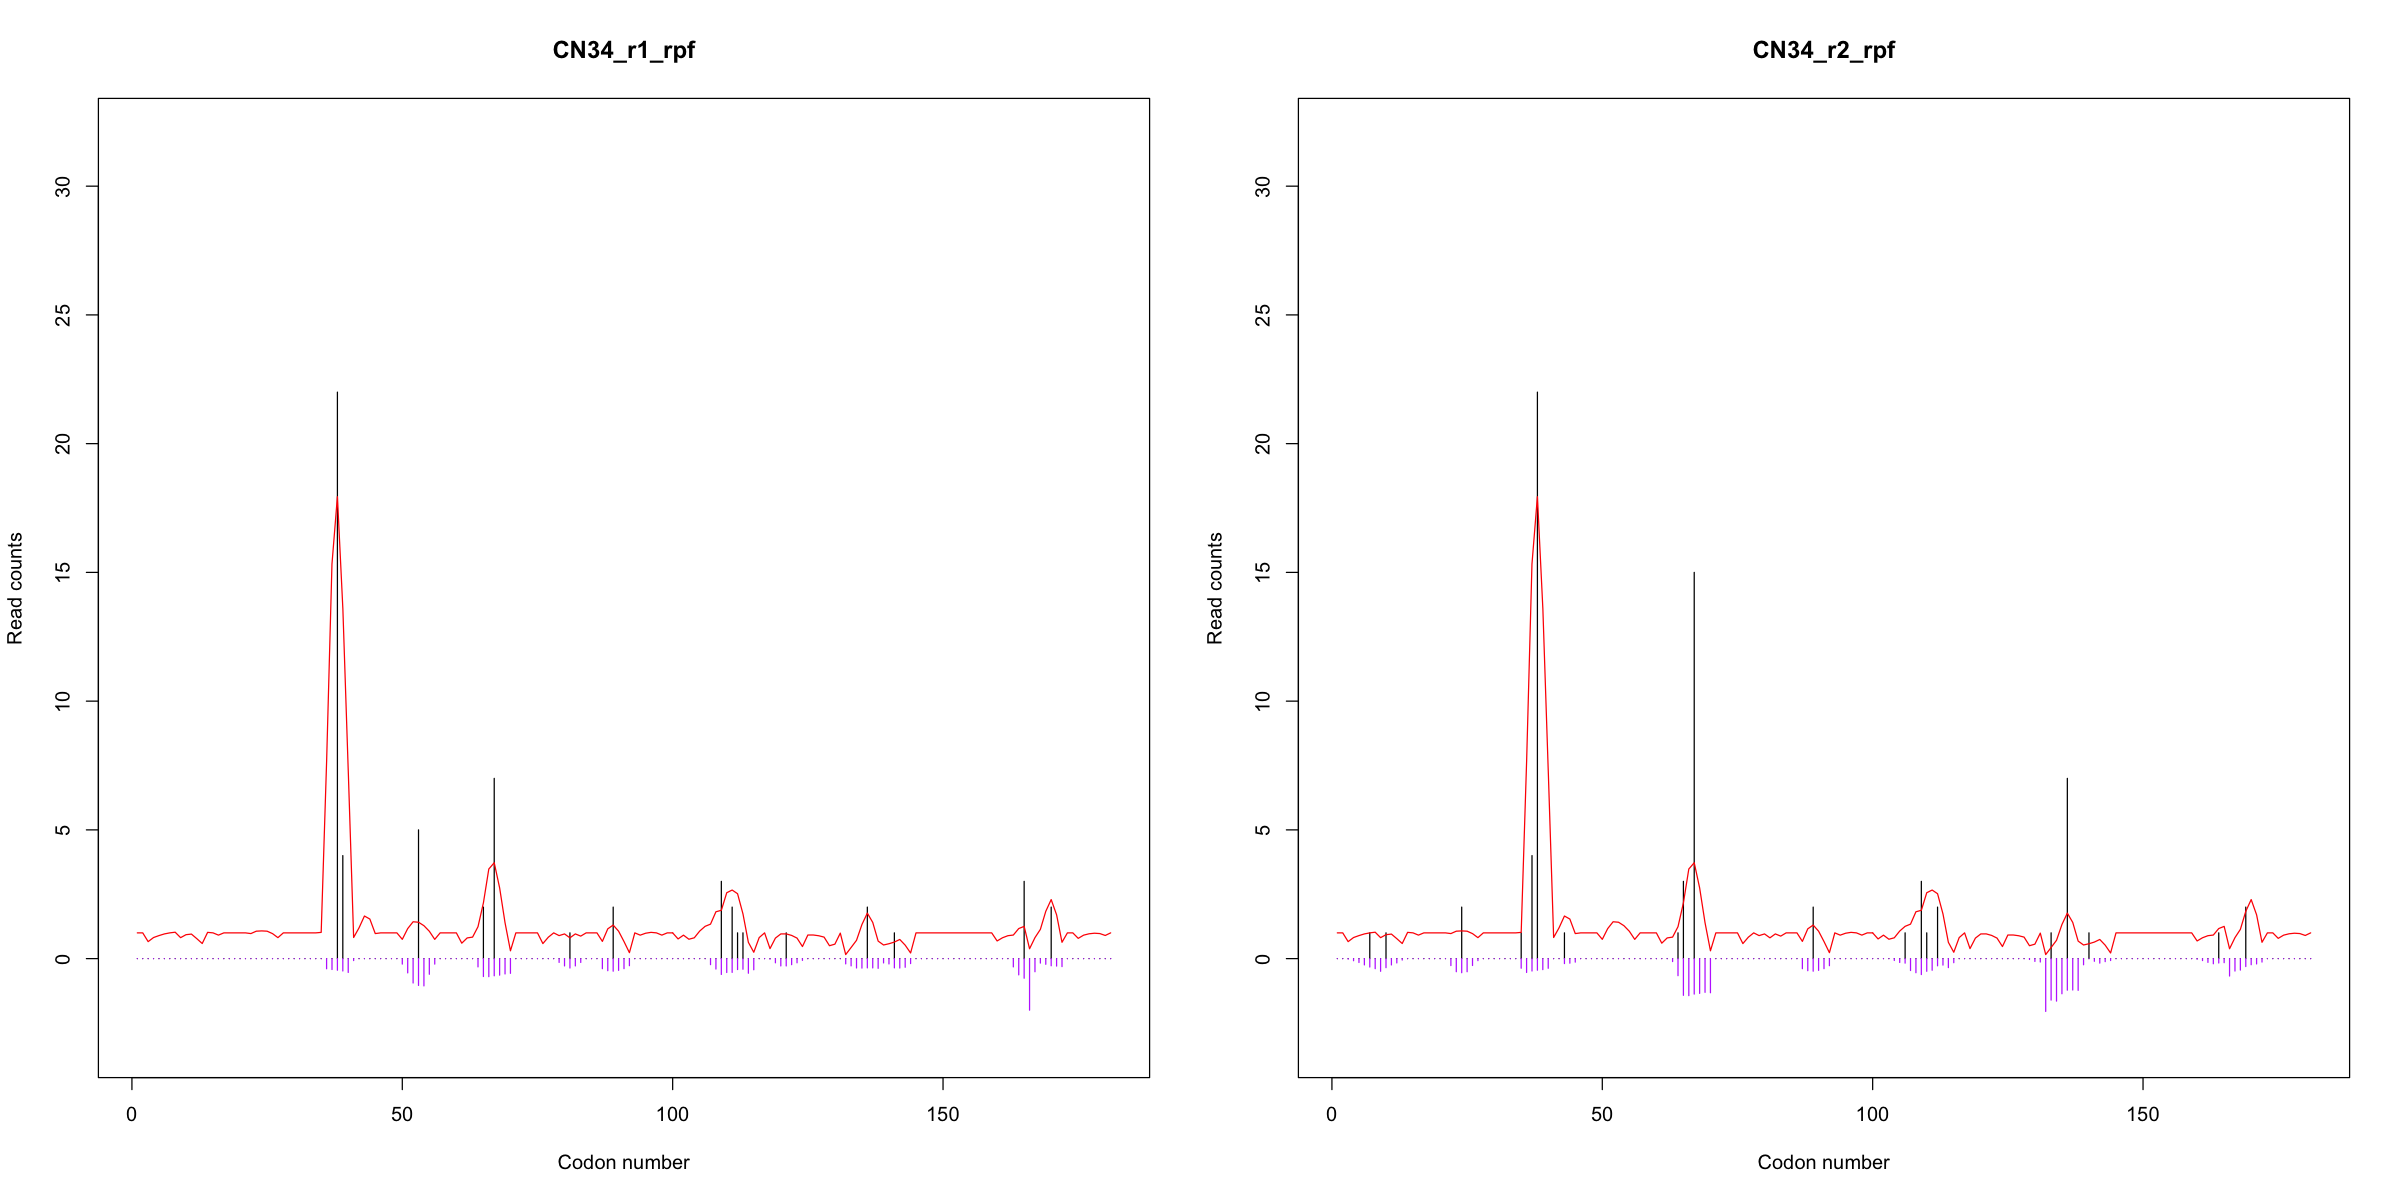

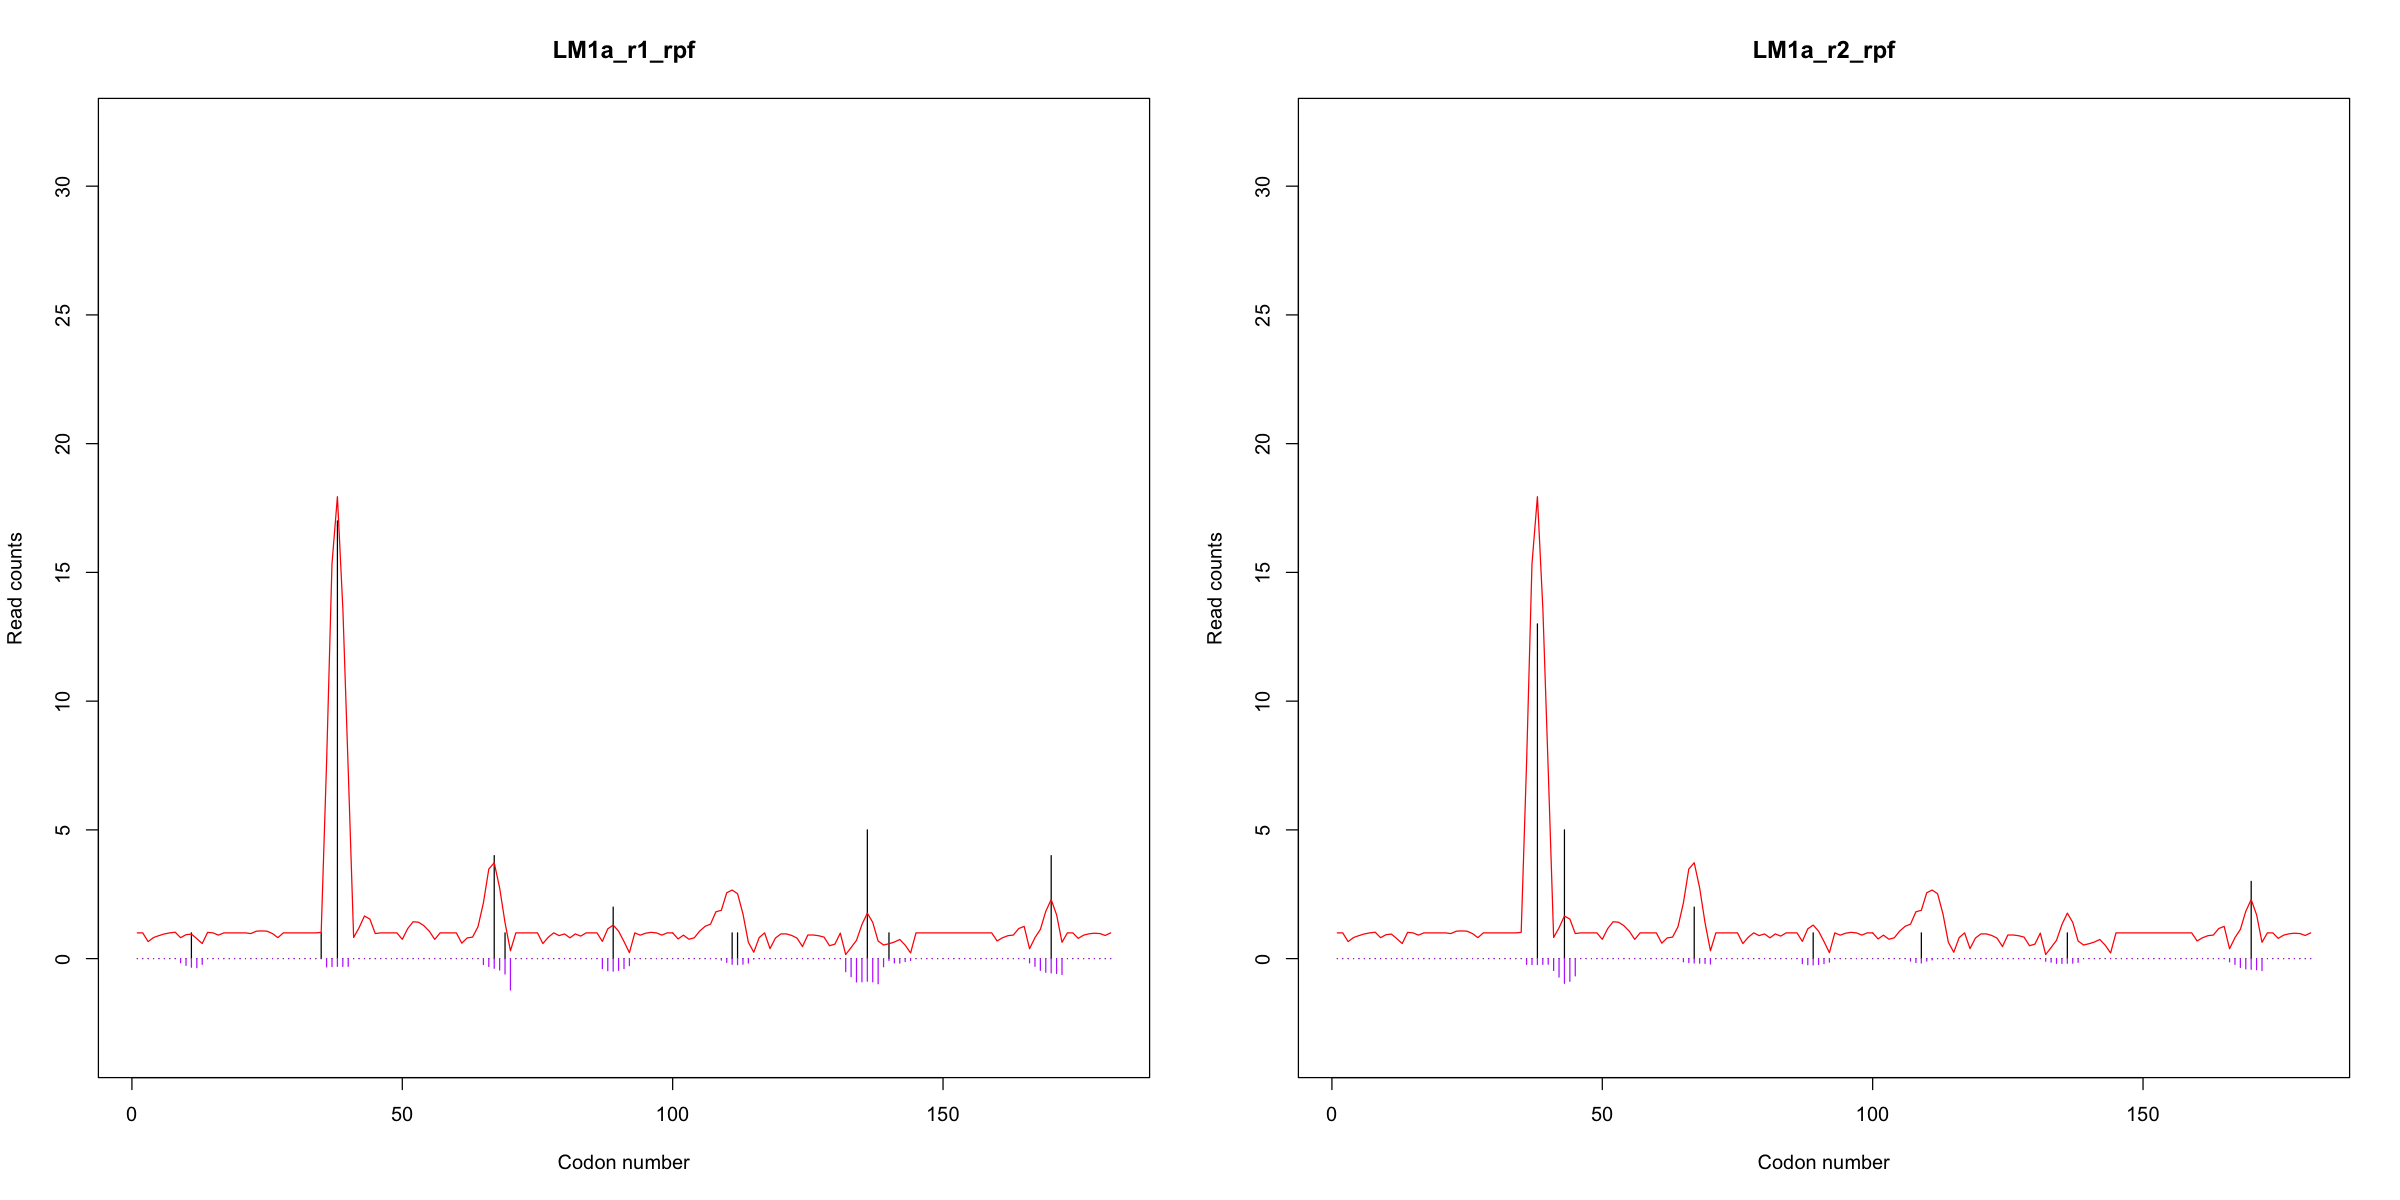

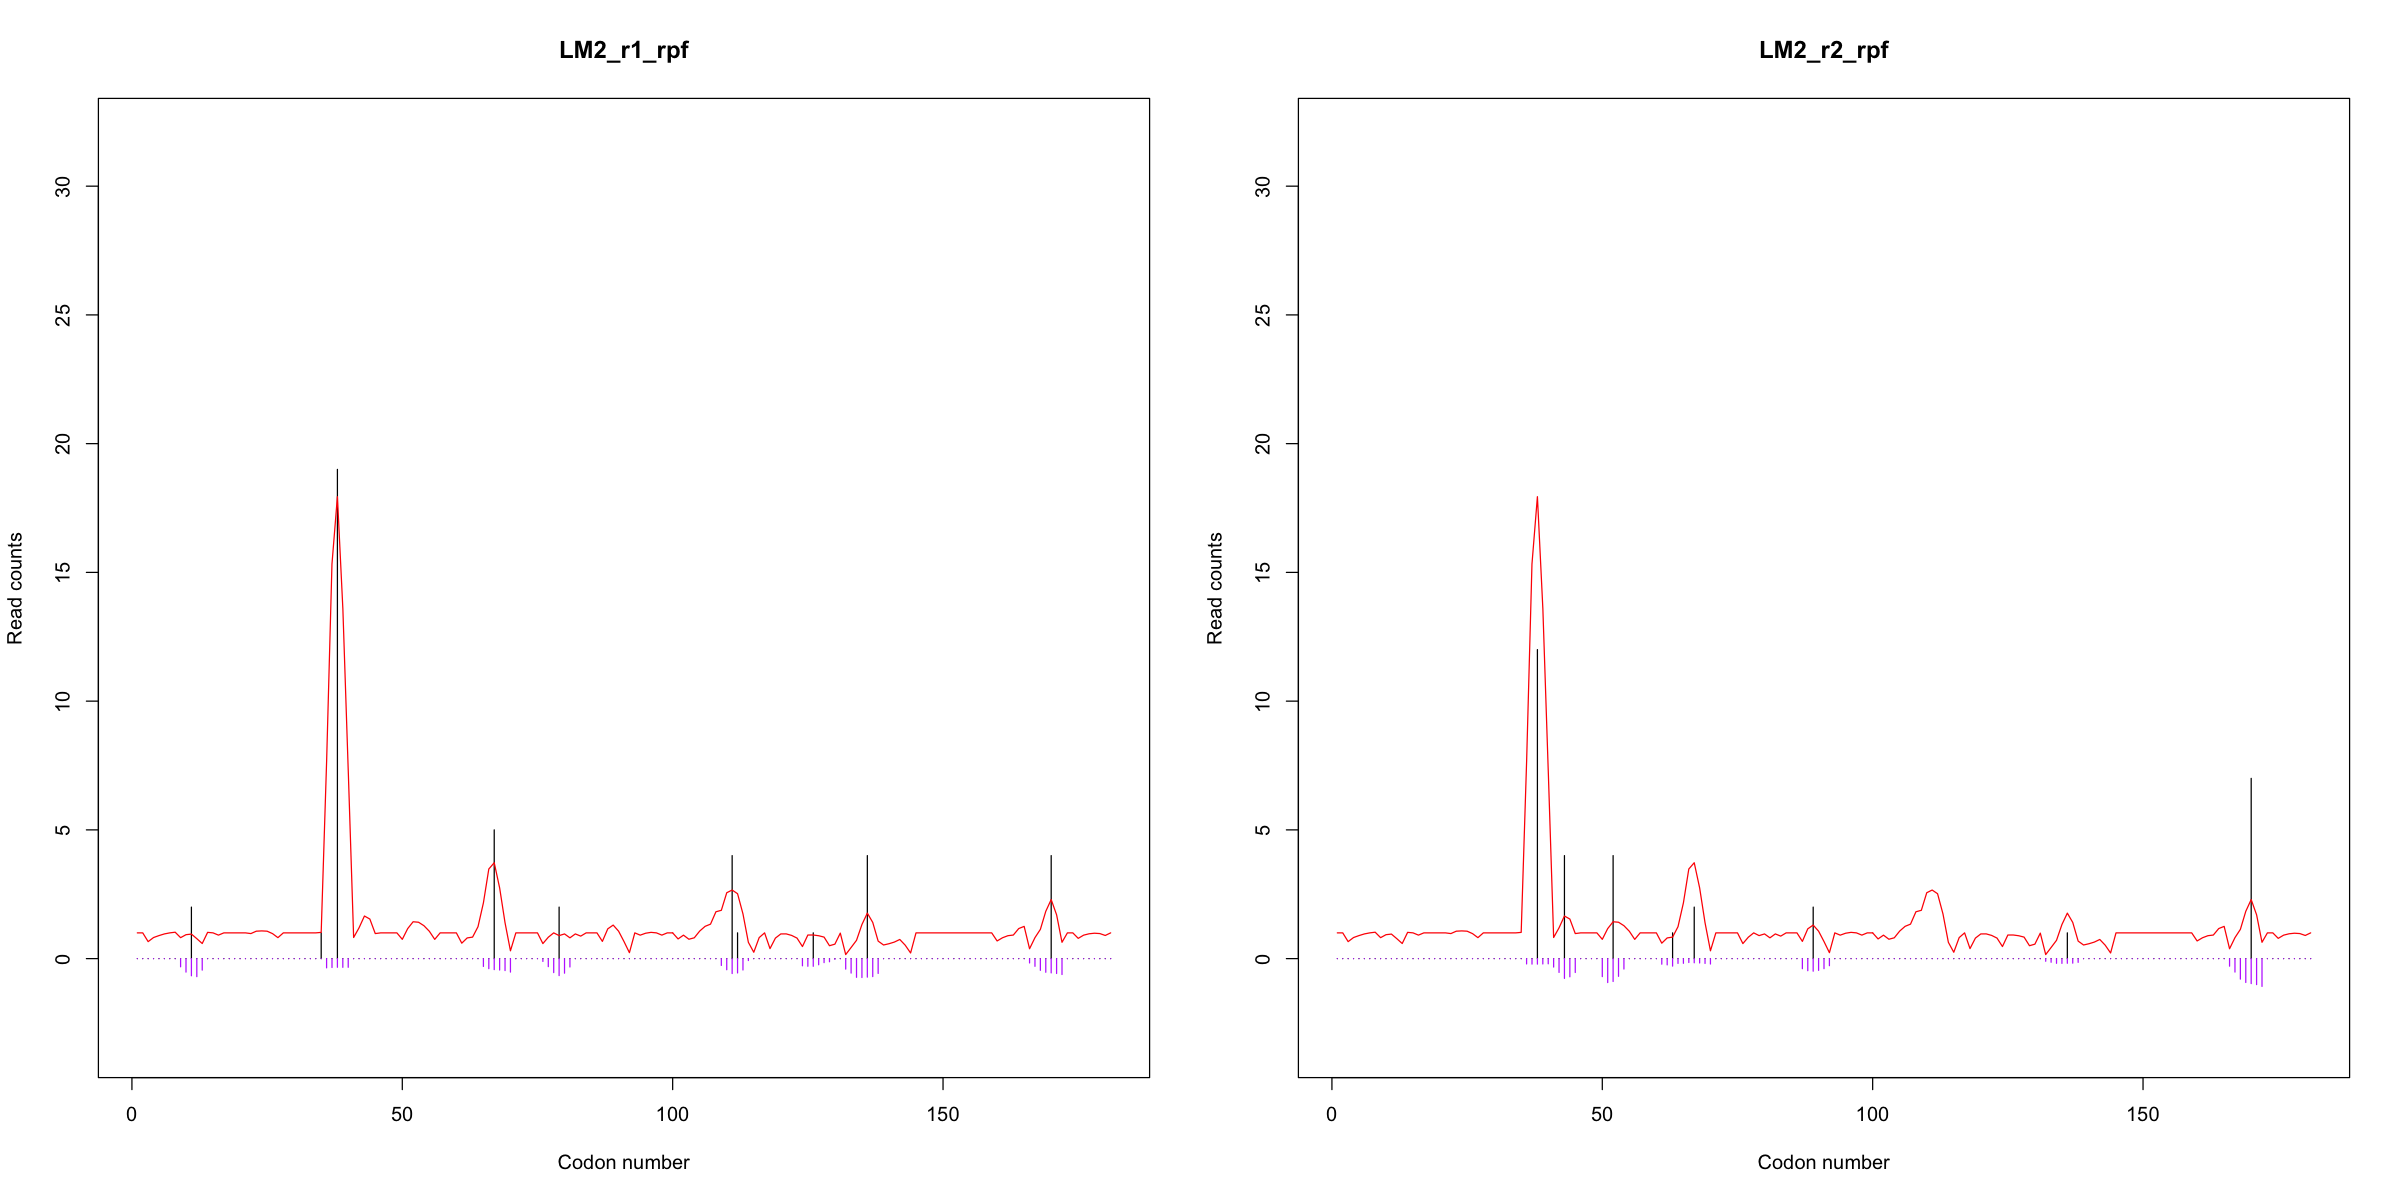

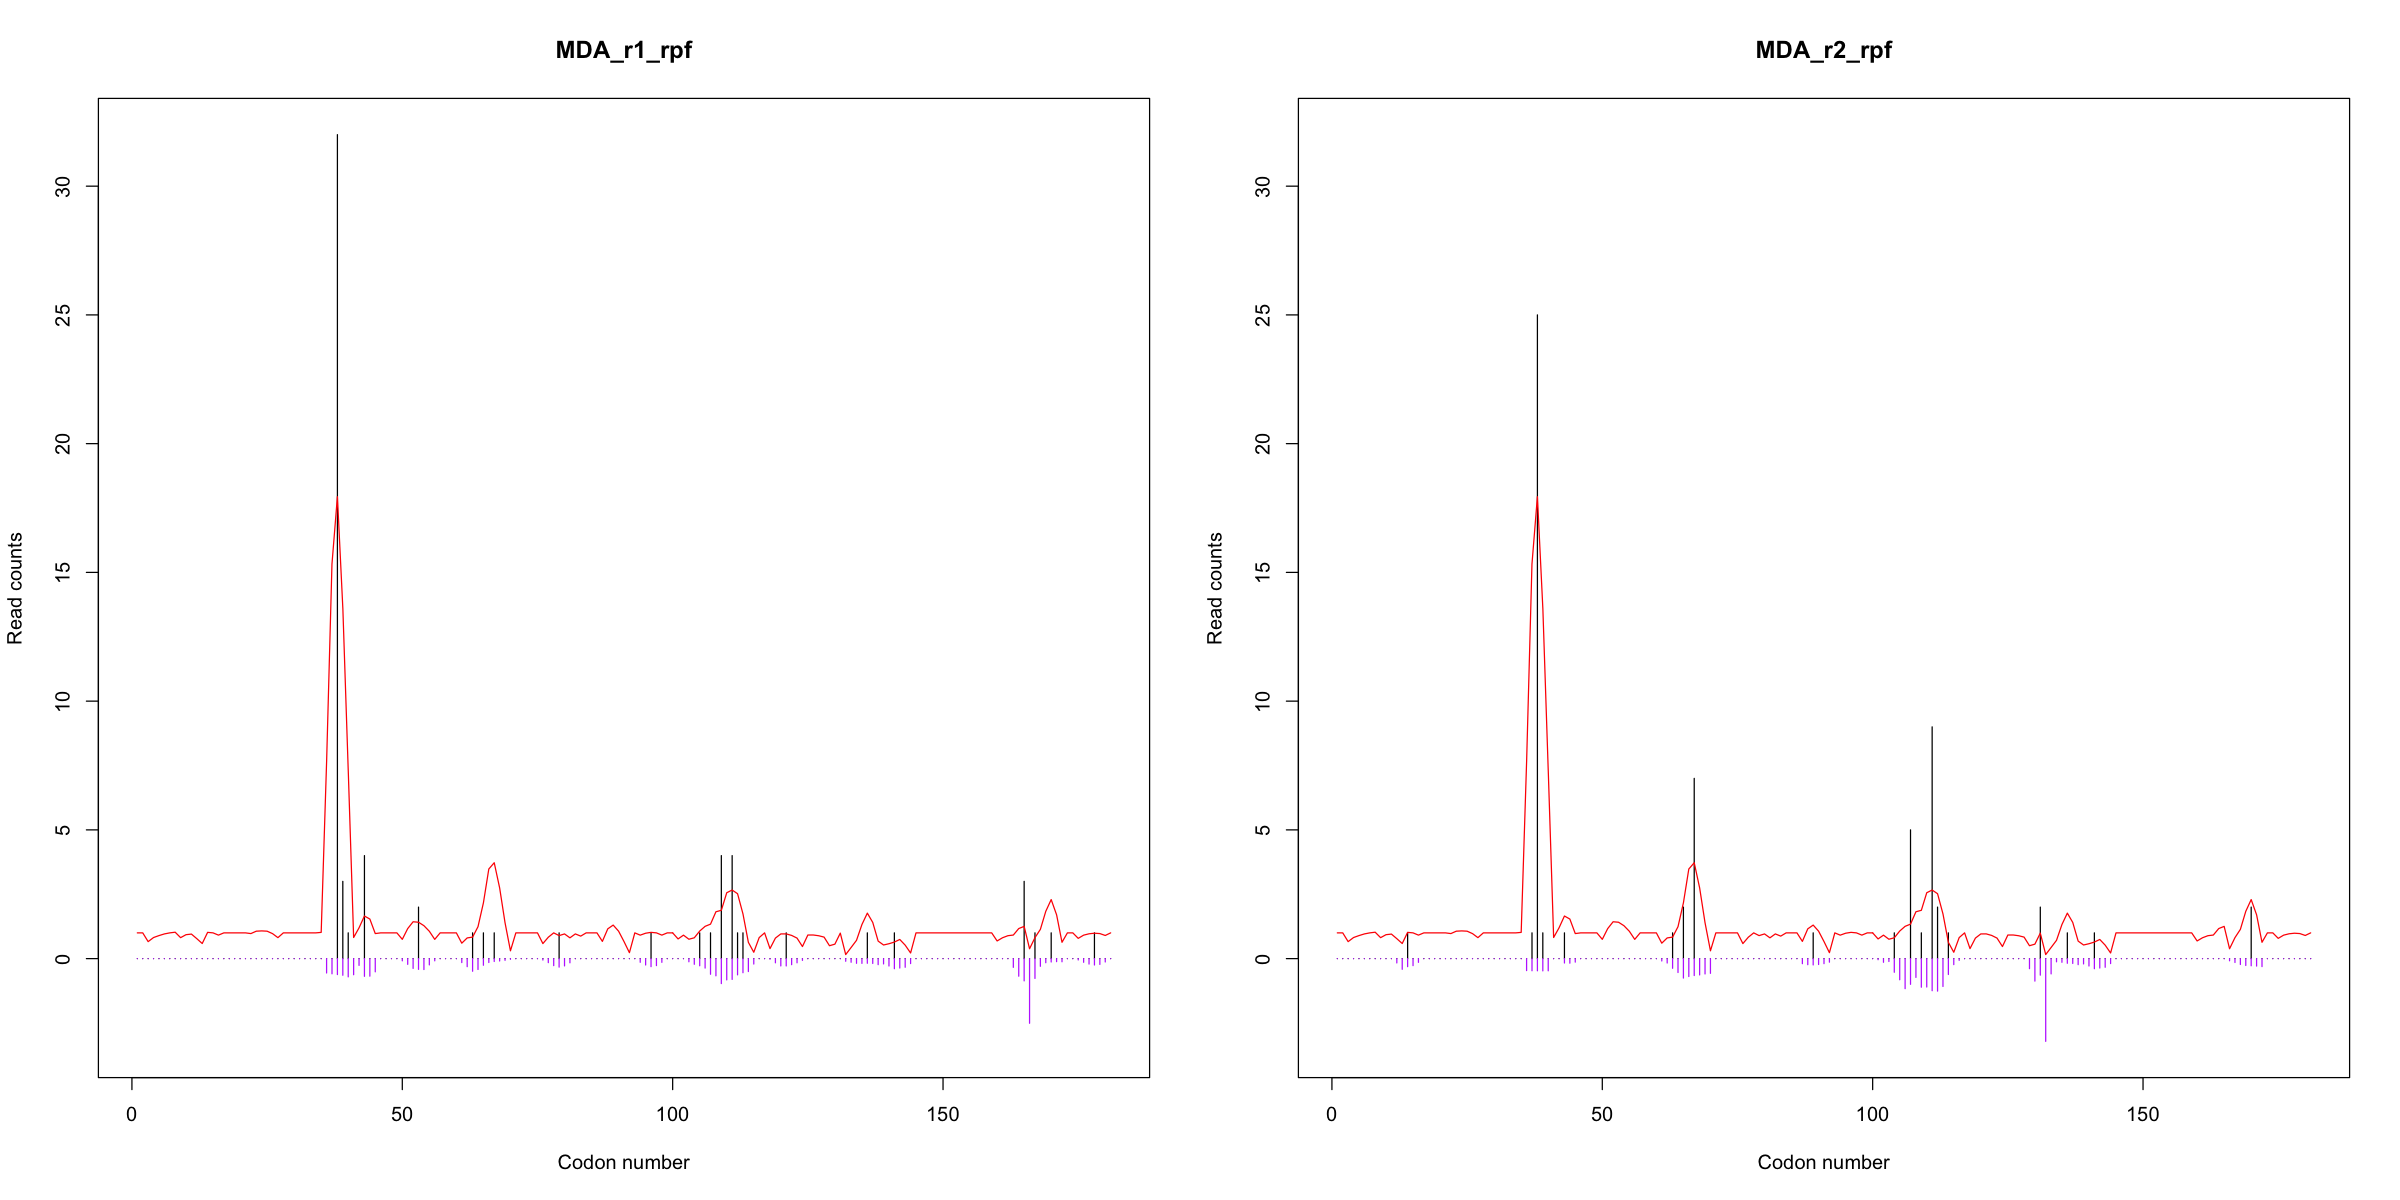

In [31]:
options(repr.plot.width = 20, repr.plot.height = 10)
Ribolog::visualize_CELP(tr_codon_bias_coeff_loess_corrected_count$tr_codon_read_count_loess_corrected, 
                        transcript = "ENST00000000233", panel_rows = 1, panel_cols = 2)

- Specify an outfile to save it as a PDF

In [32]:
Ribolog::visualize_CELP(tr_codon_bias_coeff_loess_corrected_count$tr_codon_read_count_loess_corrected, 
                        transcript = "ENST00000000233", panel_rows = 2, panel_cols = 4, 
                        outfile='ENST00000000233.CELP.bias.plots.pdf')

[1] "PDF (ENST00000000233.CELP.bias.plots.pdf) created and saved"

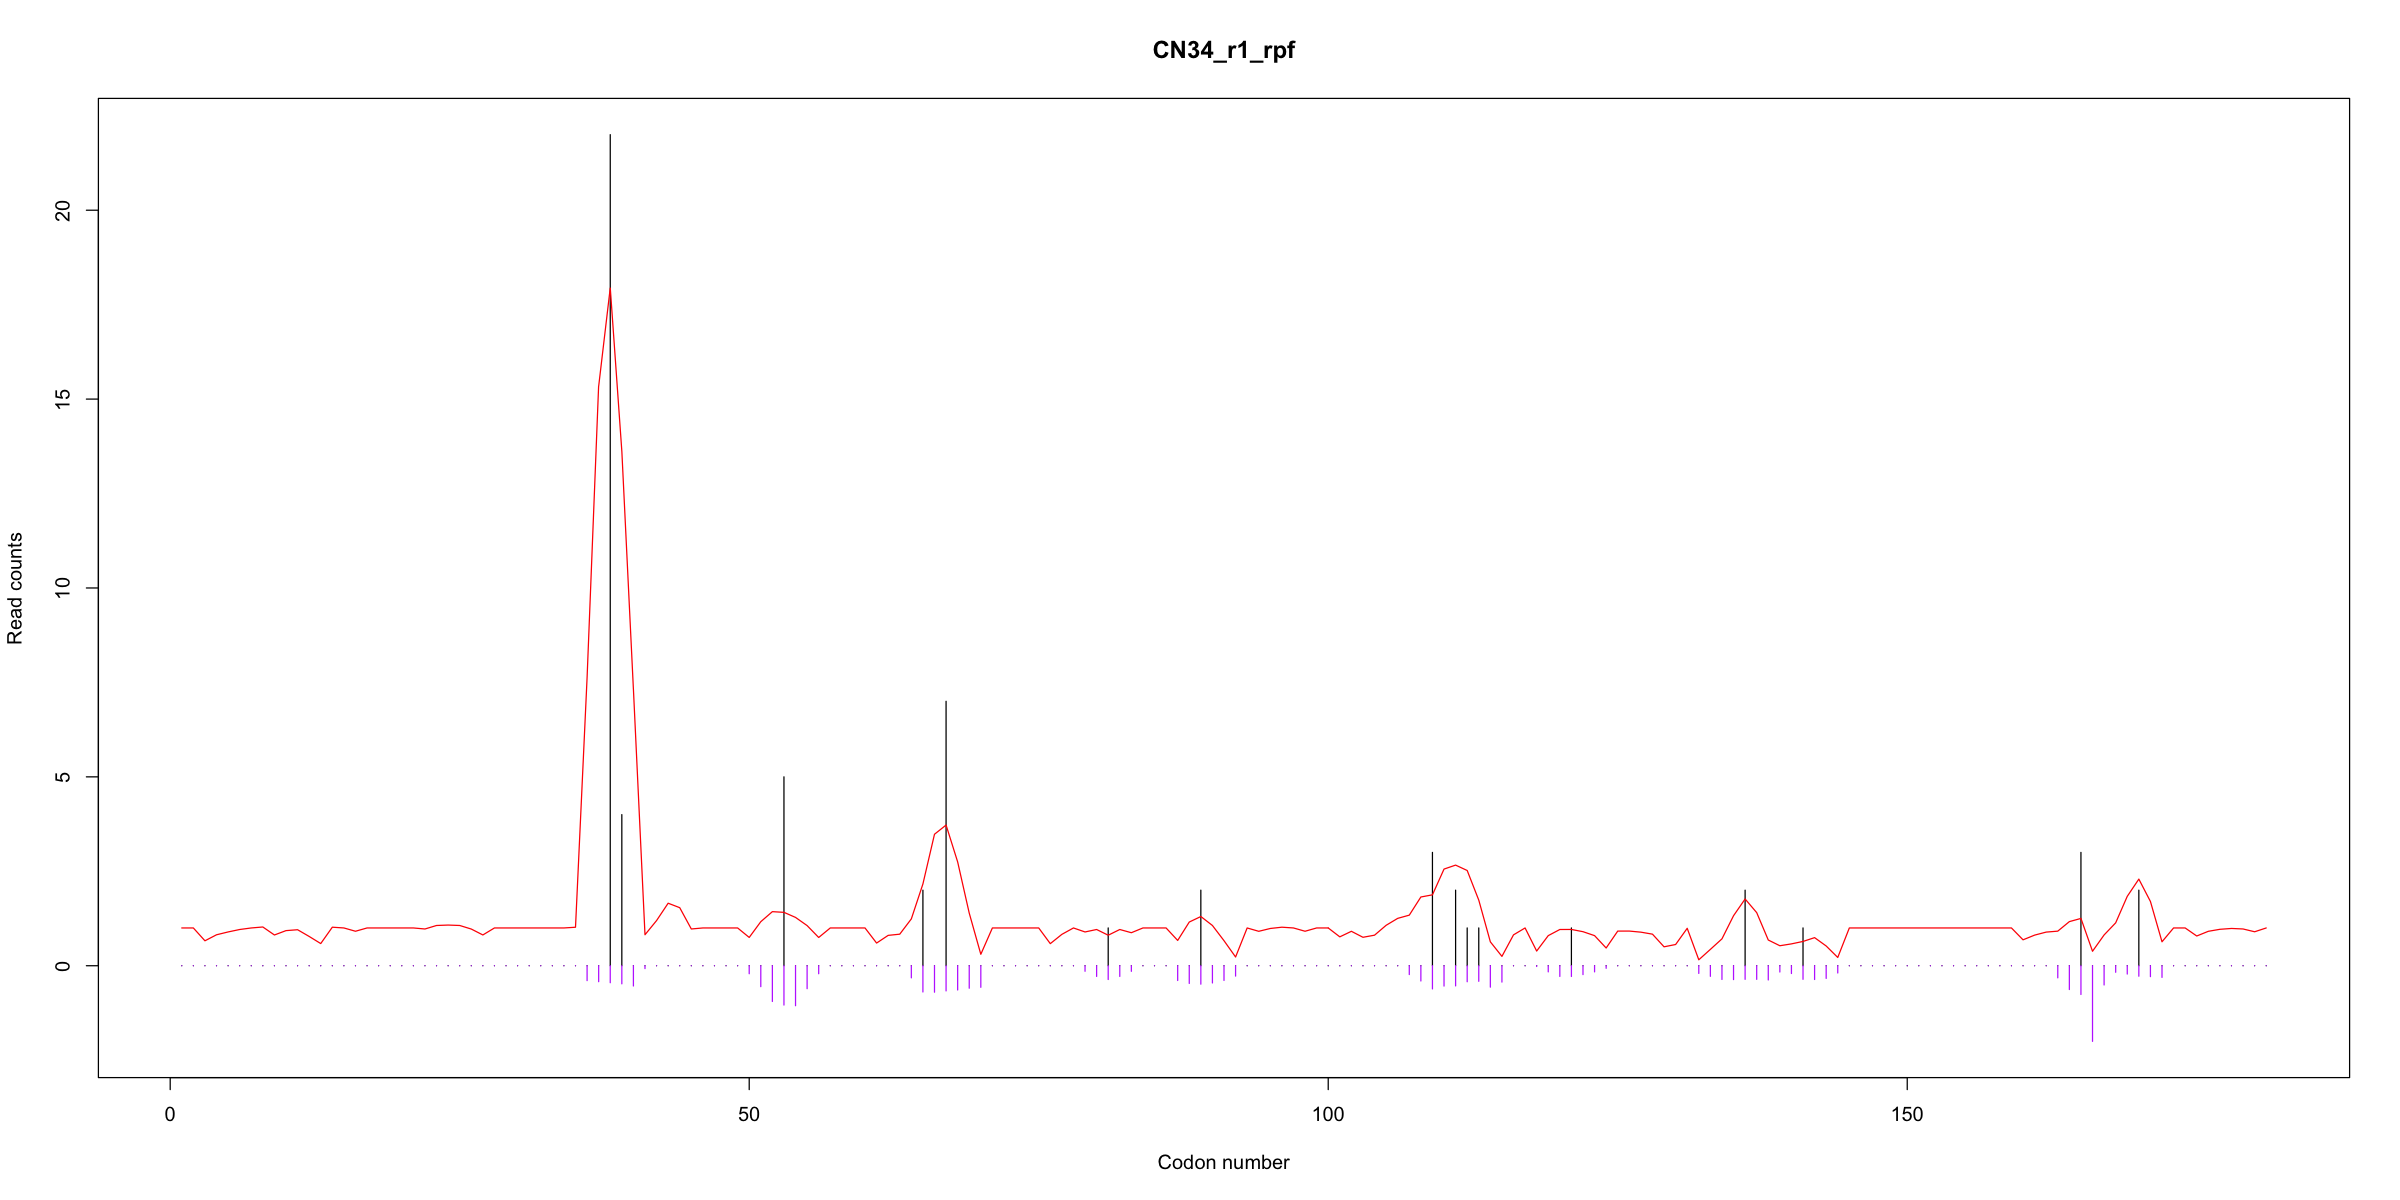

In [33]:
Ribolog::visualize_CELP(tr_codon_bias_coeff_loess_corrected_count$tr_codon_read_count_loess_corrected["CN34_r1_rpf"], 
                        transcript = "ENST00000000233", panel_rows = 1, panel_cols = 1)

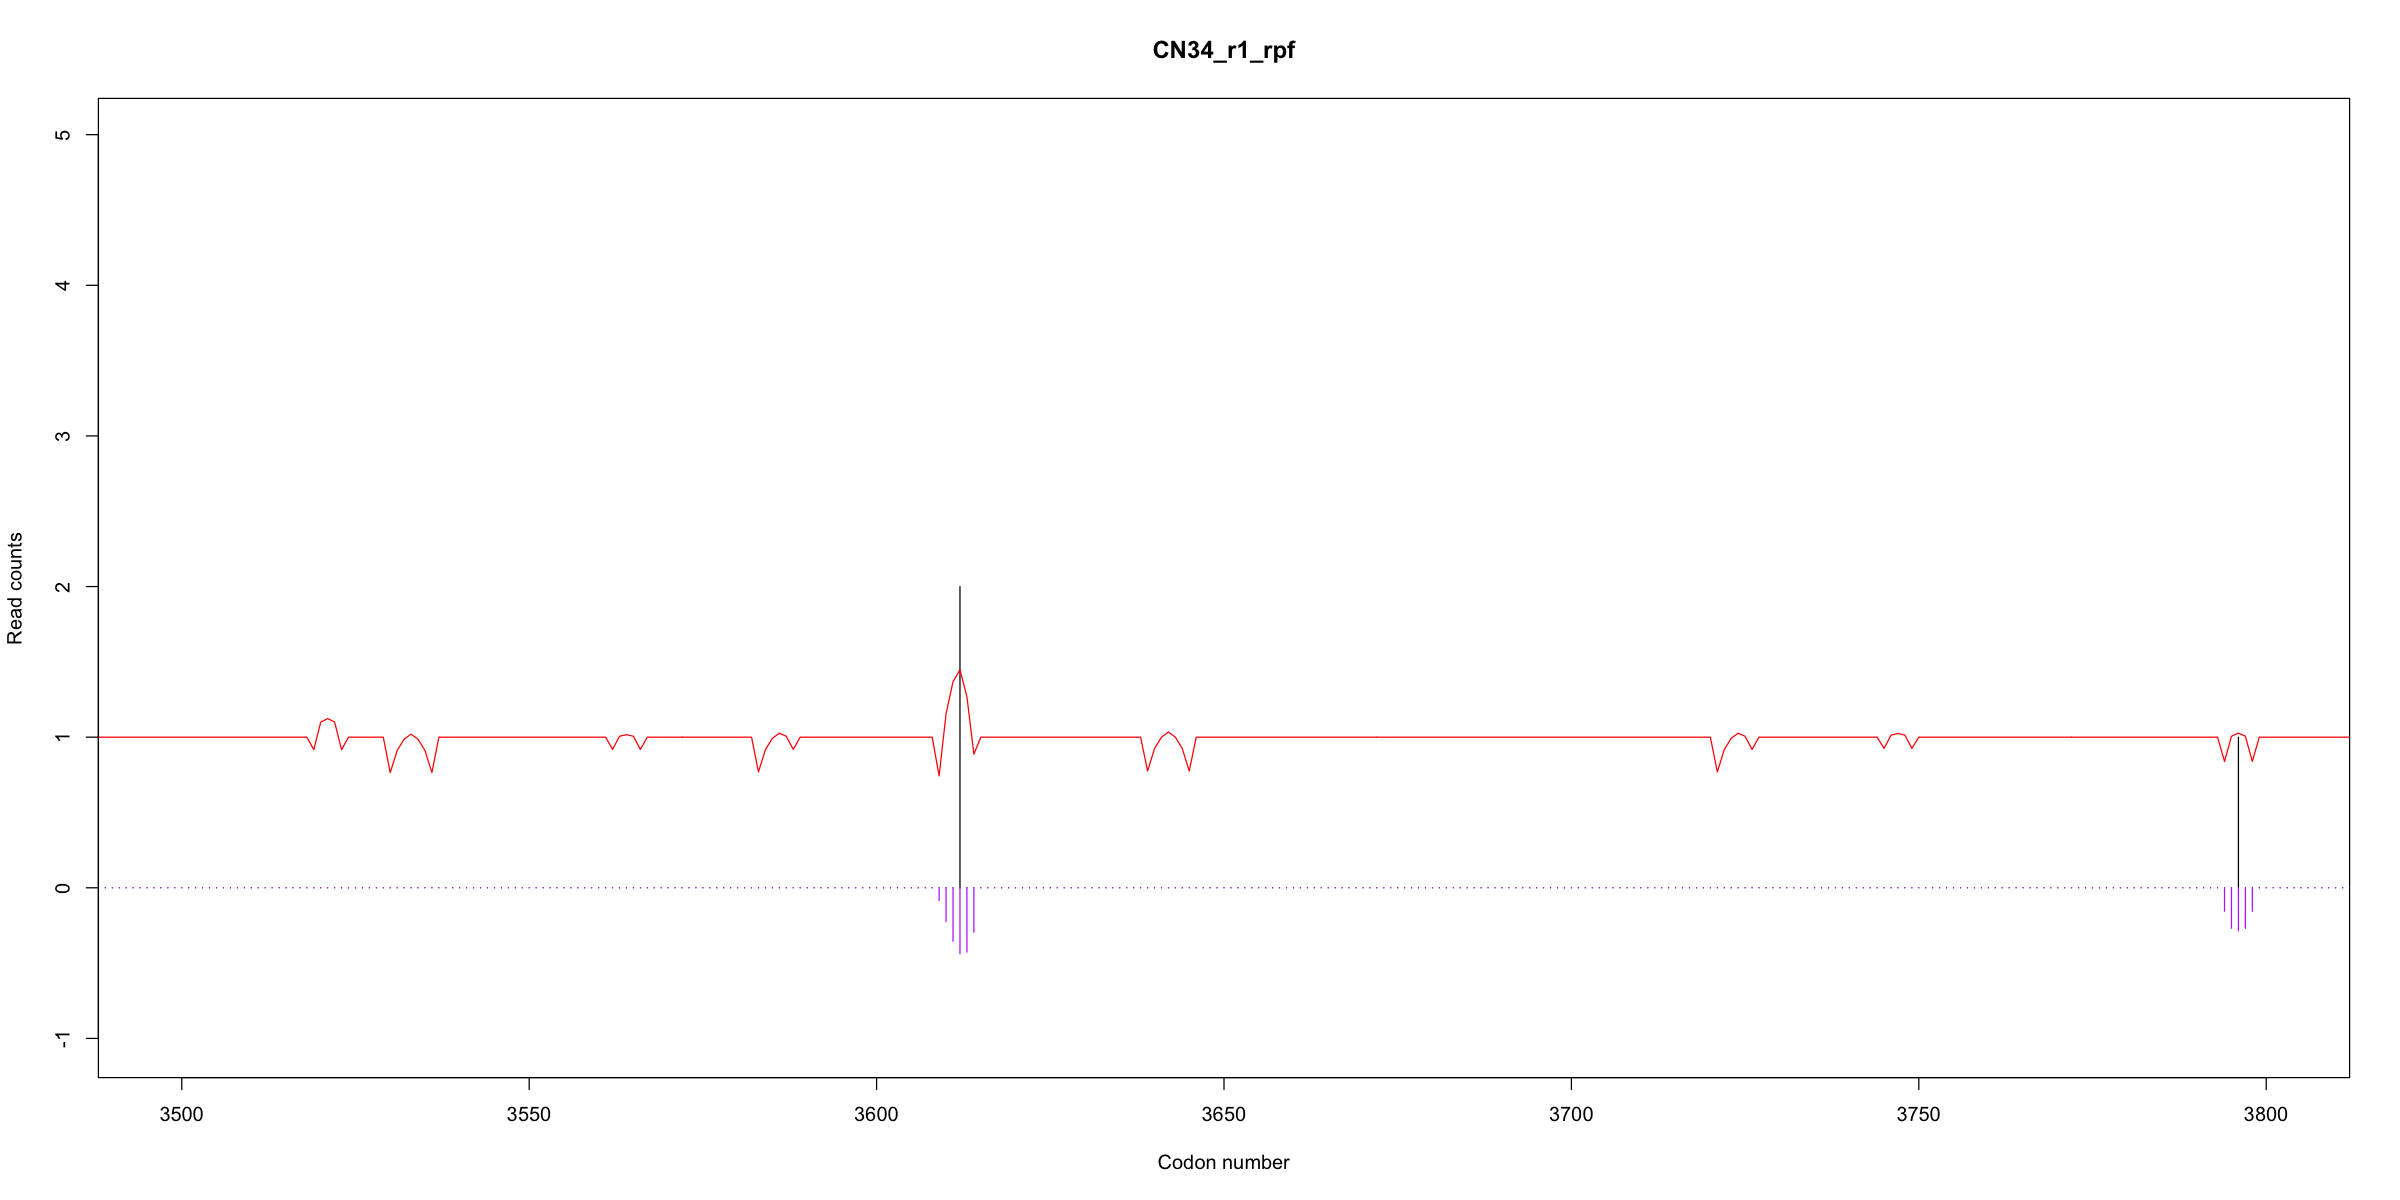

In [34]:
Ribolog::visualize_CELP(tr_codon_bias_coeff_loess_corrected_count$tr_codon_read_count_loess_corrected["CN34_r1_rpf"], 
                        transcript = "ENST00000367255", from_codon = 3500, to_codon = 3800)

# Generate transcript read counts

- Observed or corrected codon read counts are summed up to produce transcript read counts. The analysis of translational efficiency is usually performed at transcript level.
- The expected execution time for the observed counts is ~5 seconds / bam file.
- The expected execution time for the corrected counts is ~5 seconds / bam file.

In [35]:
rpf_observed_sum <- Ribolog::codon2transcript(
    tr_codon_bias_coeff_loess_corrected_count$tr_codon_read_count_loess_corrected, count_type = "observed_count" ) 

head(rpf_observed_sum)

transcript      CN34_r1_rpf CN34_r2_rpf LM1a_r1_rpf LM1a_r2_rpf LM2_r1_rpf
1 ENST00000000233 59          72          38          26          43        
2 ENST00000000412 27          25          10           5          12        
3 ENST00000000442  5           4           3           1           5        
4 ENST00000001008 63          80          43          35          46        
5 ENST00000001146  1           0           0           0           0        
6 ENST00000002125 12           6           0           1           1        
  LM2_r2_rpf MDA_r1_rpf MDA_r2_rpf
1 33         68         65        
2  8         18         11        
3  2          2          1        
4 53         62         71        
5  0          0          0        
6  3          8          4

In [36]:
rpf_corrected_sum <- Ribolog::codon2transcript(tr_codon_bias_coeff_loess_corrected_count$tr_codon_read_count_loess_corrected
                                               ,count_type = "corrected_count")
head(rpf_corrected_sum)

transcript      CN34_r1_rpf CN34_r2_rpf LM1a_r1_rpf LM1a_r2_rpf LM2_r1_rpf
1 ENST00000000233 29.620808   37.832658   19.419425   11.106498   20.760858 
2 ENST00000000412 23.311227   22.147628    7.897878    4.354626   10.583760 
3 ENST00000000442  5.435850    4.418465    3.073327    1.158425    5.144286 
4 ENST00000001008 47.313597   58.978200   28.496349   25.805623   33.744009 
5 ENST00000001146  1.065206    0.000000    0.000000    0.000000    0.000000 
6 ENST00000002125  9.467820    4.740507    0.000000    1.048674    1.048674 
  LM2_r2_rpf MDA_r1_rpf MDA_r2_rpf
1 18.643841  30.070440  31.615904 
2  5.120967  18.795538   9.158367 
3  2.359402   1.982035   1.158708 
4 42.835062  41.136821  46.373173 
5  0.000000   0.000000   0.000000 
6  2.707344   5.943634   2.966575

# Ribolog Module 2

The PREP module includes functions to import, merge and normalize RNA and RPF data. The resulting data set will be ready to be passed on to module 3 for quality control or module 4 for analysis of differential translational efficiency.

- The step below converts specific rna and rpf bam files into counts.
- The average run time is ~12 seconds/bam file.

Create the RNA counts data frame using the bam2count function. Then, merge with the corrected RPF counts data frame produced by the codon2transcript function (covered in module 1).

In [37]:
rna_count <- Ribolog::bam2count(bamfolder='~/Downloads/bam_files/rna', annotation = annotation) 
rpf_count <- Ribolog::bam2count(bamfolder='~/Downloads/bam_files/rpf', annotation = annotation)

In [38]:
rna_rpf_count <- merge(rna_count, rpf_count, by = "transcript")
head(rna_rpf_count)

transcript      CN34_r1_rna CN34_r2_rna LM1a_r1_rna LM1a_r2_rna LM2_r1_rna
1 ENST00000000233  389         386         421         690         456      
2 ENST00000000412 1833        1812        2393        3550        2493      
3 ENST00000000442  734         721         760        1181         803      
4 ENST00000001008 1741        1602        2032        2965        2094      
5 ENST00000001146   77          73          38          94          62      
6 ENST00000002125  138         132         143         230         176      
  LM2_r2_rna MDA_r1_rna MDA_r2_rna CN34_r1_rpf CN34_r2_rpf LM1a_r1_rpf
1  882        820        756       742         676         307        
2 5121       2772       2593       317         250         119        
3 1489       1432       1402        98          80          42        
4 4214       2606       2478       936         867         582        
5  148         71         61        17          11          15        
6  344        282        233        58          37           9        
  LM1a_r2_rpf LM2_r1_rpf LM2_r2_rpf MDA_r1_rpf MDA_r2_rpf
1 254         338        322        598        564       
2 104         135        118        246        213       
3  41          51         37         76         56       
4 479         576        605        748        702       
5   9           8          9         14          5       
6  14          16         19         30         24

- Merge the RNA counts with the corrected RPF counts data frame produced by the codon2transcript function (covered in module 1).

In [39]:
rna_CELP_rpf_count <- merge(rna_count, rpf_corrected_sum, by = "transcript") 
head(rna_CELP_rpf_count)

transcript      CN34_r1_rna CN34_r2_rna LM1a_r1_rna LM1a_r2_rna LM2_r1_rna
1 ENST00000000233  389         386         421         690         456      
2 ENST00000000412 1833        1812        2393        3550        2493      
3 ENST00000000442  734         721         760        1181         803      
4 ENST00000001008 1741        1602        2032        2965        2094      
5 ENST00000001146   77          73          38          94          62      
6 ENST00000002125  138         132         143         230         176      
  LM2_r2_rna MDA_r1_rna MDA_r2_rna CN34_r1_rpf CN34_r2_rpf LM1a_r1_rpf
1  882        820        756       29.620808   37.832658   19.419425  
2 5121       2772       2593       23.311227   22.147628    7.897878  
3 1489       1432       1402        5.435850    4.418465    3.073327  
4 4214       2606       2478       47.313597   58.978200   28.496349  
5  148         71         61        1.065206    0.000000    0.000000  
6  344        282        233        9.467820    4.740507    0.000000  
  LM1a_r2_rpf LM2_r1_rpf LM2_r2_rpf MDA_r1_rpf MDA_r2_rpf
1 11.106498   20.760858  18.643841  30.070440  31.615904 
2  4.354626   10.583760   5.120967  18.795538   9.158367 
3  1.158425    5.144286   2.359402   1.982035   1.158708 
4 25.805623   33.744009  42.835062  41.136821  46.373173 
5  0.000000    0.000000   0.000000   0.000000   0.000000 
6  1.048674    1.048674   2.707344   5.943634   2.966575

### Normalize counts for library size variation

By default, we ue the median-of-ratios method for library size normalization. Users can normalize their data in any other way they prefer outside Ribolog and pass on the result to modules 3 and 4. RNA data and RPF data must be normalized separately. The normalize_median_of_ratios function allows specification of data columns, and thus, indepedent normalization of RPF and RNA columns in a mixed RNA-RPF data set.

- The normalize_median_of_ratios function allows specification of data columns, and thus, indepedent normalization of RPF and RNA columns in a mixed RNA-RPF data set.

In [40]:
rna_CELP_rpf_count_norm1 <- Ribolog::normalize_median_of_ratios(rna_CELP_rpf_count, 
                                                                data_columns = c(2:9) )
rna_CELP_rpf_count_norm2 <- Ribolog::normalize_median_of_ratios(rna_CELP_rpf_count_norm1, 
                                                                data_columns = c(10:17) )

[1] "Normalization factors:"
CN34_r1_rna CN34_r2_rna LM1a_r1_rna LM1a_r2_rna  LM2_r1_rna  LM2_r2_rna 
  0.7189533   0.6954465   0.8659613   1.2839253   0.8758954   1.7806691 
 MDA_r1_rna  MDA_r2_rna 
  1.2157170   1.1546839 
[1] "Normalization factors:"
CN34_r1_rpf CN34_r2_rpf LM1a_r1_rpf LM1a_r2_rpf  LM2_r1_rpf  LM2_r2_rpf 
  2.1861764   1.8892305   0.8461406   0.8052773   0.9660116   1.0466492 
 MDA_r1_rpf  MDA_r2_rpf 
  1.7049952   1.3589465 


- Renaming for easy further execution

In [41]:
rr <- rna_CELP_rpf_count_norm2

In [42]:
head(rr)

transcript      CN34_r1_rna CN34_r2_rna LM1a_r1_rna LM1a_r2_rna LM2_r1_rna
1 ENST00000000233  541.0644    555.0391    486.16490   537.41444   520.61012
2 ENST00000000412 2549.5398   2605.5204   2763.40287  2764.95833  2846.23034
3 ENST00000000442 1020.9286   1036.7441    877.63735   919.83543   916.77616
4 ENST00000001008 2421.5760   2303.5561   2346.52513  2309.32435  2390.69648
5 ENST00000001146  107.1001    104.9685     43.88187    73.21298    70.78471
6 ENST00000002125  191.9457    189.8061    165.13440   179.13815   200.93724
  LM2_r2_rna MDA_r1_rna MDA_r2_rna CN34_r1_rpf CN34_r2_rpf LM1a_r1_rpf
1  495.31943  674.49909  654.72466 13.5491390  20.025433   22.950590  
2 2875.88526 2280.13596 2245.63631 10.6630127  11.723095    9.334002  
3  836.20253 1177.90573 1214.18515  2.4864645   2.338764    3.632171  
4 2366.52617 2143.59102 2146.04195 21.6421683  31.218108   33.678031  
5   83.11483   58.40175   52.82831  0.4872461   0.000000    0.000000  
6  193.18581  231.96188  201.78683  4.3307669   2.509226    0.000000  
  LM1a_r2_rpf LM2_r1_rpf LM2_r2_rpf MDA_r1_rpf MDA_r2_rpf
1 13.792141   21.491312  17.812884  17.636671  23.2650103
2  5.407611   10.956141   4.892725  11.023807   6.7393139
3  1.438542    5.325283   2.254244   1.162487   0.8526514
4 32.045636   34.931266  40.925902  24.127236  34.1243562
5  0.000000    0.000000   0.000000   0.000000   0.0000000
6  1.302252    1.085571   2.586678   3.486012   2.1829959

# Module 3: QC of Ribosome Profiling Data

The QC module includes functions to check the quality of ribosome profiling data focusing mainly on the reproducibility of translational efficiency (TE) among replicates. Tools for general QC of sequencing data (e.g. FASTQC) or 3-base periodicity of ribo-seq libraries (borrowed from the riboWaltz package and covered in module 1) are not repeated here.

A minimum read count cutoff is usually applied to sequencing data to remove extremely low count features which would yield unreliable results. To demonstrate, we filter our dataset to keep only transcripts with RNA>=5 in all samples and average RPF>=2 across samples. This can be done using the min_count_filter function. You can choose methods between “all” or “average” and apply different cutoffs until you find a value setting that produces acceptable output in terms of replicate consistency.

### Filter out low count transcripts

In [43]:
rr.v1 <- Ribolog::min_count_filter(rr, mincount = 5, columns = c(2:9), method = "all")

In [44]:
rr.v2 <- Ribolog::min_count_filter(rr.v1, mincount = 2, columns = c(10:17), method = "average")

- Checking the dimensions of the filtered counts

In [45]:
dim(rr)

[1] 18897    17

In [46]:
dim(rr.v1)

[1] 11991    17

In [47]:
dim(rr.v2)

[1] 7468   17

In [48]:
head(rr.v2)

transcript      CN34_r1_rna CN34_r2_rna LM1a_r1_rna LM1a_r2_rna LM2_r1_rna
1 ENST00000000233  541.0644    555.0391    486.1649    537.4144    520.6101 
2 ENST00000000412 2549.5398   2605.5204   2763.4029   2764.9583   2846.2303 
3 ENST00000000442 1020.9286   1036.7441    877.6374    919.8354    916.7762 
4 ENST00000001008 2421.5760   2303.5561   2346.5251   2309.3244   2390.6965 
6 ENST00000002125  191.9457    189.8061    165.1344    179.1381    200.9372 
7 ENST00000002165 1944.4935   2050.4813   1503.5314   1474.3848   1578.9557 
  LM2_r2_rna MDA_r1_rna MDA_r2_rna CN34_r1_rpf CN34_r2_rpf LM1a_r1_rpf
1  495.3194   674.4991   654.7247  13.549139   20.025433   22.950590  
2 2875.8853  2280.1360  2245.6363  10.663013   11.723095    9.334002  
3  836.2025  1177.9057  1214.1852   2.486465    2.338764    3.632171  
4 2366.5262  2143.5910  2146.0419  21.642168   31.218108   33.678031  
6  193.1858   231.9619   201.7868   4.330767    2.509226    0.000000  
7 1452.2631  1501.1718  1592.6437   6.250518   11.111712   16.924470  
  LM1a_r2_rpf LM2_r1_rpf LM2_r2_rpf MDA_r1_rpf MDA_r2_rpf
1 13.792141   21.491312  17.812884  17.636671  23.2650103
2  5.407611   10.956141   4.892725  11.023807   6.7393139
3  1.438542    5.325283   2.254244   1.162487   0.8526514
4 32.045636   34.931266  40.925902  24.127236  34.1243562
6  1.302252    1.085571   2.586678   3.486012   2.1829959
7  7.435588    9.073144   5.731499  11.594319  11.9387311

### Standardize the data

- PCA is a statistical procedure that decomposes the total variance in data to several orthogonal (not linearly correlated) components. The variance in a transcript x sample matrix of read counts originates not only from differences among samples, but also from differences of (mean) counts across transcripts (there is also an interaction term but we will not deal with that just now). The output of PCA is sensitive to the scale of input numbers. If PCA is performed on the raw RNA counts, the pattern will be driven disproportionately by highly expressed genes. The same is true about RPF counts or TE values and highly translated transcripts. It is therefore customary in some applications to center or standardize the data before performing the PCA. Centering the data means subtracting the row mean or column mean from each element. Standardization means dividing the centered data by the corresponding row or column standard deviation. The choice of row- or column- standardization depends on the data type and structure, and the aim of the study. We perform PCA to visualize similarities and distances among samples. Row centering will bring the mean count for each transcript to zero which means that the differences in the average read counts of transctipts will not be incorporated into the total variance. Row standardization accomplishes the same goal but also guranatees that each transcript adds exactly one unit of variance to the variance of the transcript x sample matrix. Thus, all transctipts contribute equally to the PCA pattern.

- First, we need to create a TE data set by dividing RPF columns by their RNA counterparts from the same sample. This is done using the create-te function:

In [49]:
te.v2 <- Ribolog::create_te(rr.v2, idcolumns = 1, rnacolumns = c(2:9), rpfcolumns = c(10:17))
head(te.v2)

transcript      CN34_r1_te  CN34_r2_te  LM1a_r1_te  LM1a_r2_te  LM2_r1_te  
1 ENST00000000233 0.025041640 0.036079318 0.047207418 0.025663882 0.041281011
2 ENST00000000412 0.004182328 0.004499330 0.003377720 0.001955766 0.003849351
3 ENST00000000442 0.002435493 0.002255874 0.004138579 0.001563913 0.005808706
4 ENST00000001008 0.008937225 0.013552137 0.014352299 0.013876628 0.014611334
6 ENST00000002125 0.022562457 0.013219944 0.000000000 0.007269540 0.005402536
7 ENST00000002165 0.003214471 0.005419075 0.011256480 0.005043180 0.005746294
  LM2_r2_te   MDA_r1_te    MDA_r2_te   
1 0.035962418 0.0261478058 0.0355340368
2 0.001701294 0.0048347147 0.0030010710
3 0.002695811 0.0009869103 0.0007022416
4 0.017293661 0.0112555219 0.0159010667
6 0.013389584 0.0150283843 0.0108183268
7 0.003946598 0.0077235129 0.0074961719

In [50]:
te.v2.cent <- Ribolog::row_center(te.v2, columns = c(2:9)) 
te.v2.stnd <- Ribolog::row_standardize(te.v2, columns = c(2:9))

### Creating the PCA Plots

Only the numerical part of the data set is fed into the pca_qc function which means that the ID column(s) must be manually excluded. The argument n specifies the number of PCs to be plotted. Below, we compare the PCA pattern from the original, low-count removed, row-centered and row-standardized datasets:

- First load the metadata (attributes) of all your samples

In [51]:
sample_attributes <- read.csv("~/Downloads/Ribolog/data-raw/sample_attributes_LMCN.csv", header = TRUE, 
                              stringsAsFactors=TRUE)

In [52]:
sample_attributes

sample_name read_type lung_metastasis cell_line replicate_no replicate_name
1  CN34_r1_rna RNA       N               CN34      1            CN34_r1       
2  CN34_r2_rna RNA       N               CN34      2            CN34_r2       
3  LM1a_r1_rna RNA       Y               LM1a      1            LM1a_r1       
4  LM1a_r2_rna RNA       Y               LM1a      2            LM1a_r2       
5  LM2_r1_rna  RNA       Y               LM2       1            LM2_r1        
6  LM2_r2_rna  RNA       Y               LM2       2            LM2_r2        
7  MDA_r1_rna  RNA       N               MDA       1            MDA_r1        
8  MDA_r2_rna  RNA       N               MDA       2            MDA_r2        
9  CN34_r1_rpf RPF       N               CN34      1            CN34_r1       
10 CN34_r2_rpf RPF       N               CN34      2            CN34_r2       
11 LM1a_r1_rpf RPF       Y               LM1a      1            LM1a_r1       
12 LM1a_r2_rpf RPF       Y               LM1a      2            LM1a_r2       
13 LM2_r1_rpf  RPF       Y               LM2       1            LM2_r1        
14 LM2_r2_rpf  RPF       Y               LM2       2            LM2_r2        
15 MDA_r1_rpf  RPF       N               MDA       1            MDA_r1        
16 MDA_r2_rpf  RPF       N               MDA       2            MDA_r2        
   cell_line_origin
1  CN34            
2  CN34            
3  CN34            
4  CN34            
5  MDA             
6  MDA             
7  MDA             
8  MDA             
9  CN34            
10 CN34            
11 CN34            
12 CN34            
13 MDA             
14 MDA             
15 MDA             
16 MDA

In [53]:
te <- Ribolog::create_te(rr, idcolumns = 1, rnacolumns = c(2:9), rpfcolumns = c(10:17))
te.fin <- te[is.finite(rowSums(te[, -1])), ]

Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     0.07945 0.0412 0.03245 0.02812 0.02389 0.02069 0.01847
Proportion of Variance 0.54962 0.1478 0.09171 0.06884 0.04971 0.03727 0.02969
Cumulative Proportion  0.54962 0.6974 0.78914 0.85799 0.90770 0.94497 0.97466
                           PC8
Standard deviation     0.01706
Proportion of Variance 0.02534
Cumulative Proportion  1.00000


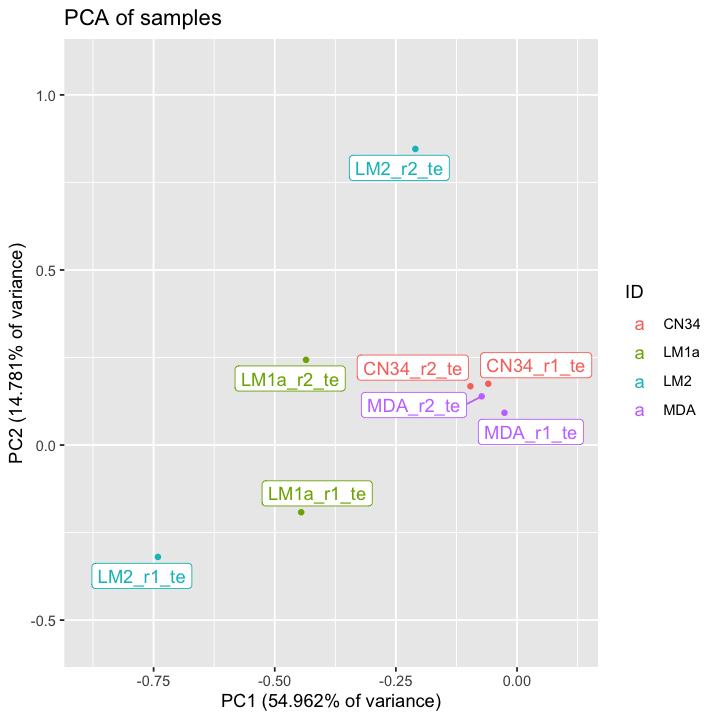

In [54]:
options(repr.plot.width = 6, repr.plot.height = 6)
Ribolog::pca_qc(te.fin[, -1], n = 2, ID = sample_attributes$cell_line[c(1:8)])

### PCA of filtered counts

Importance of components:
                           PC1     PC2     PC3      PC4      PC5      PC6
Standard deviation     0.03727 0.01545 0.01102 0.009677 0.008418 0.006829
Proportion of Variance 0.69001 0.11864 0.06029 0.046520 0.035200 0.023170
Cumulative Proportion  0.69001 0.80865 0.86895 0.915470 0.950670 0.973840
                            PC7     PC8
Standard deviation     0.005512 0.00472
Proportion of Variance 0.015090 0.01107
Cumulative Proportion  0.988930 1.00000


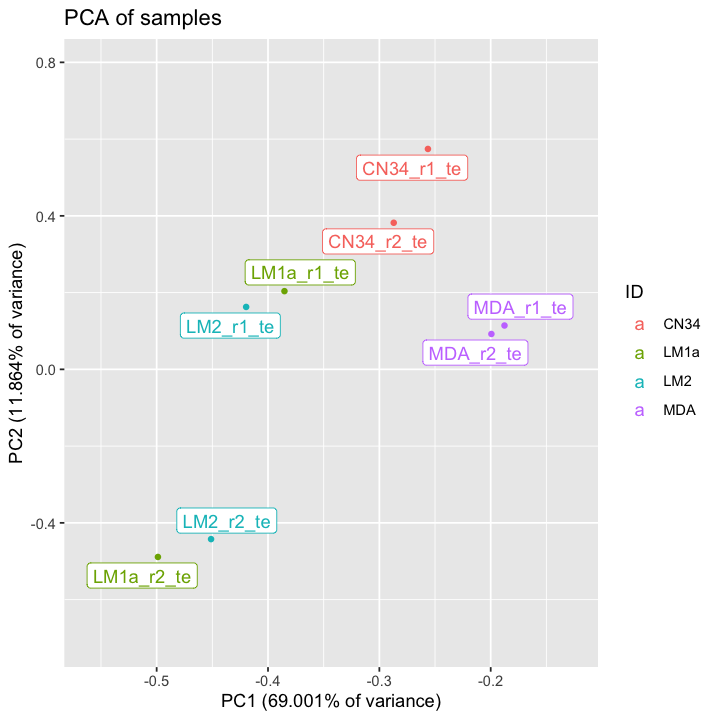

In [55]:
Ribolog::pca_qc(te.v2[, -1], n = 2, ID = sample_attributes$cell_line[c(1:8)])

- Low count transcripts filtered out, data row-centered.

Importance of components:
                           PC1    PC2     PC3      PC4      PC5      PC6
Standard deviation     0.01772 0.0120 0.01059 0.008473 0.007004 0.005599
Proportion of Variance 0.42103 0.1933 0.15051 0.096310 0.065810 0.042050
Cumulative Proportion  0.42103 0.6144 0.76487 0.861180 0.926990 0.969040
                            PC7       PC8
Standard deviation     0.004804 3.622e-18
Proportion of Variance 0.030960 0.000e+00
Cumulative Proportion  1.000000 1.000e+00


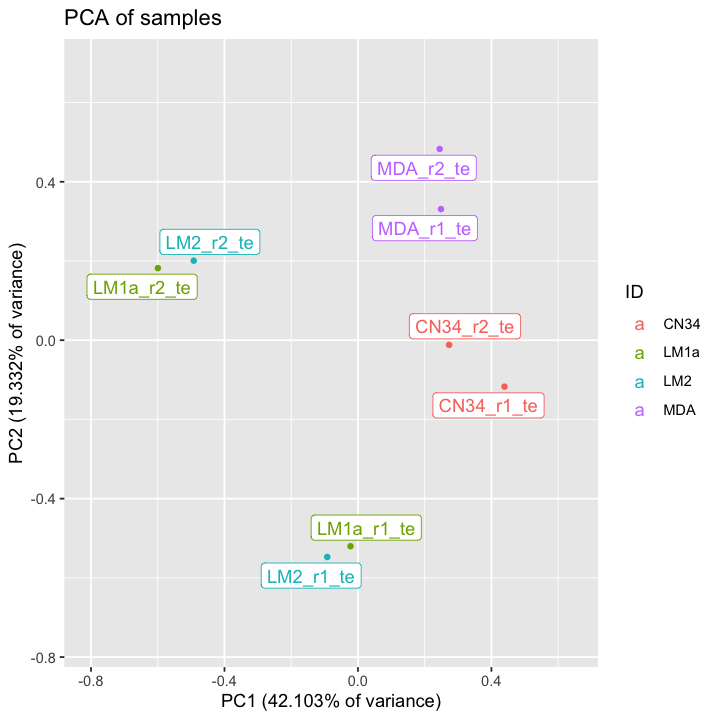

In [56]:
Ribolog::pca_qc(te.v2.cent[, -1], n = 2, ID = sample_attributes$cell_line[c(1:8)])

- Low count transcripts filtered out, data row-standardized

Importance of components:
                          PC1    PC2    PC3    PC4    PC5    PC6     PC7
Standard deviation     1.2905 1.2237 0.9636 0.9103 0.9041 0.8843 0.68717
Proportion of Variance 0.2382 0.2142 0.1328 0.1185 0.1169 0.1118 0.06754
Cumulative Proportion  0.2382 0.4524 0.5852 0.7037 0.8206 0.9325 1.00000
                             PC8
Standard deviation     5.876e-16
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00


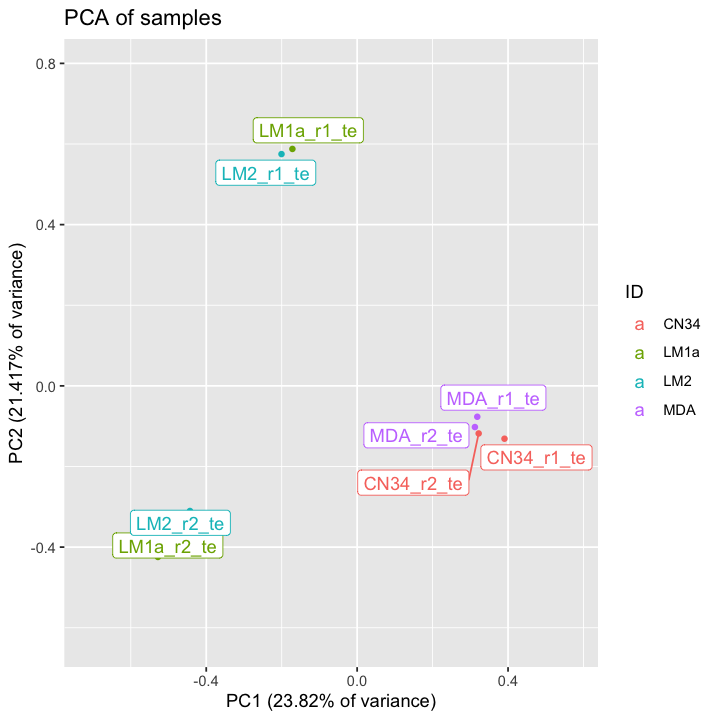

In [57]:
Ribolog::pca_qc(te.v2.stnd[, -1], n = 2, ID = sample_attributes$cell_line[c(1:8)])

### Repeating PCA on RNA and RPF counts

To further investigate why TE of the LM1a and LM2 reps seem somewhat mismacthed, we repeat the PCA on RNA and RPF data:

In [58]:
# Standardize RNA counts 
rr.v3 <- row_standardize(rr.v2, columns = c(2:9)) 
# Standardize RPF counts 
rr.v4 <- row_standardize(rr.v3, columns = c(10:17))

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.9013 1.5576 0.56854 0.45156 0.43063 0.35028 0.32231
Proportion of Variance 0.5179 0.3476 0.04631 0.02921 0.02657 0.01758 0.01488
Cumulative Proportion  0.5179 0.8655 0.91176 0.94097 0.96754 0.98512 1.00000
                             PC8
Standard deviation     1.647e-15
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00


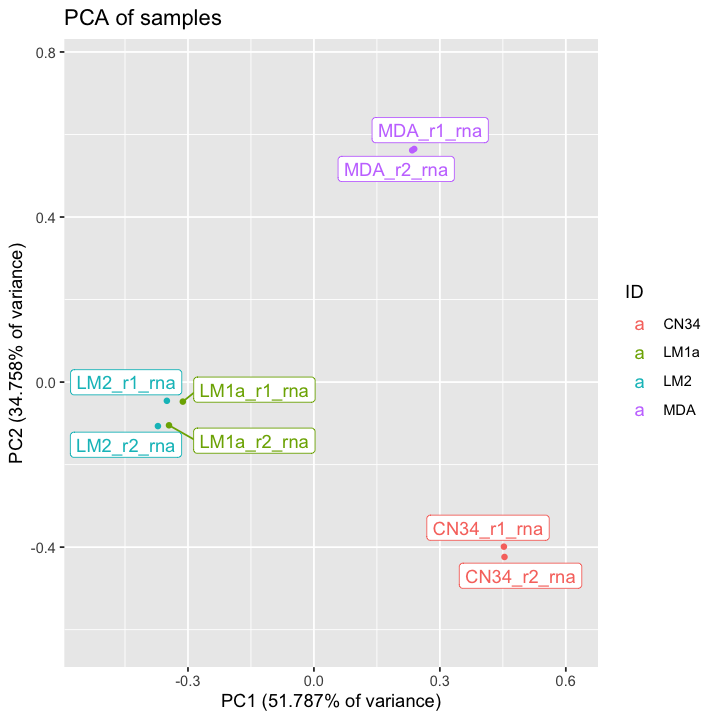

In [59]:
# PCA on RNA counts 
Ribolog::pca_qc(rr.v4[, c(2:9)], n = 2, ID = sample_attributes$cell_line[c(1:8)])

Importance of components:
                          PC1    PC2    PC3    PC4    PC5    PC6     PC7
Standard deviation     1.3487 1.2480 0.9314 0.9187 0.8996 0.8058 0.65426
Proportion of Variance 0.2608 0.2233 0.1244 0.1210 0.1160 0.0931 0.06137
Cumulative Proportion  0.2608 0.4841 0.6085 0.7295 0.8455 0.9386 1.00000
                             PC8
Standard deviation     5.507e-16
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00


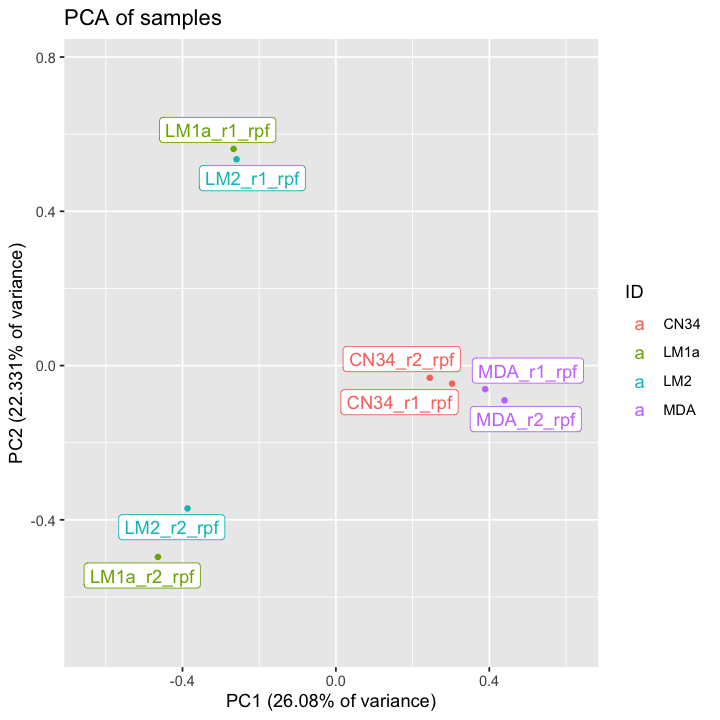

In [60]:
# PCA on RPF counts
Ribolog::pca_qc(rr.v4[, c(10:17)], n = 2, ID = sample_attributes$cell_line[c(9:16)])

PC1 separates the metastatic from non-metastatic lines in both RNA and RPF plots. Replicate consistency seems better for RNA compared to RPF which could be due to the larger RNA read counts in general. The mismatch between reps of the two metastatic cell lines appears to originate from their RPF counts.
The above analyses inform our next step (translational efficiency significance testing): There is a clear difference between metatstatic and non-metastatic lines, but the distinction within these groups is not as large or reliable. Therefore, the most biologically relevant analysis would be to compare TE between metastatic and non-metastatic groups.

### Convert the RNA-RPF data frame to a sample-by-sample list

- The data frame containing RNA and RPF read counts is split to a list based on the values of the parameter uniqueID. uniqueID is one of the variables in the design matrix which specifies the name of the experimental replicate from which one RNA library and one RPF libray was made. In the case of our LMCN data set, this role is served by the variable replicate_name:

In [61]:
rr.v2.split <- Ribolog::partition_to_uniques(x = rr.v2[, -1], 
                                             design = sample_attributes, 
                                             uniqueID = "replicate_name") 
names(rr.v2.split)

[1] "CN34_r1" "CN34_r2" "LM1a_r1" "LM1a_r2" "LM2_r1"  "LM2_r2"  "MDA_r1" 
[8] "MDA_r2"

In [62]:
print(rr.v2.split$CN34_r1[, c(1:10)])

            sample_name read_type lung_metastasis cell_line replicate_no
CN34_r1_rna CN34_r1_rna       RNA               N      CN34            1
CN34_r1_rpf CN34_r1_rpf       RPF               N      CN34            1
            replicate_name cell_line_origin         1          2           3
CN34_r1_rna        CN34_r1             CN34 541.06436 2549.53979 1020.928644
CN34_r1_rpf        CN34_r1             CN34  13.54914   10.66301    2.486465


In [63]:
names(rr.v2[, -1])

[1] "CN34_r1_rna" "CN34_r2_rna" "LM1a_r1_rna" "LM1a_r2_rna" "LM2_r1_rna" 
 [6] "LM2_r2_rna"  "MDA_r1_rna"  "MDA_r2_rna"  "CN34_r1_rpf" "CN34_r2_rpf"
[11] "LM1a_r1_rpf" "LM1a_r2_rpf" "LM2_r1_rpf"  "LM2_r2_rpf"  "MDA_r1_rpf" 
[16] "MDA_r2_rpf"

### Perform translational efficiency ratio (TER) tests on all pairs of samples

With n=8 samples (elements of the split list), C(n,2)=28 pairwise TER tests are performed. At this stage, we need an additional important argument groupID which -like uniqueID- is another variable or column from the design matrix. All samples having the same groupID are considered replicates of the same biological material. In the LMCN dataset, the most sensible choice for groupID is “cell_line” which takes four values “CN34”, “LM1a”, “LM2” or “MDA”.

- This step takes approximately 4 minutes per sample (each sample comprising of an r1 and r2 version)

In [64]:
rr.v2.pairwise <- Ribolog::TER_all_pairs(x = rr.v2.split, 
                                        design = sample_attributes, 
                                        outcome = "read_type", 
                                        uniqueID = "replicate_name", 
                                        groupID = "cell_line",
                                        adj_method = 'none')

In [65]:
str(rr.v2.pairwise$CN34_r1_vs_CN34_r2)

List of 4
 $ uniqueIDs: chr [1:2] "CN34_r1" "CN34_r2"
 $ groupIDs : chr [1:2] "CN34" "CN34"
 $ pair_type: chr "homo"
 $ fit      : num [1:7468, 1:8] -3.69 -5.48 -6.02 -4.72 -3.79 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:8] "Estimate_(Intercept)" "Std. Error_(Intercept)" "z value_(Intercept)" "Pr(>|z|)_(Intercept)" ...


### Estimate and plot the proportion of null features

We estimate the proportion of null features designated 𝜋0 from each one of the C(n,2) test p-value vectors using the Storey method implemented in the qvalue package. Then, we plot of a histogram of 𝜋0s color-coded for homo and hetero pairs.

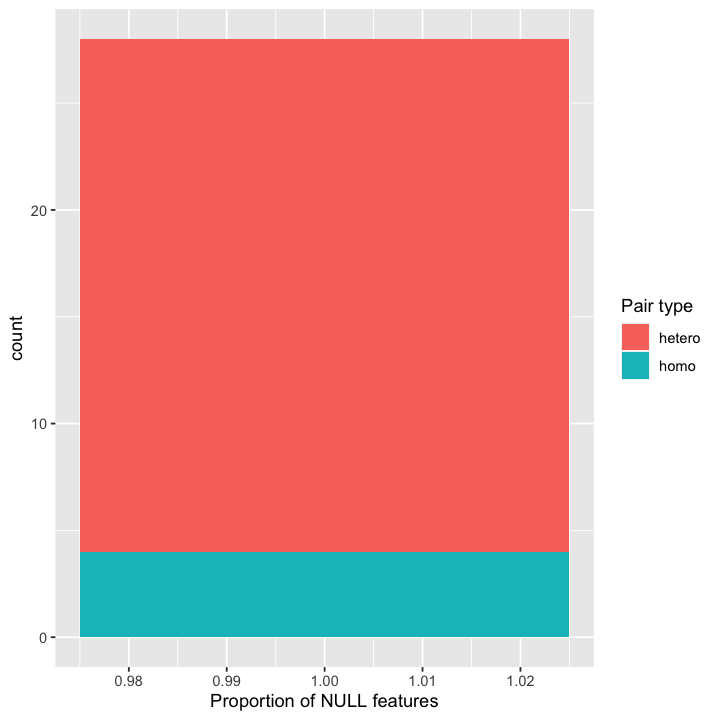

In [66]:
pi0df <- Ribolog::pairs2pi0s(rr.v2.pairwise)

In [67]:
print(pi0df)

                   uniqueID1 uniqueID2 groupID1 groupID2 pair_type pi0
CN34_r1_vs_CN34_r2   CN34_r1   CN34_r2     CN34     CN34      homo   1
CN34_r1_vs_LM1a_r1   CN34_r1   LM1a_r1     CN34     LM1a    hetero   1
CN34_r2_vs_LM1a_r1   CN34_r2   LM1a_r1     CN34     LM1a    hetero   1
CN34_r1_vs_LM1a_r2   CN34_r1   LM1a_r2     CN34     LM1a    hetero   1
CN34_r2_vs_LM1a_r2   CN34_r2   LM1a_r2     CN34     LM1a    hetero   1
LM1a_r1_vs_LM1a_r2   LM1a_r1   LM1a_r2     LM1a     LM1a      homo   1
CN34_r1_vs_LM2_r1    CN34_r1    LM2_r1     CN34      LM2    hetero   1
CN34_r2_vs_LM2_r1    CN34_r2    LM2_r1     CN34      LM2    hetero   1
LM1a_r1_vs_LM2_r1    LM1a_r1    LM2_r1     LM1a      LM2    hetero   1
LM1a_r2_vs_LM2_r1    LM1a_r2    LM2_r1     LM1a      LM2    hetero   1
CN34_r1_vs_LM2_r2    CN34_r1    LM2_r2     CN34      LM2    hetero   1
CN34_r2_vs_LM2_r2    CN34_r2    LM2_r2     CN34      LM2    hetero   1
LM1a_r1_vs_LM2_r2    LM1a_r1    LM2_r2     LM1a      LM2    hetero   1
LM1a_r

### Correlogram of equivalent test statistics

The Ribolog TER test can be performed on single replicates per biological sample. In a replicated experiment such as (sample A: reps A1 and A2 + sample B: reps B1 and B2), correlation coefficients of regression z scores from equivalent tests i.e. A1 vs B1, A2 vs B1, A1 vs B2 and A2 vs B2 can be used to evaluate replicate homogeneity and help determine the minimum advisable number of replicates to achieve reproducibility of conclusions.

                   CN34_r1_vs_LM1a_r1 CN34_r2_vs_LM1a_r1 CN34_r1_vs_LM1a_r2
CN34_r1_vs_LM1a_r1          1.0000000          0.7785832          0.5335150
CN34_r2_vs_LM1a_r1          0.7785832          1.0000000          0.3234130
CN34_r1_vs_LM1a_r2          0.5335150          0.3234130          1.0000000
CN34_r2_vs_LM1a_r2          0.3369229          0.5298701          0.7951579
                   CN34_r2_vs_LM1a_r2
CN34_r1_vs_LM1a_r1          0.3369229
CN34_r2_vs_LM1a_r1          0.5298701
CN34_r1_vs_LM1a_r2          0.7951579
CN34_r2_vs_LM1a_r2          1.0000000


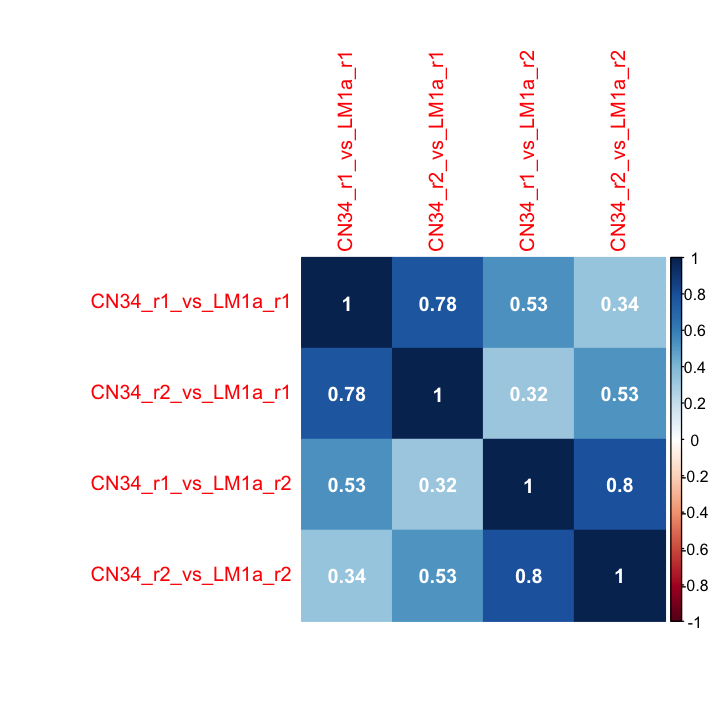

                  CN34_r1_vs_LM2_r1 CN34_r2_vs_LM2_r1 CN34_r1_vs_LM2_r2
CN34_r1_vs_LM2_r1         1.0000000         0.7858291         0.5648438
CN34_r2_vs_LM2_r1         0.7858291         1.0000000         0.3523470
CN34_r1_vs_LM2_r2         0.5648438         0.3523470         1.0000000
CN34_r2_vs_LM2_r2         0.3669555         0.5624168         0.7871711
                  CN34_r2_vs_LM2_r2
CN34_r1_vs_LM2_r1         0.3669555
CN34_r2_vs_LM2_r1         0.5624168
CN34_r1_vs_LM2_r2         0.7871711
CN34_r2_vs_LM2_r2         1.0000000


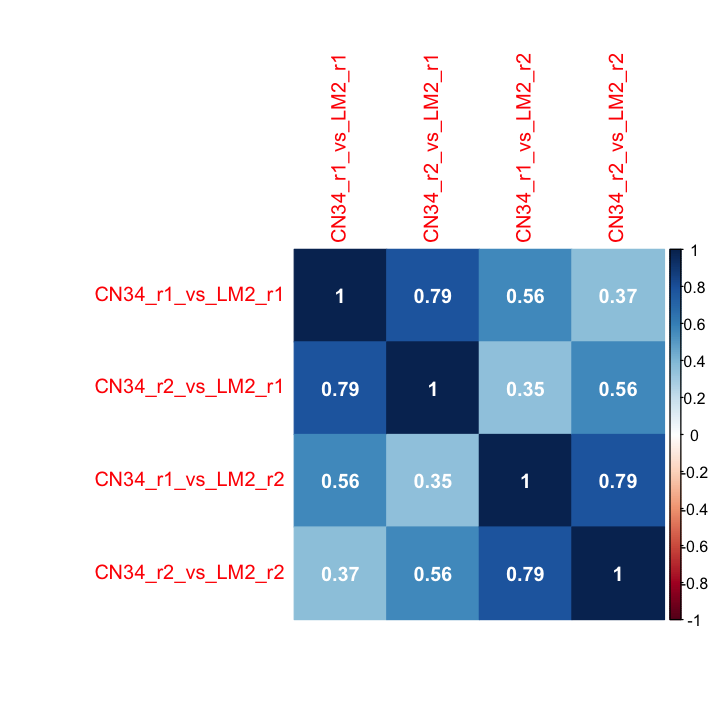

                  LM1a_r1_vs_LM2_r1 LM1a_r2_vs_LM2_r1 LM1a_r1_vs_LM2_r2
LM1a_r1_vs_LM2_r1        1.00000000         0.3640197         0.3990538
LM1a_r2_vs_LM2_r1        0.36401966         1.0000000        -0.3516538
LM1a_r1_vs_LM2_r2        0.39905379        -0.3516538         1.0000000
LM1a_r2_vs_LM2_r2       -0.01712355         0.4178158         0.3443355
                  LM1a_r2_vs_LM2_r2
LM1a_r1_vs_LM2_r1       -0.01712355
LM1a_r2_vs_LM2_r1        0.41781576
LM1a_r1_vs_LM2_r2        0.34433548
LM1a_r2_vs_LM2_r2        1.00000000


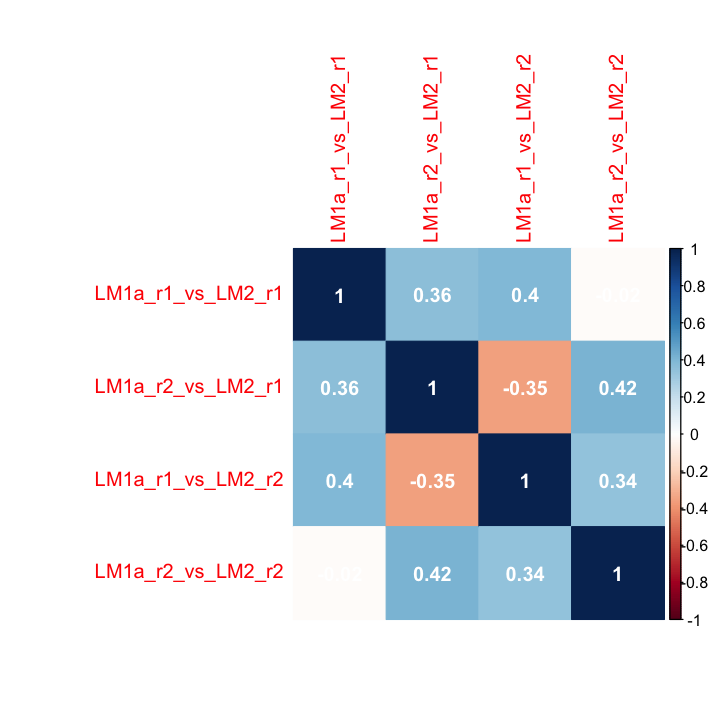

                  CN34_r1_vs_MDA_r1 CN34_r2_vs_MDA_r1 CN34_r1_vs_MDA_r2
CN34_r1_vs_MDA_r1         1.0000000         0.6939019         0.6076866
CN34_r2_vs_MDA_r1         0.6939019         1.0000000         0.2461594
CN34_r1_vs_MDA_r2         0.6076866         0.2461594         1.0000000
CN34_r2_vs_MDA_r2         0.4642661         0.6716680         0.7121272
                  CN34_r2_vs_MDA_r2
CN34_r1_vs_MDA_r1         0.4642661
CN34_r2_vs_MDA_r1         0.6716680
CN34_r1_vs_MDA_r2         0.7121272
CN34_r2_vs_MDA_r2         1.0000000


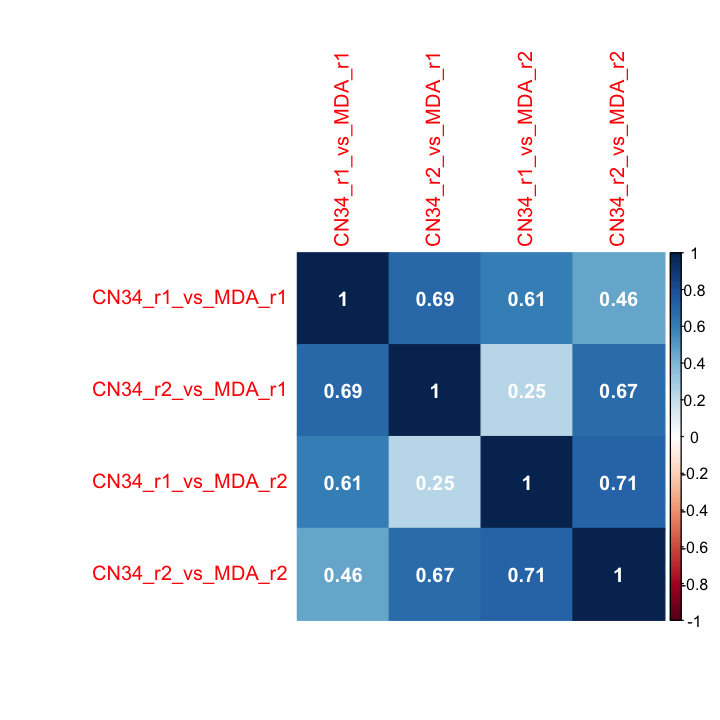

                  LM1a_r1_vs_MDA_r1 LM1a_r2_vs_MDA_r1 LM1a_r1_vs_MDA_r2
LM1a_r1_vs_MDA_r1         1.0000000         0.4816722         0.7137339
LM1a_r2_vs_MDA_r1         0.4816722         1.0000000         0.2270320
LM1a_r1_vs_MDA_r2         0.7137339         0.2270320         1.0000000
LM1a_r2_vs_MDA_r2         0.2429789         0.7367670         0.5023739
                  LM1a_r2_vs_MDA_r2
LM1a_r1_vs_MDA_r1         0.2429789
LM1a_r2_vs_MDA_r1         0.7367670
LM1a_r1_vs_MDA_r2         0.5023739
LM1a_r2_vs_MDA_r2         1.0000000
                 LM2_r1_vs_MDA_r1 LM2_r2_vs_MDA_r1 LM2_r1_vs_MDA_r2
LM2_r1_vs_MDA_r1        1.0000000        0.5116002        0.7076839
LM2_r2_vs_MDA_r1        0.5116002        1.0000000        0.2349718
LM2_r1_vs_MDA_r2        0.7076839        0.2349718        1.0000000
LM2_r2_vs_MDA_r2        0.2510457        0.7185005        0.5184118
                 LM2_r2_vs_MDA_r2
LM2_r1_vs_MDA_r1        0.2510457
LM2_r2_vs_MDA_r1        0.7185005
LM2_r1_vs_MDA_r2  

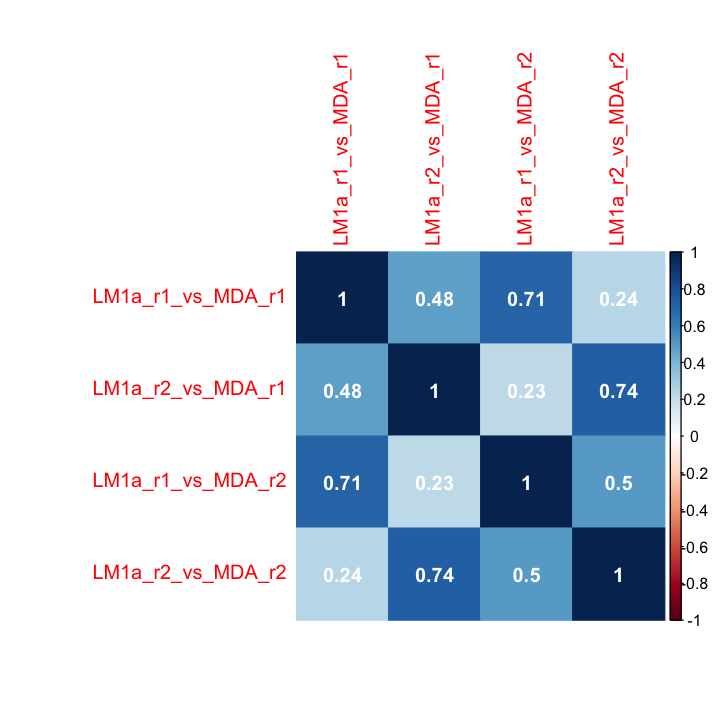

                 LM2_r1_vs_MDA_r1 LM2_r2_vs_MDA_r1 LM2_r1_vs_MDA_r2
LM2_r1_vs_MDA_r1        1.0000000        0.5116002        0.7076839
LM2_r2_vs_MDA_r1        0.5116002        1.0000000        0.2349718
LM2_r1_vs_MDA_r2        0.7076839        0.2349718        1.0000000
LM2_r2_vs_MDA_r2        0.2510457        0.7185005        0.5184118
                 LM2_r2_vs_MDA_r2
LM2_r1_vs_MDA_r1        0.2510457
LM2_r2_vs_MDA_r1        0.7185005
LM2_r1_vs_MDA_r2        0.5184118
LM2_r2_vs_MDA_r2        1.0000000


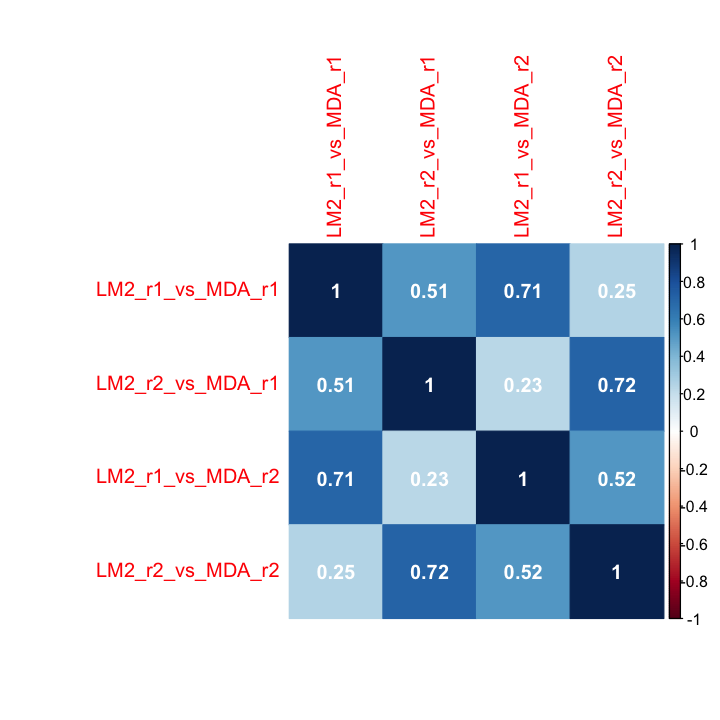

In [68]:
rr.v2.correlograms <- pairs2correlograms(rr.v2.pairwise)

In [69]:
rr.v2.correlograms

$`c("CN34", "LM1a")`
                   CN34_r1_vs_LM1a_r1 CN34_r2_vs_LM1a_r1 CN34_r1_vs_LM1a_r2
CN34_r1_vs_LM1a_r1          1.0000000          0.7785832          0.5335150
CN34_r2_vs_LM1a_r1          0.7785832          1.0000000          0.3234130
CN34_r1_vs_LM1a_r2          0.5335150          0.3234130          1.0000000
CN34_r2_vs_LM1a_r2          0.3369229          0.5298701          0.7951579
                   CN34_r2_vs_LM1a_r2
CN34_r1_vs_LM1a_r1          0.3369229
CN34_r2_vs_LM1a_r1          0.5298701
CN34_r1_vs_LM1a_r2          0.7951579
CN34_r2_vs_LM1a_r2          1.0000000

$`c("CN34", "LM2")`
                  CN34_r1_vs_LM2_r1 CN34_r2_vs_LM2_r1 CN34_r1_vs_LM2_r2
CN34_r1_vs_LM2_r1         1.0000000         0.7858291         0.5648438
CN34_r2_vs_LM2_r1         0.7858291         1.0000000         0.3523470
CN34_r1_vs_LM2_r2         0.5648438         0.3523470         1.0000000
CN34_r2_vs_LM2_r2         0.3669555         0.5624168         0.7871711
                  CN34_r2_vs_LM2_r2
CN34_r1_vs_LM2_r1         0.3669555
CN34_r2_vs_LM2_r1         0.5624168
CN34_r1_vs_LM2_r2         0.7871711
CN34_r2_vs_LM2_r2         1.0000000

$`c("LM1a", "LM2")`
                  LM1a_r1_vs_LM2_r1 LM1a_r2_vs_LM2_r1 LM1a_r1_vs_LM2_r2
LM1a_r1_vs_LM2_r1        1.00000000         0.3640197         0.3990538
LM1a_r2_vs_LM2_r1        0.36401966         1.0000000        -0.3516538
LM1a_r1_vs_LM2_r2        0.39905379        -0.3516538         1.0000000
LM1a_r2_vs_LM2_r2       -0.01712355         0.4178158         0.3443355
                  LM1a_r2_vs_LM2_r2
LM1a_r1_vs_LM2_r1       -0.01712355
LM1a_r2_vs_LM2_r1        0.41781576
LM1a_r1_vs_LM2_r2        0.34433548
LM1a_r2_vs_LM2_r2        1.00000000

$`c("CN34", "MDA")`
                  CN34_r1_vs_MDA_r1 CN34_r2_vs_MDA_r1 CN34_r1_vs_MDA_r2
CN34_r1_vs_MDA_r1         1.0000000         0.6939019         0.6076866
CN34_r2_vs_MDA_r1         0.6939019         1.0000000         0.2461594
CN34_r1_vs_MDA_r2         0.6076866         0.2461594         1.0000000
CN34_r2_vs_MDA_r2         0.4642661         0.6716680         0.7121272
                  CN34_r2_vs_MDA_r2
CN34_r1_vs_MDA_r1         0.4642661
CN34_r2_vs_MDA_r1         0.6716680
CN34_r1_vs_MDA_r2         0.7121272
CN34_r2_vs_MDA_r2         1.0000000

$`c("LM1a", "MDA")`
                  LM1a_r1_vs_MDA_r1 LM1a_r2_vs_MDA_r1 LM1a_r1_vs_MDA_r2
LM1a_r1_vs_MDA_r1         1.0000000         0.4816722         0.7137339
LM1a_r2_vs_MDA_r1         0.4816722         1.0000000         0.2270320
LM1a_r1_vs_MDA_r2         0.7137339         0.2270320         1.0000000
LM1a_r2_vs_MDA_r2         0.2429789         0.7367670         0.5023739
                  LM1a_r2_vs_MDA_r2
LM1a_r1_vs_MDA_r1         0.2429789
LM1a_r2_vs_MDA_r1         0.7367670
LM1a_r1_vs_MDA_r2         0.5023739
LM1a_r2_vs_MDA_r2         1.0000000

$`c("LM2", "MDA")`
                 LM2_r1_vs_MDA_r1 LM2_r2_vs_MDA_r1 LM2_r1_vs_MDA_r2
LM2_r1_vs_MDA_r1        1.0000000        0.5116002        0.7076839
LM2_r2_vs_MDA_r1        0.5116002        1.0000000        0.2349718
LM2_r1_vs_MDA_r2        0.7076839        0.2349718        1.0000000
LM2_r2_vs_MDA_r2        0.2510457        0.7185005        0.5184118
                 LM2_r2_vs_MDA_r2
LM2_r1_vs_MDA_r1        0.2510457
LM2_r2_vs_MDA_r1        0.7185005
LM2_r1_vs_MDA_r2        0.5184118
LM2_r2_vs_MDA_r2        1.0000000

# Module 4: Basic differential translational efficiency test

Now we are ready to perform the translational efficiency test using the logit_seq function. TE is the RPF/RNA ratio. If we are interested in comparing TE between the metastatic and non-metastatic samples, we set the model to read_type ~ lung_metastasis. The count data set (argument x) must contain only numeric variables, therefore column 1 (transcript) is excluded from x and provided separately as the feature list in the end.

- Translational efficiency of transcript ENST00000000233 is estimated to be 12.87% higher in metastatic samples compared to non-metastatic ones. However, this difference is not statistically significant (p=0.1014).

- Regression reports usually include only a regression coefficient (Estimate) and a p-value. We keep SE and z in the output data frame to enable certain tasks e.g. generation of correlograms from z scores (module 3, TEST 3).

Finally, p-values are corrected for multiple testing. Run ?logit_seq to see all the available methods. Two examples are shown below. Each column of p-values is corrected for multiple testing separately.

In [70]:
fit1_FDR   <- Ribolog::logit_seq(rr.v2[, -1], 
                                sample_attributes, 
                                read_type ~ lung_metastasis, 
                                as.vector(rr.v2$transcript),
                                adj_method='fdr')

head(fit1_FDR)

Estimate_.Intercept. Std..Error_.Intercept. z.value_.Intercept.
ENST00000000233 -3.483241            0.11763774             -29.60990          
ENST00000000412 -5.485300            0.15814228             -34.68585          
ENST00000000442 -6.477765            0.38264305             -16.92900          
ENST00000001008 -4.396082            0.09545075             -46.05602          
ENST00000002125 -4.177354            0.28490011             -14.66252          
ENST00000002165 -5.155255            0.15682288             -32.87311          
                Pr...z.._.Intercept. Estimate_lung_metastasisY
ENST00000000233 1.114385e-192         0.1941277               
ENST00000000412 1.287537e-263        -0.4221770               
ENST00000000442  2.750055e-64         0.8406110               
ENST00000001008  0.000000e+00         0.1990977               
ENST00000002125  1.120364e-48        -0.8228012               
ENST00000002165 5.326577e-237         0.1219951               
                Std..Error_lung_metastasisY z.value_lung_metastasisY
ENST00000000233 0.1657662                    1.1710934              
ENST00000000412 0.2403848                   -1.7562551              
ENST00000000442 0.4751286                    1.7692282              
ENST00000001008 0.1275938                    1.5604030              
ENST00000002125 0.5324919                   -1.5451903              
ENST00000002165 0.2242608                    0.5439874              
                Pr...z.._lung_metastasisY fdr_Pr(>|z|)_(Intercept)
ENST00000000233 0.24156125                2.853010e-192           
ENST00000000412 0.07904486                4.627202e-263           
ENST00000000442 0.07685581                 3.237297e-64           
ENST00000001008 0.11866468                 0.000000e+00           
ENST00000002125 0.12230025                 1.214175e-48           
ENST00000002165 0.58645013                1.690560e-236           
                fdr_Pr(>|z|)_lung_metastasisY
ENST00000000233 0.4942409                    
ENST00000000412 0.2601617                    
ENST00000000442 0.2554335                    
ENST00000001008 0.3263943                    
ENST00000002125 0.3321230                    
ENST00000002165 0.7795674

You can also simply extract uncorrected values by specifying 'none' as the adjustment method

In [71]:
fit1      <- Ribolog::logit_seq(rr.v2[, -1], 
                                sample_attributes, 
                                read_type ~ lung_metastasis, 
                                as.vector(rr.v2$transcript),
                                adj_method='none')

head(fit1)

Estimate_(Intercept) Std. Error_(Intercept) z value_(Intercept)
ENST00000000233 -3.483241            0.11763774             -29.60990          
ENST00000000412 -5.485300            0.15814228             -34.68585          
ENST00000000442 -6.477765            0.38264305             -16.92900          
ENST00000001008 -4.396082            0.09545075             -46.05602          
ENST00000002125 -4.177354            0.28490011             -14.66252          
ENST00000002165 -5.155255            0.15682288             -32.87311          
                Pr(>|z|)_(Intercept) Estimate_lung_metastasisY
ENST00000000233 1.114385e-192         0.1941277               
ENST00000000412 1.287537e-263        -0.4221770               
ENST00000000442  2.750055e-64         0.8406110               
ENST00000001008  0.000000e+00         0.1990977               
ENST00000002125  1.120364e-48        -0.8228012               
ENST00000002165 5.326577e-237         0.1219951               
                Std. Error_lung_metastasisY z value_lung_metastasisY
ENST00000000233 0.1657662                    1.1710934              
ENST00000000412 0.2403848                   -1.7562551              
ENST00000000442 0.4751286                    1.7692282              
ENST00000001008 0.1275938                    1.5604030              
ENST00000002125 0.5324919                   -1.5451903              
ENST00000002165 0.2242608                    0.5439874              
                Pr(>|z|)_lung_metastasisY
ENST00000000233 0.24156125               
ENST00000000412 0.07904486               
ENST00000000442 0.07685581               
ENST00000001008 0.11866468               
ENST00000002125 0.12230025               
ENST00000002165 0.58645013

In [72]:
fit1_qval <- Ribolog::logit_seq(rr.v2[, -1], 
                                sample_attributes, 
                                read_type ~ lung_metastasis, 
                                as.vector(rr.v2$transcript),
                                adj_method='qvalue')

head(fit1_qval)

Estimate_.Intercept. Std..Error_.Intercept. z.value_.Intercept.
ENST00000000233 -3.483241            0.11763774             -29.60990          
ENST00000000412 -5.485300            0.15814228             -34.68585          
ENST00000000442 -6.477765            0.38264305             -16.92900          
ENST00000001008 -4.396082            0.09545075             -46.05602          
ENST00000002125 -4.177354            0.28490011             -14.66252          
ENST00000002165 -5.155255            0.15682288             -32.87311          
                Pr...z.._.Intercept. Estimate_lung_metastasisY
ENST00000000233 1.114385e-192         0.1941277               
ENST00000000412 1.287537e-263        -0.4221770               
ENST00000000442  2.750055e-64         0.8406110               
ENST00000001008  0.000000e+00         0.1990977               
ENST00000002125  1.120364e-48        -0.8228012               
ENST00000002165 5.326577e-237         0.1219951               
                Std..Error_lung_metastasisY z.value_lung_metastasisY
ENST00000000233 0.1657662                    1.1710934              
ENST00000000412 0.2403848                   -1.7562551              
ENST00000000442 0.4751286                    1.7692282              
ENST00000001008 0.1275938                    1.5604030              
ENST00000002125 0.5324919                   -1.5451903              
ENST00000002165 0.2242608                    0.5439874              
                Pr...z.._lung_metastasisY qvalue_Pr(>|z|)_(Intercept)
ENST00000000233 0.24156125                4.652530e-195              
ENST00000000412 0.07904486                7.545784e-266              
ENST00000000442 0.07685581                 5.279204e-67              
ENST00000001008 0.11866468                 0.000000e+00              
ENST00000002125 0.12230025                 1.980009e-51              
ENST00000002165 0.58645013                2.756871e-239              
                qvalue_Pr(>|z|)_lung_metastasisY
ENST00000000233 0.2783196                       
ENST00000000412 0.1465036                       
ENST00000000442 0.1438411                       
ENST00000001008 0.1838008                       
ENST00000002125 0.1870269                       
ENST00000002165 0.4389941

An important advantage of Ribolog is that it can run the TER test using only a single replicate per sample, or a single sample per biological condition. Below, we compare CN34 and LM1a lines using only one replicate from each:

In [73]:
fit2_qval <- Ribolog::logit_seq(rr.v2[, c(2, 4, 10, 12)], 
                           sample_attributes[c(1, 3, 9, 11), ], 
                           read_type ~ cell_line, 
                           as.vector(rr.v2$transcript),
                           adj_method = "qvalue")

names(fit2_qval)

[1] "Estimate_.Intercept."          "Std..Error_.Intercept."       
 [3] "z.value_.Intercept."           "Pr...z.._.Intercept."         
 [5] "Estimate_cell_lineLM1a"        "Std..Error_cell_lineLM1a"     
 [7] "z.value_cell_lineLM1a"         "Pr...z.._cell_lineLM1a"       
 [9] "qvalue_Pr(>|z|)_(Intercept)"   "qvalue_Pr(>|z|)_cell_lineLM1a"

### Make Volcano Plots

We can visualize the results in volcano plots

In [74]:
head(fit1_FDR)

Estimate_.Intercept. Std..Error_.Intercept. z.value_.Intercept.
ENST00000000233 -3.483241            0.11763774             -29.60990          
ENST00000000412 -5.485300            0.15814228             -34.68585          
ENST00000000442 -6.477765            0.38264305             -16.92900          
ENST00000001008 -4.396082            0.09545075             -46.05602          
ENST00000002125 -4.177354            0.28490011             -14.66252          
ENST00000002165 -5.155255            0.15682288             -32.87311          
                Pr...z.._.Intercept. Estimate_lung_metastasisY
ENST00000000233 1.114385e-192         0.1941277               
ENST00000000412 1.287537e-263        -0.4221770               
ENST00000000442  2.750055e-64         0.8406110               
ENST00000001008  0.000000e+00         0.1990977               
ENST00000002125  1.120364e-48        -0.8228012               
ENST00000002165 5.326577e-237         0.1219951               
                Std..Error_lung_metastasisY z.value_lung_metastasisY
ENST00000000233 0.1657662                    1.1710934              
ENST00000000412 0.2403848                   -1.7562551              
ENST00000000442 0.4751286                    1.7692282              
ENST00000001008 0.1275938                    1.5604030              
ENST00000002125 0.5324919                   -1.5451903              
ENST00000002165 0.2242608                    0.5439874              
                Pr...z.._lung_metastasisY fdr_Pr(>|z|)_(Intercept)
ENST00000000233 0.24156125                2.853010e-192           
ENST00000000412 0.07904486                4.627202e-263           
ENST00000000442 0.07685581                 3.237297e-64           
ENST00000001008 0.11866468                 0.000000e+00           
ENST00000002125 0.12230025                 1.214175e-48           
ENST00000002165 0.58645013                1.690560e-236           
                fdr_Pr(>|z|)_lung_metastasisY
ENST00000000233 0.4942409                    
ENST00000000412 0.2601617                    
ENST00000000442 0.2554335                    
ENST00000001008 0.3263943                    
ENST00000002125 0.3321230                    
ENST00000002165 0.7795674

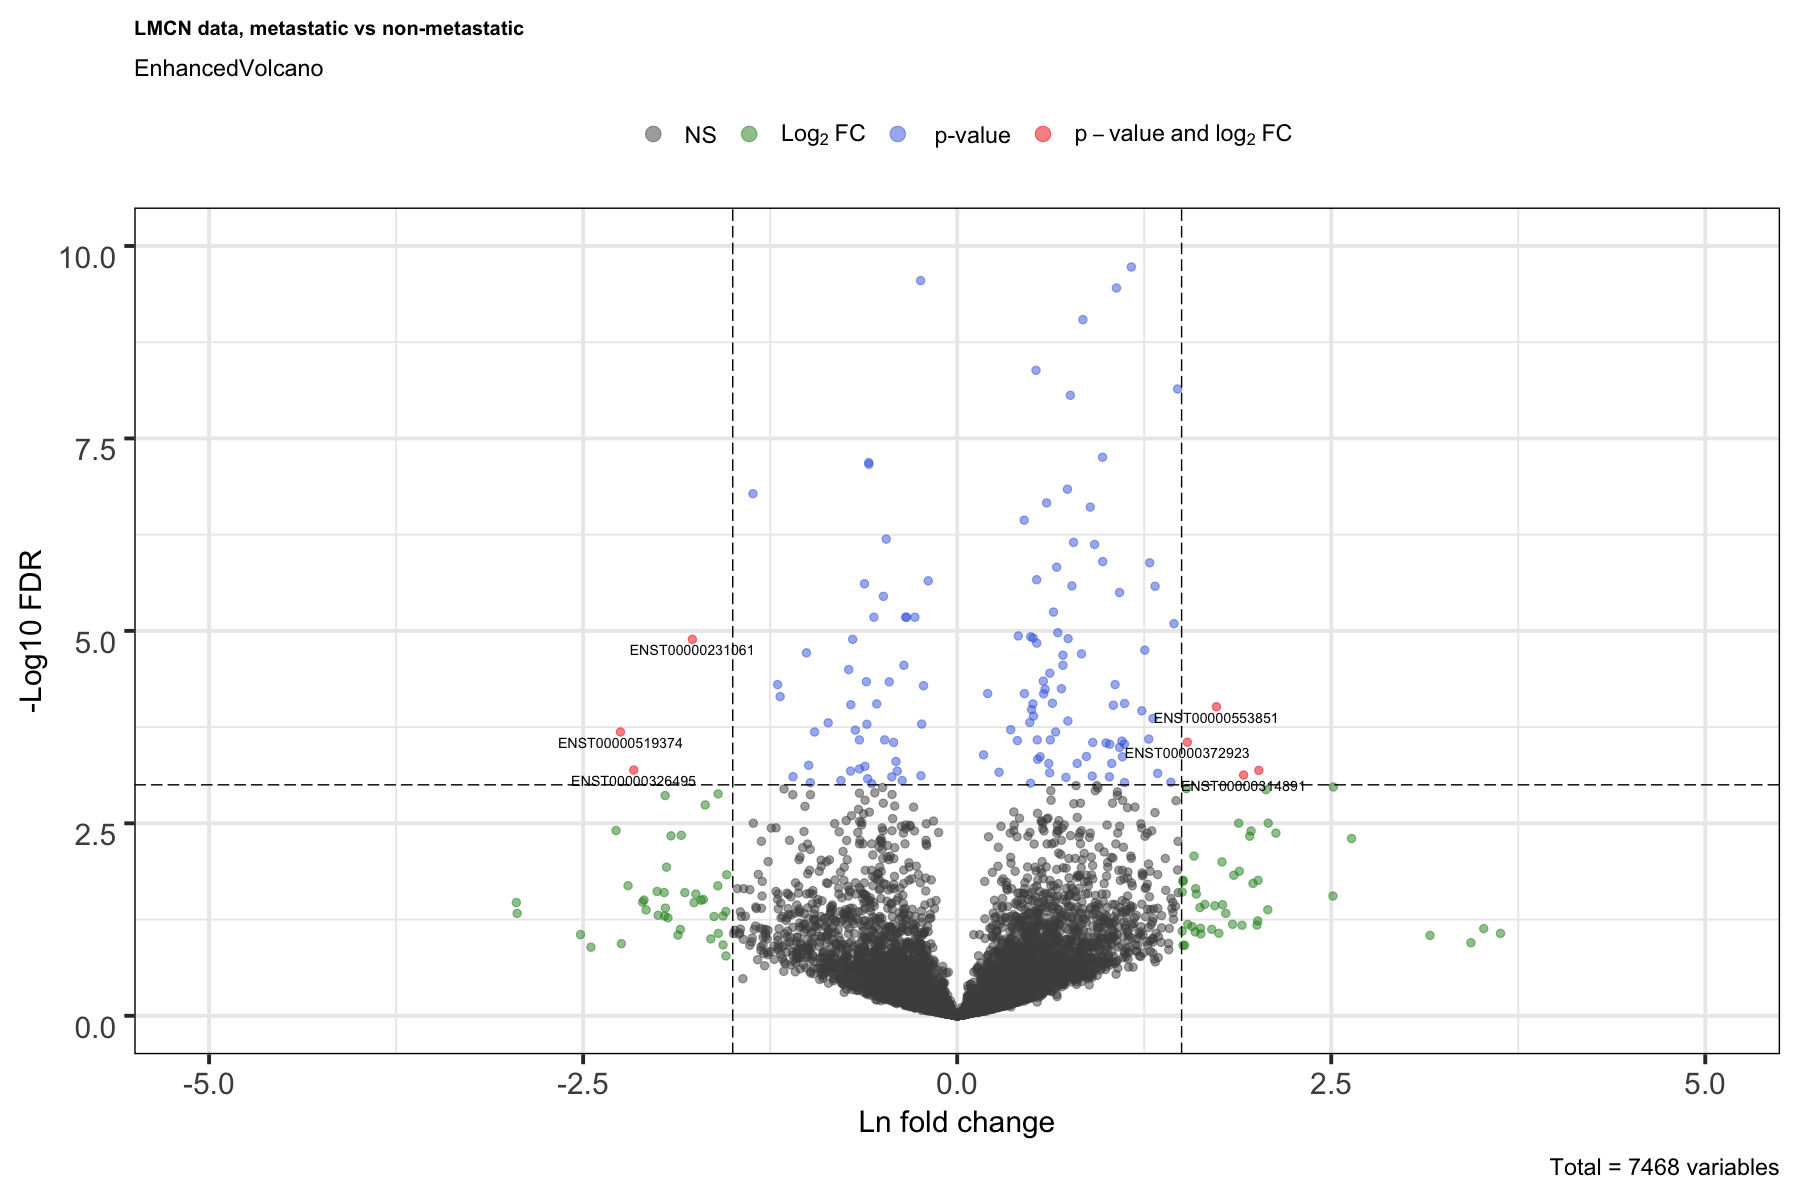

In [75]:
options(repr.plot.width = 15, repr.plot.height = 10)
Ribolog::volcano_plot(fit1_FDR)

# Module 5

Now let us generate the empirical null distribution.

In [77]:
rr.v2.enz <- Ribolog::generate_ENZ(x = rr.v2.split, 
                                  design = sample_attributes, 
                                  outcome = "read_type", 
                                  uniqueID = "replicate_name", 
                                  groupID = "cell_line",
                                  adj_method = 'none')

ERROR: Error in Ribolog::generate_ENZ(x = rr.v2.split, design = sample_attributes, : unused argument (adj_method = "none")


Calculating p-values by empirical null hypothesis testing.

In [ ]:
fit1_ENZ_p <- Ribolog::test_ENZ(x = fit1, enz = rr.v2.enz, zcols = 7)

Combine the output of related tests in a meta-analytical framework.

In [ ]:
fit1a <- Ribolog::logit_seq(rr.v2[,c(2:5,10:13)], 
                            sample_attributes[c(1:4,9:12), ], 
                            read_type ~ lung_metastasis, 
                            as.vector(rr.v2$transcript),
                            adj_method = "none")

fit1b <- Ribolog::logit_seq(rr.v2[,c(6:9,14:17)], 
                            sample_attributes[c(5:8,13:16), ], 
                            read_type ~ lung_metastasis, 
                            as.vector(rr.v2$transcript),
                            adj_method = "none")

fit1ab_list <- list("fit1a" = fit1a[, c(5:8)], "fit1b" = fit1b[, c(5:8)])
fit1ab_meta <- Ribolog::meta_test(fit1ab_list, feature_list = rr.v2$transcript)

### Adding standard deviation and z statistic to test results

Regression fitting algorithms calculate a standard deviation (SD) for each coefficient (beta) and then calculate a z staistic by dividing each coefficient by its SD. P-value is obtained by comapring the  statistic to the standard normal distribution. SD and z are usually not reported in the regression output because they can be recovered easily from beta and p. Z is required for empirical null testing. 

Both SD and z are required for the correlated tests meta-analysis. Function \code{\link{add_sd_z}} adds these two components to the (beta & p) outputs so that they can be used as input to functions such as \code{\link{test_ENZ}} or \code{\link{meta_test}}.

If p-value was calculated from a distribution other than standard normal, the \code{\link{add_sd_z}} function should not be used.The user must add the SD and z columns to the output manually using apprporiate operations.

In [ ]:
fit1_short <- fit1[, c(TRUE, FALSE, FALSE, TRUE)]
fit1_restored <- Ribolog::add_sd_z(fit1_short)